In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import math
from dateutil.relativedelta import relativedelta
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight') 

startDate_UTC = dt.datetime(2013,1,1)
endDate_UTC = dt.datetime.today()

In [2]:
# Read in csv to speed up process
df = pd.DataFrame()
df = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Total Data Analysis and Neg Price Model\IE_data.csv')
#df = pd.read_csv('IE_data.csv') #Uncomment to use
df.columns = ['','DA_Prices', 'Total_Wind_Fcast', 'Total_Demand_Fcast','Wind_Penetration_Fcast']
df[''] = pd.to_datetime(df[''], format='%Y/%m/%d')
df = df.set_index('')
df = df.dropna()
df = df.loc[df.index < dt.datetime(2021,1,1)]
df

DA_Prices  Total_Wind_Fcast  Total_Demand_Fcast  \
                                                                       
2013-01-01 00:00:00      48.71          1042.239            3803.080   
2013-01-01 01:00:00      48.71          1092.219            3518.080   
2013-01-01 02:00:00      36.75          1140.414            3221.360   
2013-01-01 03:00:00      36.41          1175.463            2994.740   
2013-01-01 04:00:00      36.41          1173.676            2900.830   
...                        ...               ...                 ...   
2020-12-31 19:00:00      64.28          2103.129            5881.589   
2020-12-31 20:00:00      62.66          2051.916            5531.672   
2020-12-31 21:00:00      56.90          1972.792            5202.729   
2020-12-31 22:00:00      50.70          1878.701            4762.078   
2020-12-31 23:00:00      55.09          1971.151            4341.172   

                     Wind_Penetration_Fcast  
                                             
2013-01-01 00:00:00                   0.274  
2013-01-01 01:00:00                   0.310  
2013-01-01 02:00:00                   0.354  
2013-01-01 03:00:00                   0.393  
2013-01-01 04:00:00                   0.405  
...                                     ...  
2020-12-31 19:00:00                   0.358  
2020-12-31 20:00:00                   0.371  
2020-12-31 21:00:00                   0.379  
2020-12-31 22:00:00                   0.395  
2020-12-31 23:00:00                   0.454  

[70128 rows x 4 columns]

In [3]:
# Read in csv to speed up process
df_inter = pd.DataFrame()
df_inter = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Total Data Analysis and Neg Price Model\interconnector_data.csv')

#df_inter = pd.read_csv('interconnector_data.csv') #Uncomment to use

df_inter.columns = ['','Imports', 'Exports', 'Value']
df_inter[''] = pd.to_datetime(df_inter[''], format='%Y/%m/%d')
df_inter = df_inter.drop_duplicates(subset=[''], keep='first')
df_inter = df_inter.set_index('')
df_inter = df_inter.fillna(value = 0.00)
df_inter = df_inter.loc[df_inter.index < dt.datetime(2021,1,1)]


df_inter['DA_Prices'] = (df['DA_Prices'].loc[df.index>=dt.datetime(2015,1,1)]).tolist()
df_inter['Total_Wind_Fcast'] = (df['Total_Wind_Fcast'].loc[df.index>=dt.datetime(2015,1,1,0,0)]).tolist()
df_inter['Total_Demand_Fcast'] = (df['Total_Demand_Fcast'].loc[df.index>=dt.datetime(2015,1,1,0,0)]).tolist()
df_inter['Wind_Penetration_Fcast'] = (df['Wind_Penetration_Fcast'].loc[df.index>=dt.datetime(2015,1,1,0,0)]).tolist()
df_inter['SNSP'] =  (df_inter['Total_Wind_Fcast'] + df_inter['Imports'])/(df_inter['Total_Demand_Fcast'] + df_inter['Exports'])
df_inter

Imports  Exports  Value  DA_Prices  Total_Wind_Fcast  \
                                                                            
2015-01-01 00:00:00      0.0      0.0    0.0      44.24          1265.235   
2015-01-01 01:00:00      0.0      0.0    0.0      44.24          1321.230   
2015-01-01 02:00:00      0.0      0.0    0.0      30.98          1391.480   
2015-01-01 03:00:00      0.0      0.0    0.0      30.97          1458.005   
2015-01-01 04:00:00      0.0      0.0    0.0      30.70          1537.880   
...                      ...      ...    ...        ...               ...   
2020-12-31 19:00:00      0.0    898.0 -898.0      64.28          2103.129   
2020-12-31 20:00:00      0.0    900.0 -900.0      62.66          2051.916   
2020-12-31 21:00:00      0.0    900.0 -900.0      56.90          1972.792   
2020-12-31 22:00:00      0.0    900.0 -900.0      50.70          1878.701   
2020-12-31 23:00:00      0.0    602.0 -602.0      55.09          1971.151   

                     Total_Demand_Fcast  Wind_Penetration_Fcast      SNSP  
                                                                           
2015-01-01 00:00:00            3731.144                   0.339  0.339101  
2015-01-01 01:00:00            3523.522                   0.375  0.374974  
2015-01-01 02:00:00            3230.744                   0.431  0.430700  
2015-01-01 03:00:00            2990.135                   0.488  0.487605  
2015-01-01 04:00:00            2834.995                   0.542  0.542463  
...                                 ...                     ...       ...  
2020-12-31 19:00:00            5881.589                   0.358  0.310215  
2020-12-31 20:00:00            5531.672                   0.371  0.319033  
2020-12-31 21:00:00            5202.729                   0.379  0.323264  
2020-12-31 22:00:00            4762.078                   0.395  0.331804  
2020-12-31 23:00:00            4341.172                   0.454  0.398762  

[52608 rows x 8 columns]

In [4]:
df_inter[df_inter.index < dt.datetime(2020,1,1)].max()

Imports                   2031.000000
Exports                   1760.000000
Value                     1856.000000
DA_Prices                  800.000000
Total_Wind_Fcast          4397.722000
Total_Demand_Fcast        6495.743000
Wind_Penetration_Fcast       1.348000
SNSP                         1.119498
dtype: float64

In [5]:
df_inter['Value'].loc[df_inter.index < dt.datetime(2021,1,1)].max()

1856.0

C:\Users\09ant\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


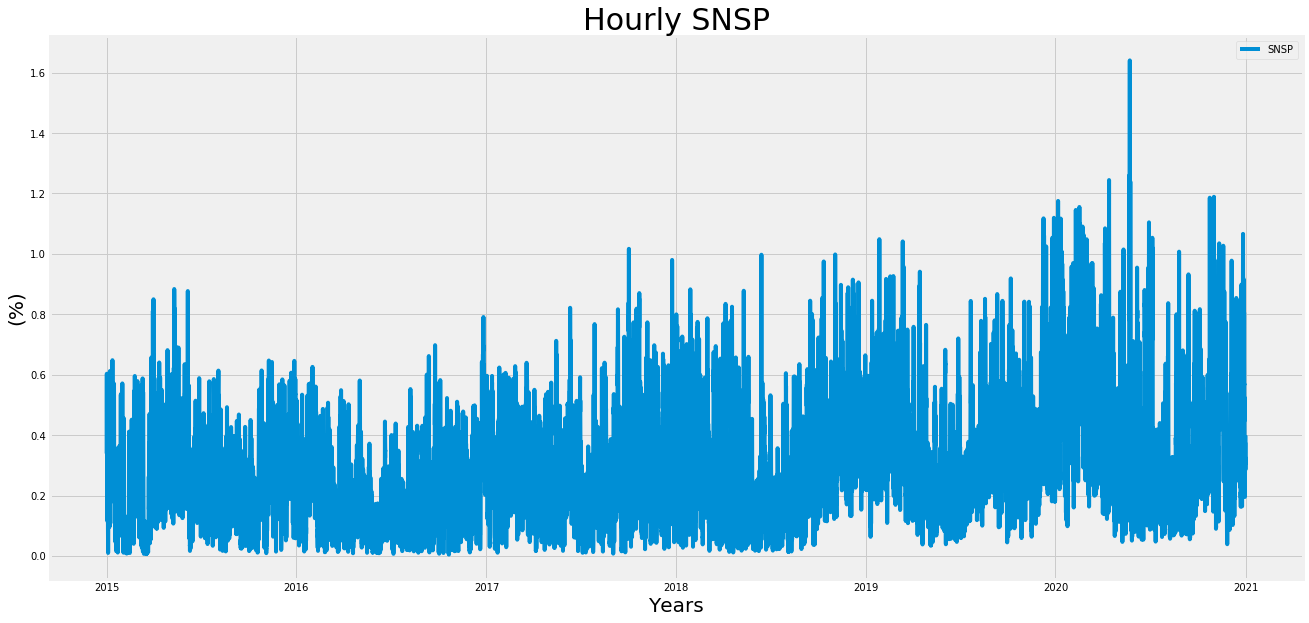

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df_inter['SNSP'])
plt.legend(labels=['SNSP'])
plt.title('Hourly SNSP',size = 30)
plt.xlabel('Years', size =20)
plt.ylabel('(%)',size=20)

plt.show()

In [7]:
df_inter.loc[df_inter.SNSP >= 1]

Imports  Exports  Value  DA_Prices  Total_Wind_Fcast  \
                                                                            
2017-10-02 02:00:00    344.0     30.0  314.0       3.40          2455.665   
2017-10-02 03:00:00    389.0     30.0  359.0       3.40          2414.915   
2019-01-27 02:00:00      0.0    590.0 -590.0      -0.10          4018.290   
2019-01-27 03:00:00      0.0    590.0 -590.0      -0.15          3995.250   
2019-01-27 04:00:00      0.0    590.0 -590.0      -0.15          3940.211   
...                      ...      ...    ...        ...               ...   
2020-11-19 01:00:00      0.0    580.0 -580.0     -10.30          4105.815   
2020-11-19 02:00:00      0.0    580.0 -580.0      -8.02          4002.221   
2020-12-27 02:00:00      0.0    398.0 -398.0      -1.10          3793.861   
2020-12-27 03:00:00      0.0    251.0 -251.0      -8.79          3662.759   
2020-12-27 04:00:00      0.0    293.0 -293.0      -3.52          3537.496   

                     Total_Demand_Fcast  Wind_Penetration_Fcast      SNSP  
                                                                           
2017-10-02 02:00:00            2745.908                   0.894  1.008558  
2017-10-02 03:00:00            2727.668                   0.885  1.016770  
2019-01-27 02:00:00            3349.032                   1.200  1.020121  
2019-01-27 03:00:00            3242.054                   1.232  1.042587  
2019-01-27 04:00:00            3167.269                   1.244  1.048690  
...                                 ...                     ...       ...  
2020-11-19 01:00:00            3453.360                   1.189  1.017964  
2020-11-19 02:00:00            3316.961                   1.207  1.027011  
2020-12-27 02:00:00            3358.412                   1.130  1.009969  
2020-12-27 03:00:00            3184.211                   1.150  1.066240  
2020-12-27 04:00:00            3087.392                   1.146  1.046475  

[180 rows x 8 columns]

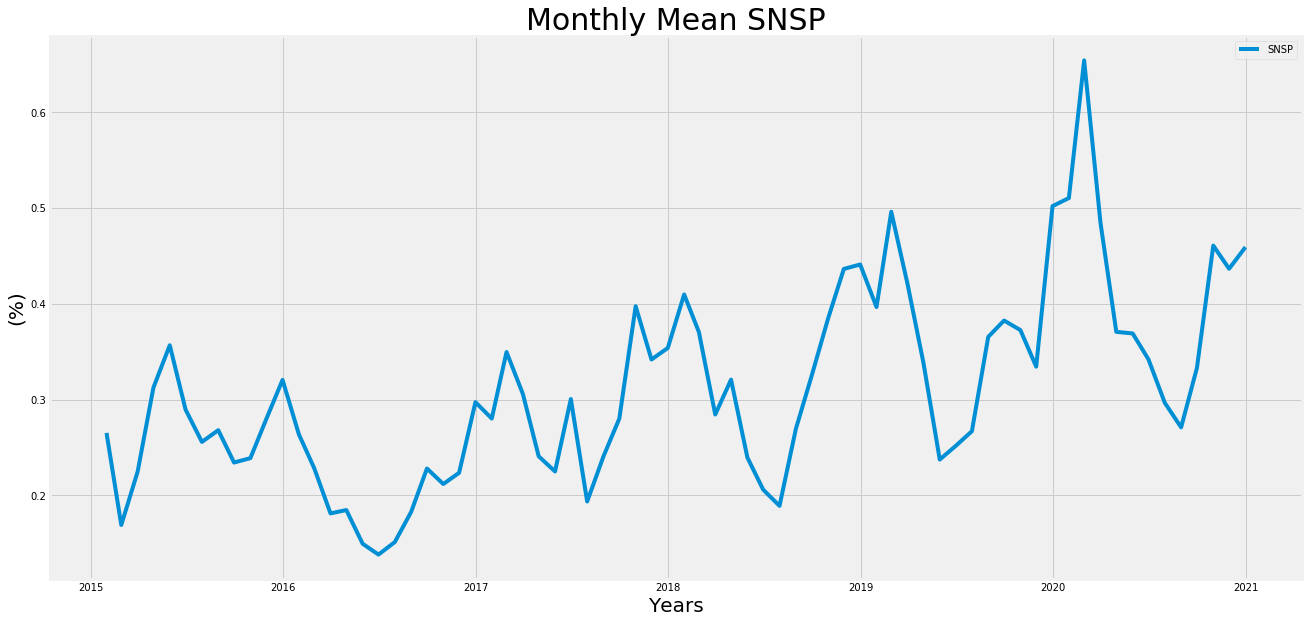

0.654


In [8]:
plt.figure(figsize=(20,10))
plt.plot(df_inter['SNSP'].resample('M').mean())
plt.legend(labels=['SNSP'])
plt.title('Monthly Mean SNSP',size =30)
plt.xlabel('Years', size =20)
plt.ylabel('(%)',size=20)

plt.show()

print(round( (df_inter['SNSP'].resample('M').mean().max()),3)) 

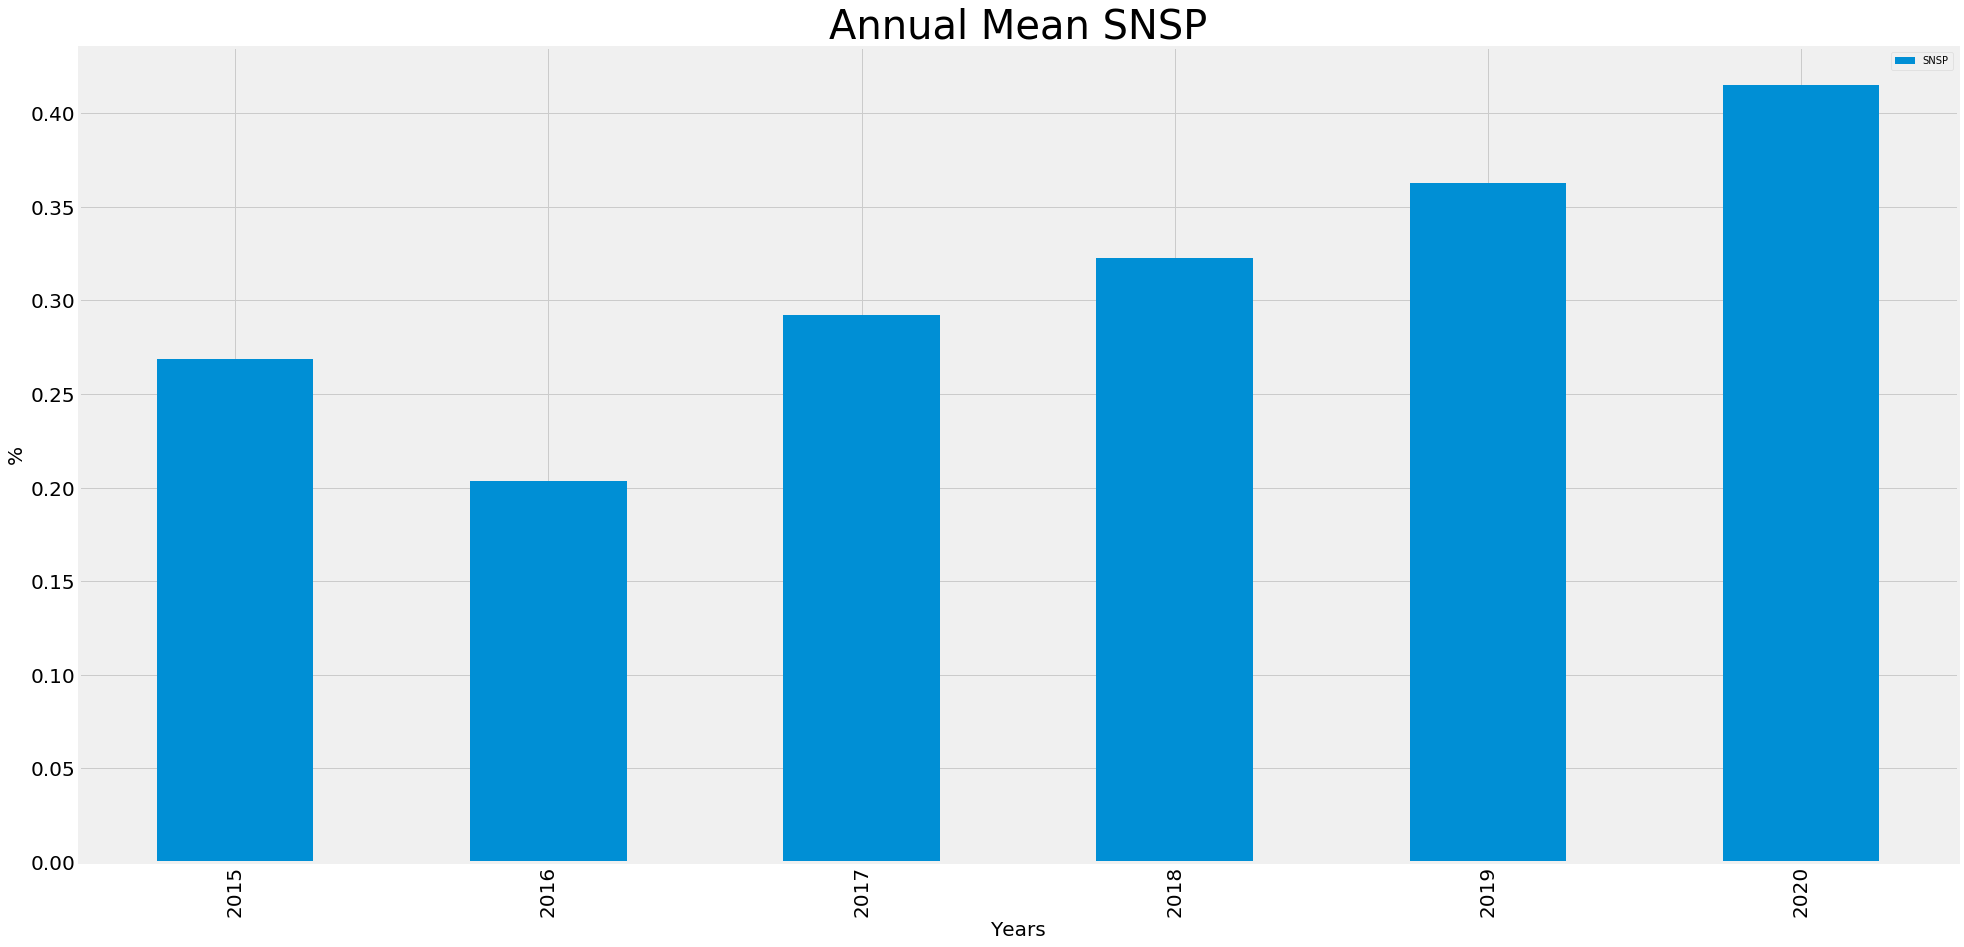

In [9]:
(df_inter.SNSP.groupby(df_inter.index.year).mean()).plot(kind="bar", figsize=(30,15))

plt.title('Annual Mean SNSP', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('%',size=20)
plt.yticks(size=20);
plt.legend(labels=['SNSP'])

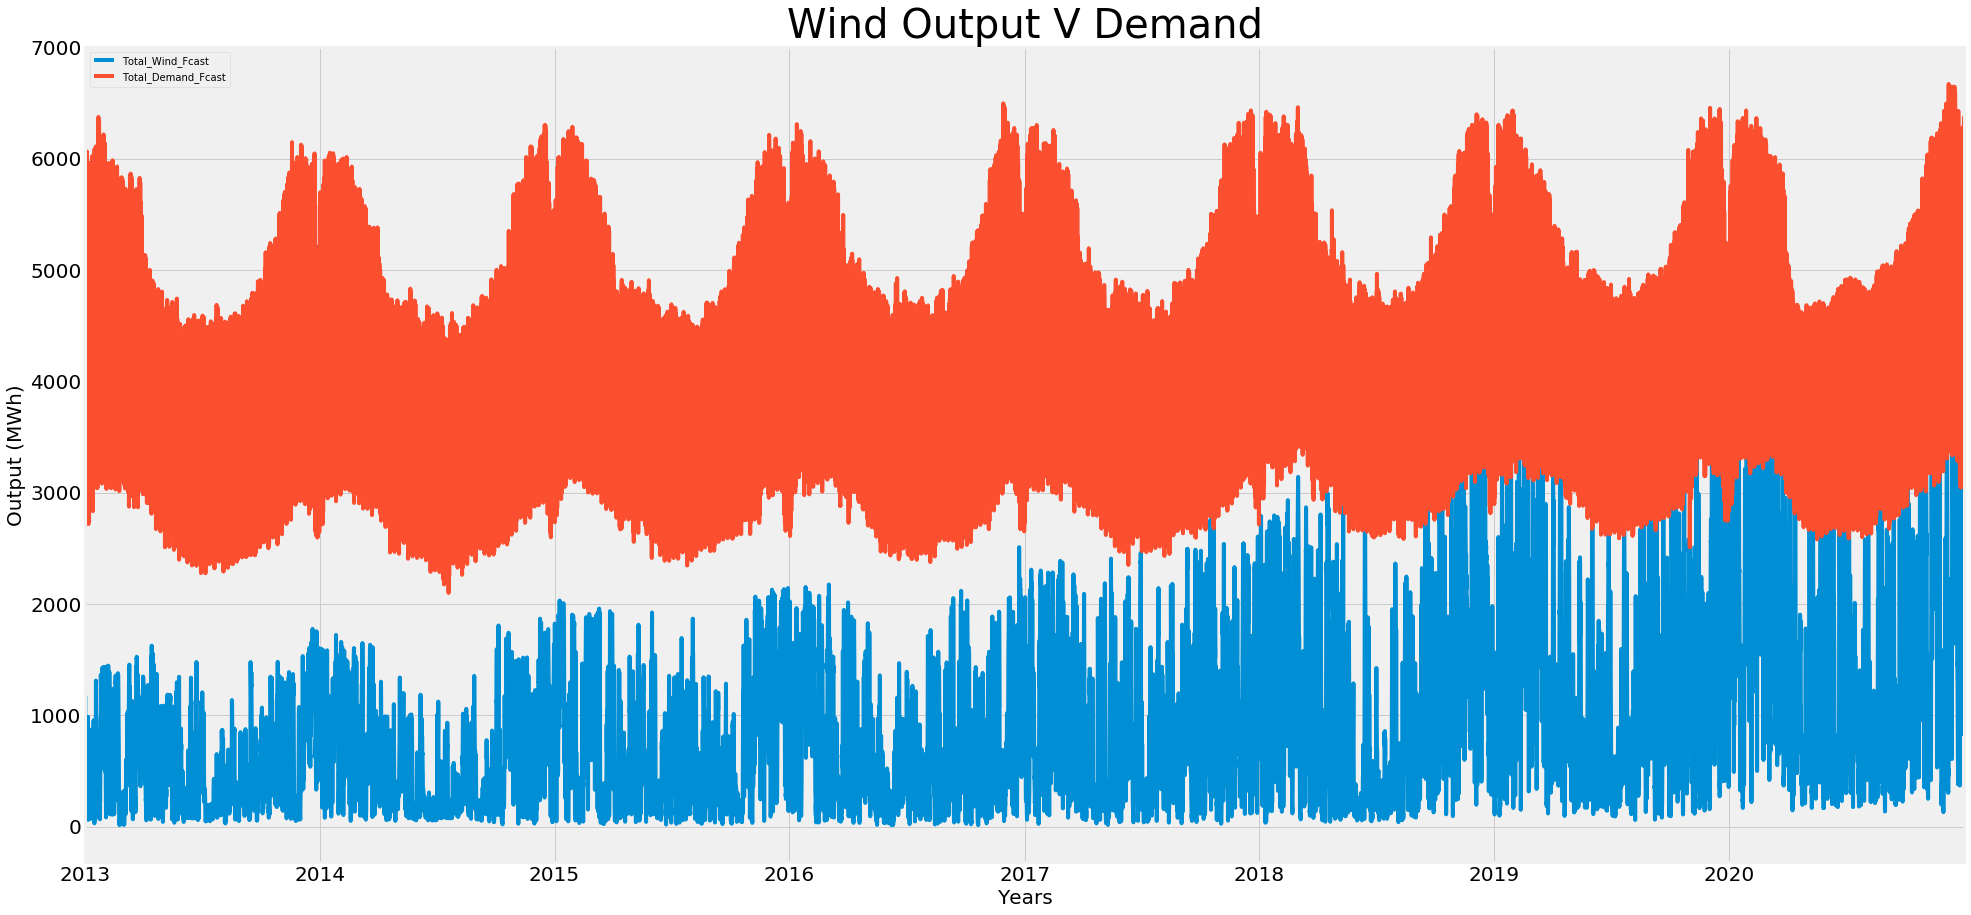

In [10]:
df[['Total_Wind_Fcast','Total_Demand_Fcast']].plot(figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Wind Output V Demand', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('Output (MWh)',size=20)
plt.yticks(size=20);

High winds appear to occur with higher demand. However, there are many occassions where this is not ture and high winds have occured at lower demand


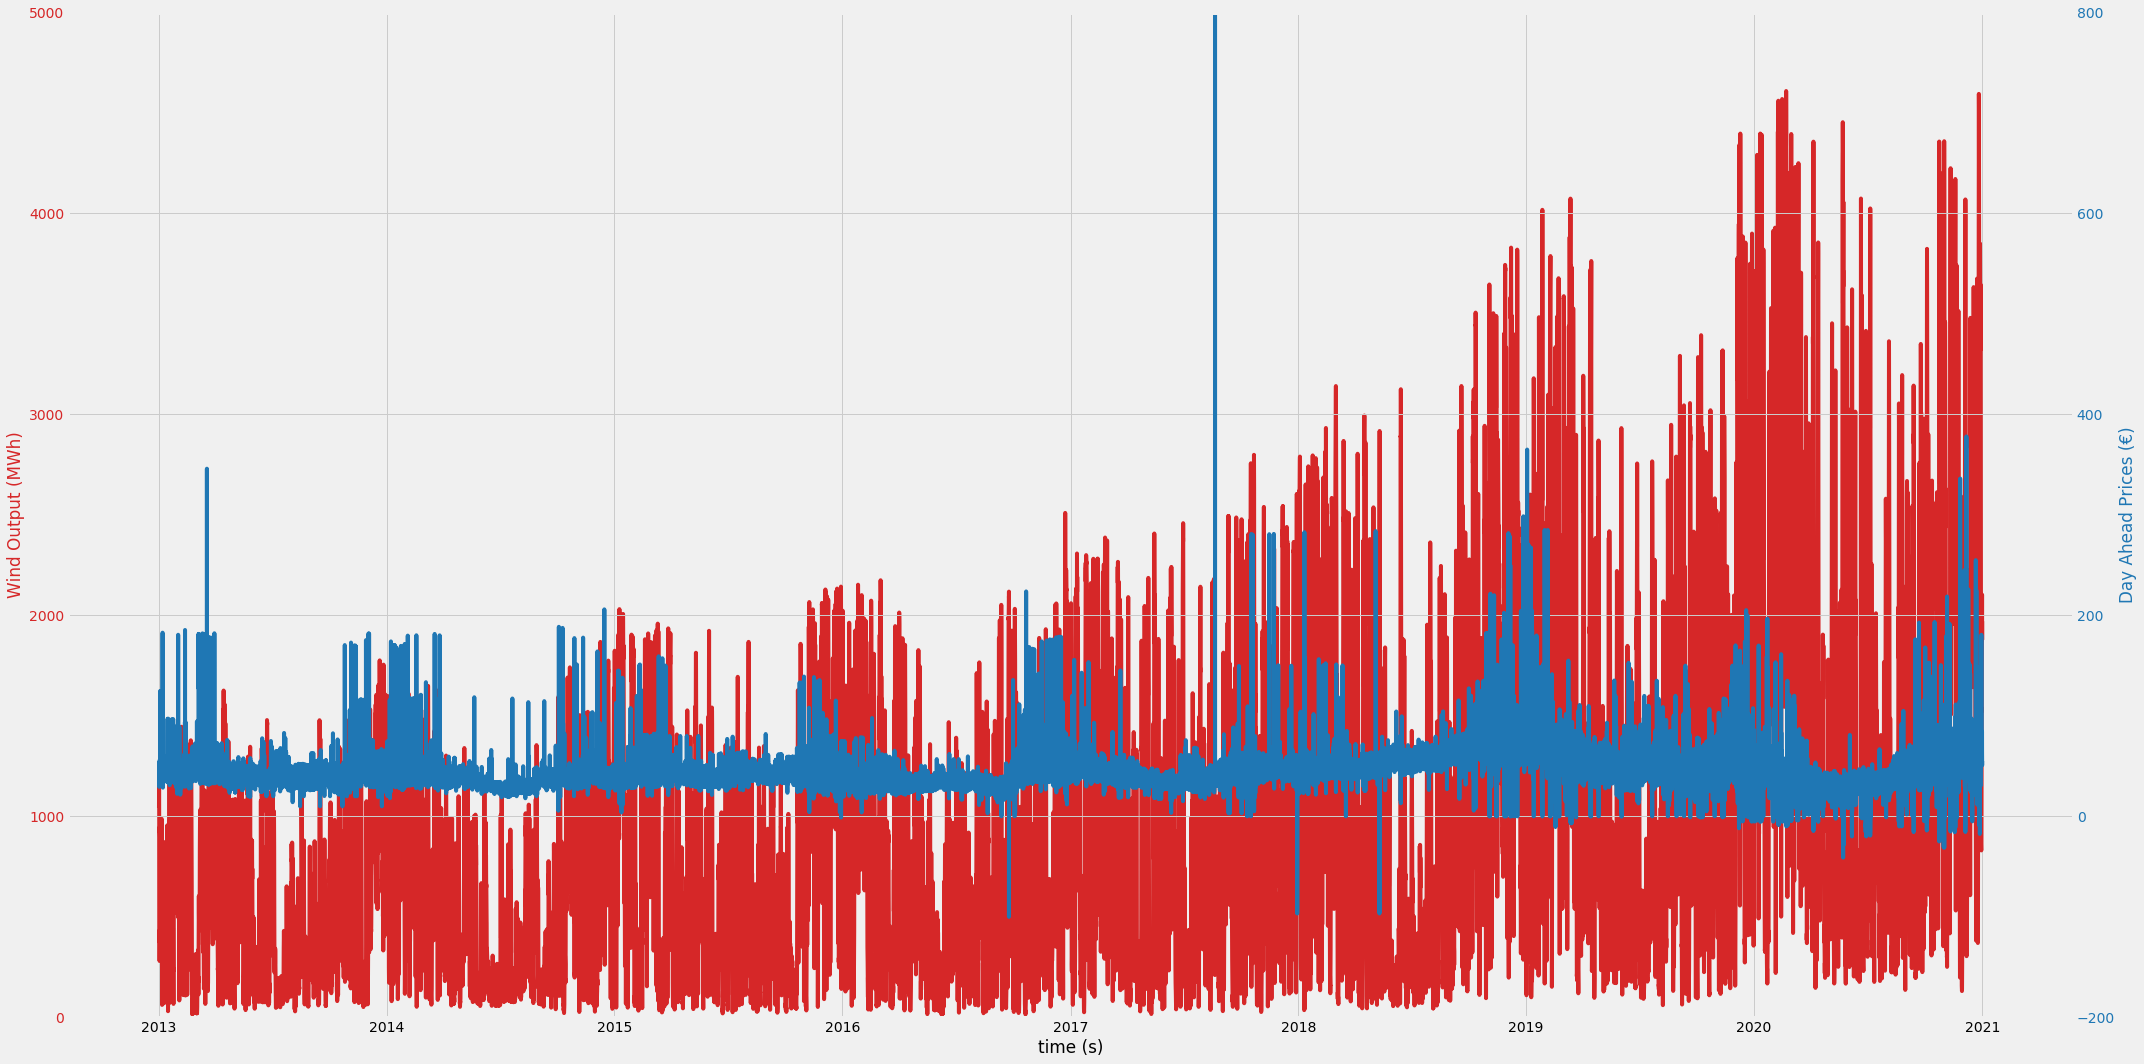

In [11]:
fig, ax1 = plt.subplots(figsize=(30,15))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Wind Output (MWh)', color=color)
ax1.plot(df[['Total_Wind_Fcast']], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 5000);


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Day Ahead Prices (€)', color=color)  # we already handled the x-label with ax1
ax2.plot(df[['DA_Prices']], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-200, 800);

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.figsize=(30,15)
plt.show()

From this graph, even though it is hard to see, it appears that high day ahead prices have occured with high winds. This is unusal as the opposite is believed to be true. However, higher winds have occured in the winter months, when demand is higher.  The data may need to be split into seasonal to get a better representation 


In [12]:
df_wind = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_wind['Date'] = data_list
df_wind = df_wind.set_index('Date')

for year in range(2013,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df.Total_Wind_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_wind['%s_Wind_Fcast' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df.Total_Wind_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_wind['%s_Wind_Fcast' %year] = year_list
        

        
df_dmd = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_dmd['Date'] = data_list
df_dmd = df_dmd.set_index('Date')

for year in range(2013,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df.Total_Demand_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_dmd['%s_Demand_Fcast' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df.Total_Demand_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_dmd['%s_Demand_Fcast' %year] = year_list

        
df_wp = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_wp['Date'] = data_list
df_wp = df_wp.set_index('Date')

for year in range(2013,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df.Wind_Penetration_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_wp['%s_WP_Fcast' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df.Wind_Penetration_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_wp['%s_WP_Fcast' %year] = year_list

df_imports = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_imports['Date'] = data_list
df_imports = df_imports.set_index('Date')

for year in range(2015,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df_inter.Imports.loc[(df_inter.index>=dt.datetime(year,1,1)) & (df_inter.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_imports['%s_Imports' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df_inter.Imports.loc[(df_inter.index>=dt.datetime(year,1,1)) & (df_inter.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_imports['%s_Imports' %year] = year_list 
        
        
        
df_exports = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_exports['Date'] = data_list
df_exports = df_exports.set_index('Date')

for year in range(2015,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df_inter.Exports.loc[(df_inter.index>=dt.datetime(year,1,1)) & (df_inter.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_exports['%s_Exports' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df_inter.Exports.loc[(df_inter.index>=dt.datetime(year,1,1)) & (df_inter.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_exports['%s_Exports' %year] = year_list 


In [13]:
df_imports

2015_Imports  2016_Imports  2017_Imports  2018_Imports  \
Date                                                                          
2000-01-01 00:00:00           0.0           0.0         296.0         163.0   
2000-01-01 01:00:00           0.0           0.0         300.0         152.0   
2000-01-01 02:00:00           0.0           0.0         300.0         303.0   
2000-01-01 03:00:00           0.0           0.0         300.0         307.0   
2000-01-01 04:00:00           0.0           0.0         300.0         283.0   
...                           ...           ...           ...           ...   
2000-12-31 19:00:00          30.0        1089.0        1158.0         980.0   
2000-12-31 20:00:00         171.0         807.0        1218.0         972.0   
2000-12-31 21:00:00         185.0         516.0        1149.0         965.0   
2000-12-31 22:00:00          40.0         300.0         967.0         980.0   
2000-12-31 23:00:00           0.0         300.0         420.0         865.0   

                     2019_Imports  2020_Imports  
Date                                             
2000-01-01 00:00:00         691.0         233.0  
2000-01-01 01:00:00         740.0          61.0  
2000-01-01 02:00:00         936.0         264.0  
2000-01-01 03:00:00         980.0         231.0  
2000-01-01 04:00:00         980.0         186.0  
...                           ...           ...  
2000-12-31 19:00:00         940.0           0.0  
2000-12-31 20:00:00         733.0           0.0  
2000-12-31 21:00:00         799.0           0.0  
2000-12-31 22:00:00         835.0           0.0  
2000-12-31 23:00:00         671.0           0.0  

[8784 rows x 6 columns]

In [14]:
df_exports

2015_Exports  2016_Exports  2017_Exports  2018_Exports  \
Date                                                                          
2000-01-01 00:00:00           0.0         434.0        1105.0          30.0   
2000-01-01 01:00:00           0.0         456.0        1326.0         160.0   
2000-01-01 02:00:00           0.0         474.0        1323.0         453.0   
2000-01-01 03:00:00           0.0         371.0        1423.0         590.0   
2000-01-01 04:00:00           0.0         362.0        1261.0         506.0   
...                           ...           ...           ...           ...   
2000-12-31 19:00:00         301.0         413.0         113.0           0.0   
2000-12-31 20:00:00         103.0         656.0         261.0           0.0   
2000-12-31 21:00:00         215.0         687.0         207.0           0.0   
2000-12-31 22:00:00         221.0         641.0         182.0           0.0   
2000-12-31 23:00:00         438.0         879.0          39.0           0.0   

                     2019_Exports  2020_Exports  
Date                                             
2000-01-01 00:00:00           0.0           0.0  
2000-01-01 01:00:00           0.0           0.0  
2000-01-01 02:00:00           0.0           0.0  
2000-01-01 03:00:00           0.0           0.0  
2000-01-01 04:00:00           0.0           0.0  
...                           ...           ...  
2000-12-31 19:00:00           0.0         898.0  
2000-12-31 20:00:00           0.0         900.0  
2000-12-31 21:00:00           0.0         900.0  
2000-12-31 22:00:00           0.0         900.0  
2000-12-31 23:00:00           0.0         602.0  

[8784 rows x 6 columns]

In [15]:
#Monthly imports percentage increase
df_imports_month = pd.DataFrame()

for year in range(2015,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %year].iloc[i+1] - (df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %year].iloc[i] ) /((df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %year].iloc[i]) )
    
    if year >= 2016:
        x = ( (df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %year].iloc[0] - (df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %(year-1)].iloc[11] ) /((df_imports.groupby(df_imports.index.month).sum())['%s_Imports' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_imports_month['%s_imports_per' %year] = thelist

    
    
#Monthly exports percentage increase
df_exports_month = pd.DataFrame()

for year in range(2015,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %year].iloc[i+1] - (df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %year].iloc[i] ) /((df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %year].iloc[i]) )
    
    if year >= 2016:
        x = ( (df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %year].iloc[0] - (df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %(year-1)].iloc[11] ) /((df_exports.groupby(df_exports.index.month).sum())['%s_Exports' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_exports_month['%s_exports_per' %year] = thelist

C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars


In [16]:
df_exports_month

2015_exports_per  2016_exports_per  2017_exports_per  2018_exports_per  \
0                NaN          0.000000          0.297573          0.047060   
1                NaN         -0.064516         -0.105289         -0.185640   
2                inf          0.036155         -0.153374         -0.365298   
3           8.234931         -0.001614          0.077760          0.511574   
4           0.128171          0.033333          0.037323         -0.045518   
5          -0.221367         -0.032258          0.360770          0.277401   
6           0.102081          0.033333         -0.153325          0.032535   
7           0.749492          0.051980         -0.296237          0.182617   
8          -0.193572         -0.153077          0.012609         -0.365111   
9          -0.065429          0.675561         -0.228849         -0.409252   
10         -0.286288          0.091654         -0.302892          0.500054   
11          0.033333         -0.133501          0.391704         -0.397332   

    2019_exports_per  2020_exports_per  
0          -0.184696         -0.233396  
1           0.772587          0.677914  
2          -0.007574         -0.351377  
3           0.003232         -0.403353  
4          -0.192585          1.643055  
5           0.474936          0.018708  
6          -0.521791          0.123218  
7           0.201004         -0.286111  
8           0.156101          0.245230  
9           0.454019         -0.192417  
10         -0.067742          0.059090  
11          0.066482          0.235886

In [17]:

#Monthly wind percentage increase
df_wind_month = pd.DataFrame()

for year in range(2013,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[i+1] - (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[i] ) /((df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[i]) )
    
    if year >= 2014:
        x = ( (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[0] - (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %(year-1)].iloc[11] ) /((df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_wind_month['%s_wind_per' %year] = thelist
    
    
#Monthly demand percentage increase
df_dmd_month = pd.DataFrame()

for year in range(2013,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[i+1] - (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[i] ) /((df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[i]) )
    
    if year >= 2014:
        x = ( (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[0] - (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %(year-1)].iloc[11] ) /((df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_dmd_month['%s_demand_per' %year] = thelist
    
    
#Monthly WP percentage increase
df_wp_month = pd.DataFrame()

for year in range(2013,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[i+1] - (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[i] ) /((df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[i]) )
    
    if year >= 2014:
        x = ( (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[0] - (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %(year-1)].iloc[11] ) /((df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_wp_month['%s_wind_penetration_per' %year] = thelist

In [18]:
df_wind_month

2013_wind_per  2014_wind_per  2015_wind_per  2016_wind_per  2017_wind_per  \
0             NaN      -0.198048       0.169082      -0.179118      -0.052019   
1       -0.102654       0.099155      -0.411770      -0.208762       0.199138   
2        0.102426      -0.248102       0.282587      -0.202710      -0.117230   
3        0.091853      -0.316598      -0.398098      -0.046022      -0.413004   
4       -0.130562      -0.047620       0.418504      -0.277214       0.064493   
5       -0.350394      -0.410211      -0.314683      -0.130882       0.327361   
6       -0.321045       0.145290       0.165521       0.121775      -0.346128   
7        0.346318       0.543573      -0.127920       0.277501       0.226108   
8        0.182419      -0.457911      -0.064126       0.308613       0.375650   
9        0.412269       2.000110       0.150523      -0.189635       0.239500   
10      -0.126135      -0.265564       1.000319       0.138551      -0.183383   
11       0.916629       0.780826       0.225049       0.414830       0.295667   

    2018_wind_per  2019_wind_per  2020_wind_per  
0        0.307275      -0.150371       0.021702  
1       -0.192063       0.382377       0.371105  
2       -0.142591      -0.128757      -0.286025  
3       -0.123929      -0.258359      -0.480500  
4       -0.229919      -0.364345       0.258588  
5       -0.319415       0.113528      -0.058089  
6       -0.041853      -0.229460      -0.106617  
7        0.612111       0.654544      -0.075626  
8        0.243192       0.067808       0.191352  
9        0.397641       0.192196       0.479459  
10       0.346074      -0.123300      -0.017584  
11      -0.094124       0.621280       0.149139

In [19]:
df_year = pd.DataFrame()
yearlist = []

for year in range(2013,2021):
    yearlist.append(year)

df_year['Year'] = yearlist
df_year['Total_Yearly_Wind (TWh)']  = (((df_wind.groupby(df_wind.index.year).sum()).iloc[0])/(1000000)).tolist()
df_year['Total_Yearly_Demand (TWh)']  = (((df_dmd.groupby(df_dmd.index.year).sum()).iloc[0])/(1000000)).tolist()
df_year['Average_Yearly_WP']  = ((df_wp.groupby(df_wp.index.year).mean()).iloc[0]).tolist()

thelist = [0,0]
thelist.extend(   ( (   (df_imports.groupby(df_imports.index.year).sum()).iloc[0])/(1000000)).tolist()   ) 
df_year['Total_Yearly_Imports (TWh)'] = thelist

thelist = [0,0]
thelist.extend(   ( ((df_exports.groupby(df_exports.index.year).sum()).iloc[0])/(1000000)).tolist()  )   
df_year['Total_Yearly_Exports (TWh)'] = thelist

thelist = []
for i in range(0,7):
    thelist.append(( df_year['Total_Yearly_Wind (TWh)'].loc[i+1] - df_year['Total_Yearly_Wind (TWh)'].iloc[i] ) /(df_year['Total_Yearly_Wind (TWh)'].loc[i]) )
thelist.insert(0,df_wind_month['2013_wind_per'].mean())
df_year['Total_Yearly_Wind (Per)' ] = thelist

thelist = []
for i in range(0,7):
    thelist.append(( df_year['Total_Yearly_Demand (TWh)'].loc[i+1] - df_year['Total_Yearly_Demand (TWh)'].iloc[i] ) /(df_year['Total_Yearly_Demand (TWh)'].loc[i]) )
thelist.insert(0,df_dmd_month['2013_demand_per'].mean())
df_year['Total_Yearly_Demand (Per)' ] = thelist


thelist = []
for i in range(0,7):
    thelist.append(( df_year['Average_Yearly_WP'].loc[i+1] - df_year['Average_Yearly_WP'].iloc[i] ) /(df_year['Average_Yearly_WP'].loc[i]) )
thelist.insert(0,df_wp_month['2013_wind_penetration_per'].mean())
df_year['Average_Yearly_WP_Per' ] = thelist



thelist = []
for i in range(0,7):
    thelist.append(( df_year['Total_Yearly_Imports (TWh)'].loc[i+1] - df_year['Total_Yearly_Imports (TWh)'].iloc[i] ) /(df_year['Total_Yearly_Imports (TWh)'].loc[i]) )
thelist.insert(0,df_imports_month['2015_imports_per'].mean())
df_year['Total_Yearly_Imports (Per)' ] = thelist

thelist = []
for i in range(0,7):
    thelist.append(( df_year['Total_Yearly_Exports (TWh)'].loc[i+1] - df_year['Total_Yearly_Exports (TWh)'].iloc[i] ) /(df_year['Total_Yearly_Exports (TWh)'].loc[i]) )
thelist.insert(0,df_exports_month['2015_exports_per'].mean())
df_year['Total_Yearly_Exports (Per)' ] = thelist


df_year = df_year.set_index(['Year'])

C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\09ant\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars


In [20]:
df_year

Total_Yearly_Wind (TWh)  Total_Yearly_Demand (TWh)  Average_Yearly_WP  \
Year                                                                          
2013                 5.012029                  34.892797           0.147611   
2014                 5.007505                  34.643871           0.147365   
2015                 6.607639                  35.296740           0.190270   
2016                 6.232170                  35.783781           0.178452   
2017                 7.927789                  36.041939           0.226560   
2018                 9.879353                  37.142728           0.267790   
2019                11.747678                  37.248110           0.322159   
2020                14.764542                  37.133391           0.404553   

      Total_Yearly_Imports (TWh)  Total_Yearly_Exports (TWh)  \
Year                                                           
2013                    0.000000                    0.000000   
2014                    0.000000                    0.000000   
2015                    3.613990                    3.026183   
2016                    1.870093                    3.693782   
2017                    4.135369                    4.703731   
2018                    3.102590                    2.541433   
2019                    2.497752                    1.724047   
2020                    1.735516                    2.442079   

      Total_Yearly_Wind (Per)  Total_Yearly_Demand (Per)  \
Year                                                       
2013                 0.092829                  -0.003303   
2014                -0.000903                  -0.007134   
2015                 0.319547                   0.018845   
2016                -0.056824                   0.013798   
2017                 0.272075                   0.007214   
2018                 0.246167                   0.030542   
2019                 0.189114                   0.002837   
2020                 0.256805                  -0.003080   

      Average_Yearly_WP_Per  Total_Yearly_Imports (Per)  \
Year                                                      
2013               0.095186                         inf   
2014              -0.001669                         NaN   
2015               0.291151                         inf   
2016              -0.062111                   -0.482541   
2017               0.269582                    1.211317   
2018               0.181982                   -0.249743   
2019               0.203030                   -0.194946   
2020               0.255755                   -0.305169   

      Total_Yearly_Exports (Per)  
Year                              
2013                         inf  
2014                         NaN  
2015                         inf  
2016                    0.220608  
2017                    0.273419  
2018                   -0.459698  
2019                   -0.321624  
2020                    0.416481

In [21]:
df_increases = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Total Data Analysis and Neg Price Model\percentage_predictions.csv')
#df_increases = pd.read_csv('percentage_predictions.csv') #Uncomment to use

df_increases.columns = ['','Wind', 'Renewables', 'Import','Export','Low Demand', 'Median Demand', 'High Demand','Average Demand','Solar']
df_increases[''] = pd.to_datetime(df_increases[''], format='%Y')
df_increases = df_increases.set_index('')
df_increases

Wind  Renewables  Import  Export  Low Demand  Median Demand  \
                                                                            
2020-01-01  0.0000      0.0000  0.0000  0.0000     0.01280         0.0255   
2021-01-01  0.0357      0.0502 -0.0667  0.0000     0.01260         0.0299   
2022-01-01  0.0454      0.0477  0.2857  0.0000     0.01490         0.0386   
2023-01-01  0.0423      0.1121  0.0556  0.0000     0.01720         0.0256   
2024-01-01  0.0517      0.0664 -0.0263  0.3056     0.01930         0.0272   
2025-01-01  0.0302      0.1127  0.4238  0.2553     0.01180         0.0155   
2026-01-01  0.0176      0.1461  0.2976  0.2034     0.01400         0.0217   
2027-01-01  0.0173      0.1275  0.2288  0.1268     0.01150         0.0191   
2028-01-01  0.0170      0.1129  0.0000  0.0000     0.01370         0.0209   
2029-01-01  0.0167      0.1016  0.0000  0.0000     0.00900         0.0184   
2030-01-01  0.0213      0.0785  0.0000  0.0000     0.01368         0.0242   
2031-01-01  0.0208      0.0785  0.0000  0.0000     0.01368         0.0242   
2032-01-01  0.0204      0.0785  0.0000  0.0000     0.01368         0.0242   
2033-01-01  0.0200      0.0785  0.0000  0.0000     0.01368         0.0242   
2034-01-01  0.0196      0.0785  0.0000  0.0000     0.01368         0.0242   
2035-01-01  0.0192      0.0785  0.0000  0.0000     0.01368         0.0242   
2036-01-01  0.0188      0.0785  0.0000  0.0000     0.01368         0.0242   
2037-01-01  0.0185      0.0785  0.0000  0.0000     0.01368         0.0242   
2038-01-01  0.0182      0.0785  0.0000  0.0000     0.01368         0.0242   
2039-01-01  0.0178      0.0785  0.0000  0.0000     0.01368         0.0242   
2040-01-01  0.0175      0.0785  0.0000  0.0000     0.01368         0.0242   

            High Demand  Average Demand   Solar  
                                                 
2020-01-01       0.0383          0.0319  0.0000  
2021-01-01       0.0491          0.0395  1.4686  
2022-01-01       0.0585          0.0486  0.6323  
2023-01-01       0.0310          0.0283  0.0000  
2024-01-01       0.0365          0.0319  0.1081  
2025-01-01       0.0311          0.0233  0.1140  
2026-01-01       0.0321          0.0269  0.1365  
2027-01-01       0.0292          0.0242  0.1208  
2028-01-01       0.0284          0.0247  0.0082  
2029-01-01       0.0221          0.0203  0.0618  
2030-01-01       0.0356          0.0299  0.0582  
2031-01-01       0.0356          0.0299  0.0488  
2032-01-01       0.0356          0.0299  0.0569  
2033-01-01       0.0356          0.0299  0.0533  
2034-01-01       0.0356          0.0299  0.0511  
2035-01-01       0.0356          0.0299  0.0486  
2036-01-01       0.0356          0.0299  0.0463  
2037-01-01       0.0356          0.0299  0.0439  
2038-01-01       0.0356          0.0299  0.0424  
2039-01-01       0.0356          0.0299  0.0407  
2040-01-01       0.0356          0.0299  0.0388

In [22]:
df_year_update = pd.DataFrame()
yearlist = []

for year in range(2013,2041):
    yearlist.append(year)

df_year_update['Year'] = yearlist

thelist = []
thelist.extend((df_year['Total_Yearly_Wind (Per)'].tolist()))
thelist.extend((df_increases['Wind'].tolist())[1::])
df_year_update['Wind Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Demand (Per)'].tolist()))
thelist.extend((df_increases['Low Demand'].tolist())[1::])
df_year_update['Low Demand Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Demand (Per)'].tolist()))
thelist.extend((df_increases['Median Demand'].tolist())[1::])
df_year_update['Median Demand Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Demand (Per)'].tolist()))
thelist.extend((df_increases['High Demand'].tolist())[1::])
df_year_update['High Demand Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Imports (Per)'].tolist()))
thelist.extend((df_increases['Import'].tolist())[1::])
df_year_update['Imports Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Exports (Per)'].tolist()))
thelist.extend((df_increases['Export'].tolist())[1::])
df_year_update['Exports Increase' ] = thelist

thelist = []
thelist.extend( [0.0,0.0,0.0,0.0,0.0,0.0,0.0] )
thelist.extend((df_increases['Solar'].tolist())[::])
df_year_update['Solar Increase' ] = thelist

In [23]:
df_year_update['Year'] = pd.to_datetime(df_year_update['Year'], format='%Y')
#df_year_update = df_year_update.set_index('Year')
df_year_update

Year  Wind Increase  Low Demand Increase  Median Demand Increase  \
0  2013-01-01       0.092829            -0.003303               -0.003303   
1  2014-01-01      -0.000903            -0.007134               -0.007134   
2  2015-01-01       0.319547             0.018845                0.018845   
3  2016-01-01      -0.056824             0.013798                0.013798   
4  2017-01-01       0.272075             0.007214                0.007214   
5  2018-01-01       0.246167             0.030542                0.030542   
6  2019-01-01       0.189114             0.002837                0.002837   
7  2020-01-01       0.256805            -0.003080               -0.003080   
8  2021-01-01       0.035700             0.012600                0.029900   
9  2022-01-01       0.045400             0.014900                0.038600   
10 2023-01-01       0.042300             0.017200                0.025600   
11 2024-01-01       0.051700             0.019300                0.027200   
12 2025-01-01       0.030200             0.011800                0.015500   
13 2026-01-01       0.017600             0.014000                0.021700   
14 2027-01-01       0.017300             0.011500                0.019100   
15 2028-01-01       0.017000             0.013700                0.020900   
16 2029-01-01       0.016700             0.009000                0.018400   
17 2030-01-01       0.021300             0.013680                0.024200   
18 2031-01-01       0.020800             0.013680                0.024200   
19 2032-01-01       0.020400             0.013680                0.024200   
20 2033-01-01       0.020000             0.013680                0.024200   
21 2034-01-01       0.019600             0.013680                0.024200   
22 2035-01-01       0.019200             0.013680                0.024200   
23 2036-01-01       0.018800             0.013680                0.024200   
24 2037-01-01       0.018500             0.013680                0.024200   
25 2038-01-01       0.018200             0.013680                0.024200   
26 2039-01-01       0.017800             0.013680                0.024200   
27 2040-01-01       0.017500             0.013680                0.024200   

    High Demand Increase  Imports Increase  Exports Increase  Solar Increase  
0              -0.003303               inf               inf          0.0000  
1              -0.007134               NaN               NaN          0.0000  
2               0.018845               inf               inf          0.0000  
3               0.013798         -0.482541          0.220608          0.0000  
4               0.007214          1.211317          0.273419          0.0000  
5               0.030542         -0.249743         -0.459698          0.0000  
6               0.002837         -0.194946         -0.321624          0.0000  
7              -0.003080         -0.305169          0.416481          0.0000  
8               0.049100         -0.066700          0.000000          1.4686  
9               0.058500          0.285700          0.000000          0.6323  
10              0.031000          0.055600          0.000000          0.0000  
11              0.036500         -0.026300          0.305600          0.1081  
12              0.031100          0.423800          0.255300          0.1140  
13              0.032100          0.297600          0.203400          0.1365  
14              0.029200          0.228800          0.126800          0.1208  
15              0.028400          0.000000          0.000000          0.0082  
16              0.022100          0.000000          0.000000          0.0618  
17              0.035600          0.000000          0.000000          0.0582  
18              0.035600          0.000000          0.000000          0.0488  
19              0.035600          0.000000          0.000000          0.0569  
20              0.035600          0.000000          0.000000          0.0533  
21              0.035600          0.0

In [24]:
# df_sarmax = pd.DataFrame()
# data = pd.date_range('1/1/2013', periods = 325, freq ='MS')
# data_list = data.tolist()
# df_sarmax['Date'] = data_list
# df_sarmax = df_sarmax.set_index('Date')

# x = df_year_update.index.to_numpy()
# y = df_year_update['Wind Increase'].to_numpy()
# x_new = np.linspace(0,27,325)
# y_new = np.interp(x_new,x,y)

# df_sarmax['Wind Monthly Increase'] = y_new

# x = df_year_update.index.to_numpy()
# y = df_year_update['Low Demand Increase'].to_numpy()
# x_new = np.linspace(0,27,325)
# y_new = np.interp(x_new,x,y)

# df_sarmax['Low Demand Monthly Increase'] = y_new

# x = df_year_update.index.to_numpy()
# y = df_year_update['Median Demand Increase'].to_numpy()
# x_new = np.linspace(0,27,325)
# y_new = np.interp(x_new,x,y)

# df_sarmax['Median Demand Monthly Increase'] = y_new

# x = df_year_update.index.to_numpy()
# y = df_year_update['High Demand Increase'].to_numpy()
# x_new = np.linspace(0,27,325)
# y_new = np.interp(x_new,x,y)

# df_sarmax['High Demand Monthly Increase'] = y_new
# df_sarmax = df_sarmax*100


In [25]:
df_fcast = pd.DataFrame(index=df_wind.index)

for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Wind' %(i)] = df_wind['%s_Wind_Fcast'%(i)]
        else:
            df_fcast['%s Wind' %(i)] = (df_fcast['%s Wind' %(i-1)])*(1 + (float(df_year_update['Wind Increase'].iloc[k])))
            
        k += 1     

for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Low Demand' %(i)] = df_dmd['%s_Demand_Fcast'%(i)]
        else:
            df_fcast['%s Low Demand' %(i)] = (df_fcast['%s Low Demand' %(i-1)])*(1 + (float(df_year_update['Low Demand Increase'].iloc[k])))
            
        k += 1
        
        
for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Median Demand' %(i)] = df_dmd['%s_Demand_Fcast'%(i)]
        else:
            df_fcast['%s Median Demand' %(i)] = (df_fcast['%s Median Demand' %(i-1)])*(1 + (float(df_year_update['Median Demand Increase'].iloc[k])))
            
        k += 1
        
for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s High Demand' %(i)] = df_dmd['%s_Demand_Fcast'%(i)]
        else:
            df_fcast['%s High Demand' %(i)] = (df_fcast['%s High Demand' %(i-1)])*(1 + (float(df_year_update['High Demand Increase'].iloc[k])))
            
        k += 1
        
        
        
for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Imports' %(i)] = df_imports['%s_Imports'%(i)]
        else:
            df_fcast['%s Imports' %(i)] = (df_fcast['%s Imports' %(i-1)])*(1 + (float(df_year_update['Imports Increase'].iloc[k])))
            
        k += 1
        
        
for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Exports' %(i)] = df_exports['%s_Exports'%(i)]
        else:
            df_fcast['%s Exports' %(i)] = (df_fcast['%s Exports' %(i-1)])*(1 + (float(df_year_update['Exports Increase'].iloc[k])))
            
        k += 1
           
    
df_results_a = pd.DataFrame(index=df_wind.index)

for year in range(2020,2021):  
    for i in range(2020, 2031):
        df_results_a['%s WP at Low Demand' %(i)] = (df_fcast['%s Wind'%(i)])/(df_fcast['%s Low Demand' %(i)])
        df_results_a['%s WP at Median Demand' %(i)] = (df_fcast['%s Wind'%(i)])/(df_fcast['%s Median Demand' %(i)])
        df_results_a['%s WP at High Demand' %(i)] = (df_fcast['%s Wind'%(i)])/(df_fcast['%s High Demand' %(i)])


df_results_a

2020 WP at Low Demand  2020 WP at Median Demand  \
Date                                                                   
2000-01-01 00:00:00               0.227088                  0.227088   
2000-01-01 01:00:00               0.264516                  0.264516   
2000-01-01 02:00:00               0.316733                  0.316733   
2000-01-01 03:00:00               0.351734                  0.351734   
2000-01-01 04:00:00               0.364237                  0.364237   
...                                    ...                       ...   
2000-12-31 19:00:00               0.357578                  0.357578   
2000-12-31 20:00:00               0.370940                  0.370940   
2000-12-31 21:00:00               0.379184                  0.379184   
2000-12-31 22:00:00               0.394513                  0.394513   
2000-12-31 23:00:00               0.454060                  0.454060   

                     2020 WP at High Demand  2021 WP at Low Demand  \
Date                                                                 
2000-01-01 00:00:00                0.227088               0.232268   
2000-01-01 01:00:00                0.264516               0.270551   
2000-01-01 02:00:00                0.316733               0.323958   
2000-01-01 03:00:00                0.351734               0.359758   
2000-01-01 04:00:00                0.364237               0.372546   
...                                     ...                    ...   
2000-12-31 19:00:00                0.357578               0.365736   
2000-12-31 20:00:00                0.370940               0.379402   
2000-12-31 21:00:00                0.379184               0.387834   
2000-12-31 22:00:00                0.394513               0.403513   
2000-12-31 23:00:00                0.454060               0.464418   

                     2021 WP at Median Demand  2021 WP at High Demand  \
Date                                                                    
2000-01-01 00:00:00                  0.228367                0.224187   
2000-01-01 01:00:00                  0.266006                0.261138   
2000-01-01 02:00:00                  0.318517                0.312687   
2000-01-01 03:00:00                  0.353715                0.347241   
2000-01-01 04:00:00                  0.366288                0.359584   
...                                       ...                     ...   
2000-12-31 19:00:00                  0.359592                0.353011   
2000-12-31 20:00:00                  0.373029                0.366202   
2000-12-31 21:00:00                  0.381319                0.374341   
2000-12-31 22:00:00                  0.396735                0.389474   
2000-12-31 23:00:00                  0.456617                0.448260   

                     2022 WP at Low Demand  2022 WP at Median Demand  \
Date                                                                   
2000-01-01 00:00:00               0.239248                  0.229862   
2000-01-01 01:00:00               0.278681                  0.267748   
2000-01-01 02:00:00               0.333694                  0.320602   
2000-01-01 03:00:00               0.370569                  0.356031   
2000-01-01 04:00:00               0.383742                  0.368686   
...                                    ...                       ...   
2000-12-31 19:00:00               0.376727                  0.361946   
2000-12-31 20:00:00               0.390804                  0.375471   
2000-12-31 21:00:00               0.399490                  0.383816   
2000-12-31 22:00:00               0.415639                  0.399332   
2000-12-31 23:00:00               0.478375                  0.459606   

                     2022 WP at High Demand  2023 WP at Low Demand  ...  \
Date                                                                ...   
2000-01-01 00:00:00                0.221413               0.245152  ...   
2000-01-01 01:00:00                0.257906               0.2

In [26]:
for year in range(2021,2031):
    if year%4 != 0:
        df_fcast = df_fcast.reset_index()
        df_fcast['%s Wind' %year].iloc[1416:1440] = np.nan 
        df_fcast['%s Low Demand' %year].iloc[1416:1440] = np.nan 
        df_fcast['%s Median Demand' %year].iloc[1416:1440] = np.nan 
        df_fcast['%s High Demand' %year].iloc[1416:1440] = np.nan       
        df_fcast['%s Imports' %year].iloc[1416:1440] = np.nan 
        df_fcast['%s Exports' %year].iloc[1416:1440] = np.nan 
        df_fcast = df_fcast.set_index('Date')


C:\Users\09ant\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
#This makes one singular dataframe from 2013-2040 
windhourlist = []
lhourlist = []
mhourlist = []
hhourlist = []
imhourlist = []
exhourlist = []

windhourlist = df['Total_Wind_Fcast'].tolist()
lhourlist = df['Total_Demand_Fcast'].tolist()
mhourlist = df['Total_Demand_Fcast'].tolist()
hhourlist = df['Total_Demand_Fcast'].tolist()


for i in range(0,(365*24*2)):
    imhourlist.append(0.0)
    exhourlist.append(0.0)
    


imhourlist.extend( df_inter['Imports'].tolist() )
exhourlist.extend( df_inter['Exports'].tolist() )



for year in range(2021, 2031):
    
    if year%4 != 0:
    # drops nan data of leap year. 
        a = (df_fcast['%s Wind' %year].dropna()).tolist()
        w = (df_fcast['%s Low Demand' %year].dropna()).tolist()
        x = (df_fcast['%s Median Demand' %year].dropna()).tolist()
        y = (df_fcast['%s High Demand' %year].dropna()).tolist()
        b = (df_fcast['%s Imports' %year].dropna()).tolist()
        c = (df_fcast['%s Exports' %year].dropna()).tolist()
    
    else:
        
        a = df_fcast['%s Wind' %year].tolist()
        w = df_fcast['%s Low Demand' %year].tolist()
        x = df_fcast['%s Median Demand' %year].tolist()
        y = df_fcast['%s High Demand' %year].tolist()
        b = (df_fcast['%s Imports' %year]).tolist()
        c = (df_fcast['%s Exports' %year]).tolist()

    windhourlist.extend(a)
    lhourlist.extend(w)
    mhourlist.extend(x)
    hhourlist.extend(y)
    imhourlist.extend(b)
    exhourlist.extend(c)

data = pd.date_range('1/1/2013', '1/1/2031', freq ='H')
data_list = data.tolist()
data_list.pop()
df1 = pd.DataFrame()
df1['date'] = data_list
df1['wind'] = windhourlist
df1['low demand'] = lhourlist
df1['median demand'] = mhourlist
df1['high demand'] = hhourlist

df1['imports'] = imhourlist
df1['exports'] = exhourlist

df1 = df1.set_index('date')

In [28]:
df1

wind   low demand  median demand  high demand  \
date                                                                        
2013-01-01 00:00:00  1042.239000  3803.080000    3803.080000  3803.080000   
2013-01-01 01:00:00  1092.219000  3518.080000    3518.080000  3518.080000   
2013-01-01 02:00:00  1140.414000  3221.360000    3221.360000  3221.360000   
2013-01-01 03:00:00  1175.463000  2994.740000    2994.740000  2994.740000   
2013-01-01 04:00:00  1173.676000  2900.830000    2900.830000  2900.830000   
...                          ...          ...            ...          ...   
2030-12-31 19:00:00  2811.135582  6743.171918    7462.383448  8321.473504   
2030-12-31 20:00:00  2742.682013  6341.996235    7018.419269  7826.398951   
2030-12-31 21:00:00  2636.921362  5964.866993    6601.066272  7360.999132   
2030-12-31 22:00:00  2511.155155  5459.665856    6041.981520  6737.551009   
2030-12-31 23:00:00  2634.727929  4977.102127    5507.948630  6142.038788   

                     imports      exports  
date                                       
2013-01-01 00:00:00      0.0     0.000000  
2013-01-01 01:00:00      0.0     0.000000  
2013-01-01 02:00:00      0.0     0.000000  
2013-01-01 03:00:00      0.0     0.000000  
2013-01-01 04:00:00      0.0     0.000000  
...                      ...          ...  
2030-12-31 19:00:00      0.0  1995.679758  
2030-12-31 20:00:00      0.0  2000.124479  
2030-12-31 21:00:00      0.0  2000.124479  
2030-12-31 22:00:00      0.0  2000.124479  
2030-12-31 23:00:00      0.0  1337.861041  

[157776 rows x 6 columns]

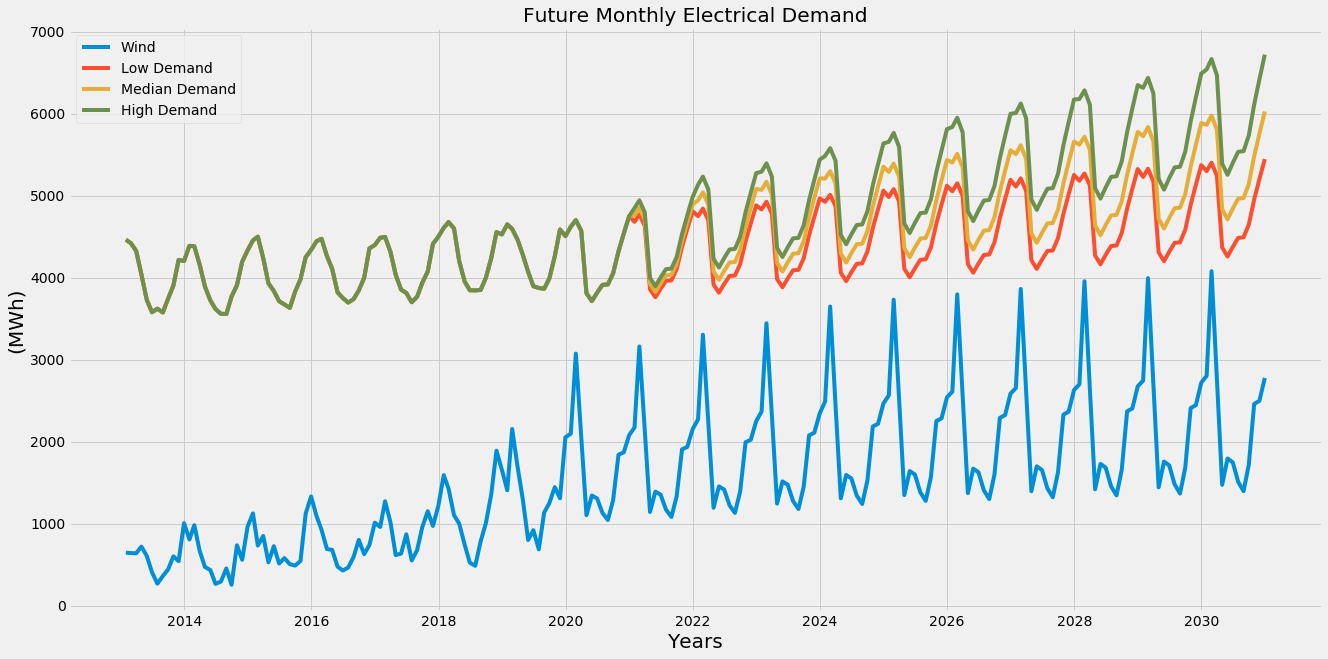

In [29]:
plt.figure(figsize=(20,10))
plt.plot(df1['wind'].resample('M').mean())
plt.plot(df1['low demand'].resample('M').mean())
plt.plot(df1['median demand'].resample('M').mean())
plt.plot(df1['high demand'].resample('M').mean())
plt.legend(labels=['Wind','Low Demand', 'Median Demand','High Demand'])
plt.title('Future Monthly Electrical Demand')
plt.xlabel('Years', size =20)
plt.ylabel('(MWh)',size=20)

plt.show()

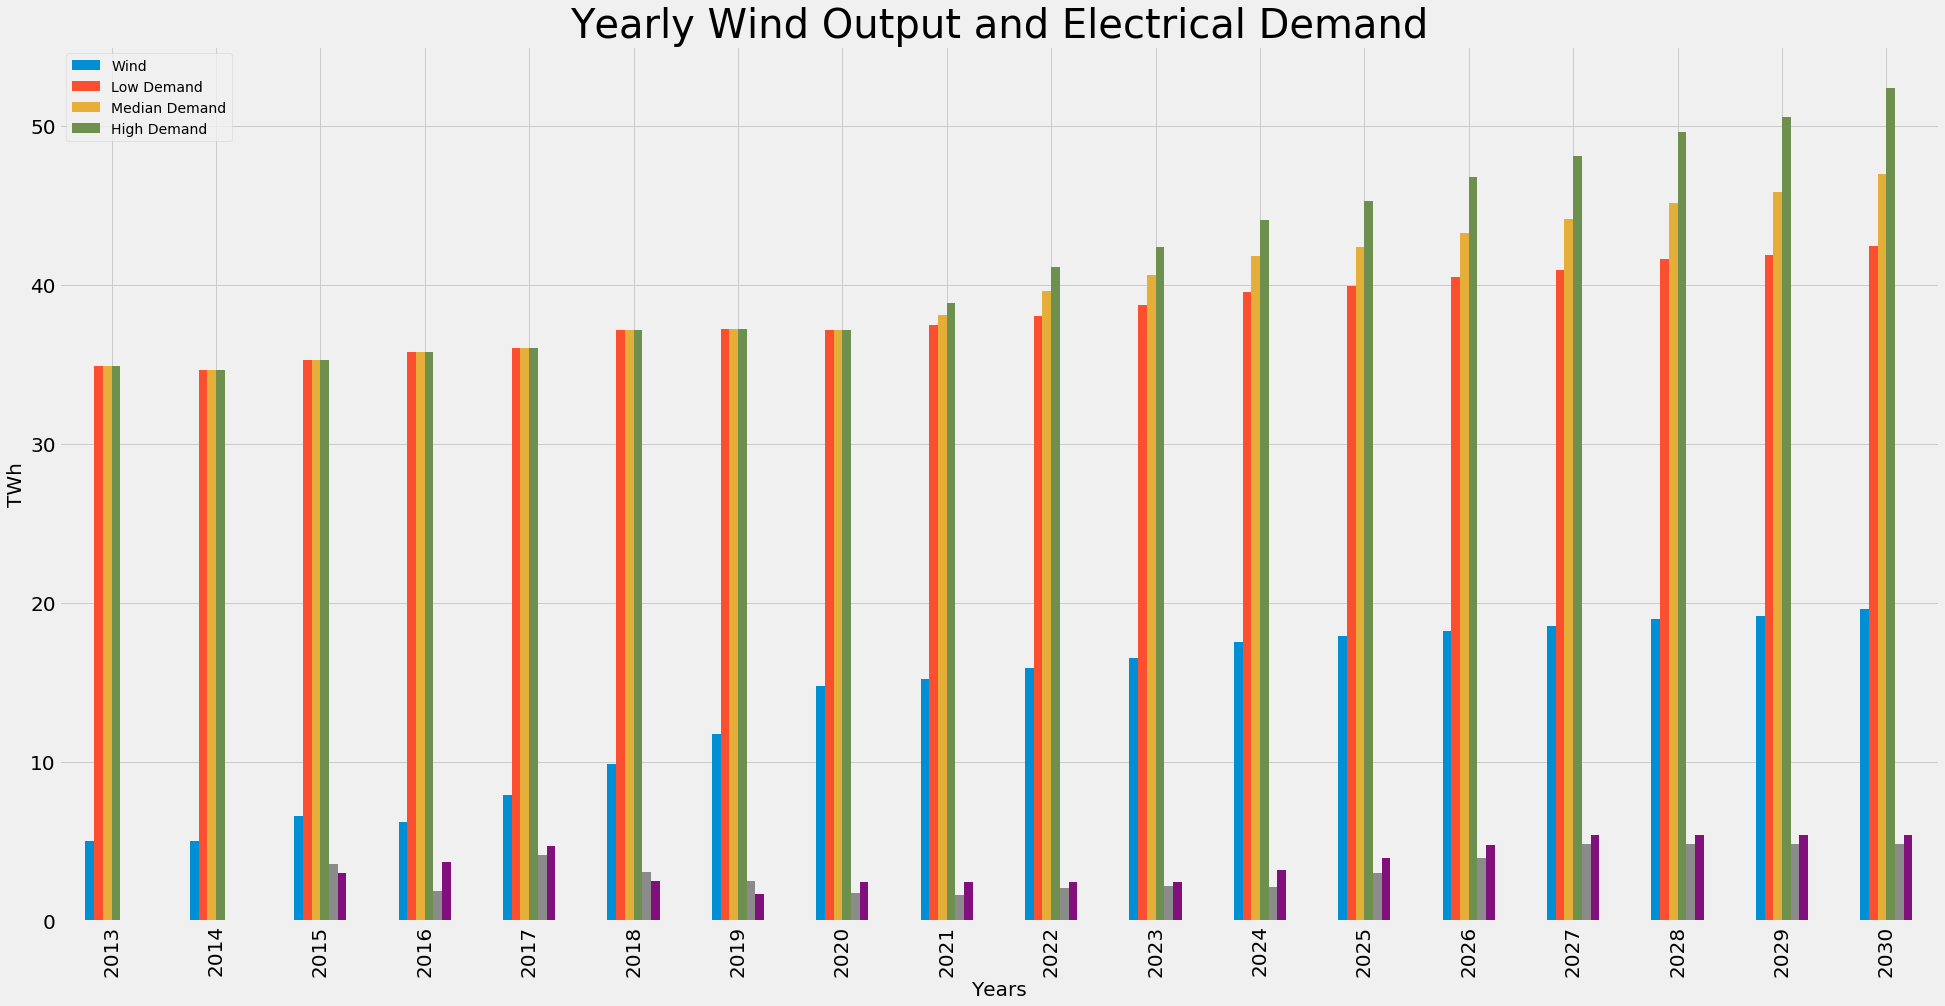

In [30]:
(df1.groupby(df1.index.year).sum()/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Yearly Wind Output and Electrical Demand', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);
plt.legend(labels=['Wind','Low Demand', 'Median Demand','High Demand'])

In [31]:
df_wp = pd.DataFrame(df1.index)


df1['WP Low Forecast'] = df1['wind' ]/df1['low demand' ]
df1['WP Median Forecast'] = df1['wind' ]/df1['median demand' ]
df1['WP High Forecast'] = df1['wind' ]/df1['high demand' ]

df_wp['WP Low Forecast'] = df1['WP Low Forecast'].tolist()
df_wp['WP Median Forecast'] = df1['WP Median Forecast'].tolist()
df_wp['WP High Forecast'] = df1['WP High Forecast'].tolist()

df_wp = df_wp.set_index('date')
df_wp

WP Low Forecast  WP Median Forecast  WP High Forecast
date                                                                      
2013-01-01 00:00:00         0.274051            0.274051          0.274051
2013-01-01 01:00:00         0.310459            0.310459          0.310459
2013-01-01 02:00:00         0.354016            0.354016          0.354016
2013-01-01 03:00:00         0.392509            0.392509          0.392509
2013-01-01 04:00:00         0.404600            0.404600          0.404600
...                              ...                 ...               ...
2030-12-31 19:00:00         0.416886            0.376707          0.337817
2030-12-31 20:00:00         0.432464            0.390783          0.350440
2030-12-31 21:00:00         0.442075            0.399469          0.358229
2030-12-31 22:00:00         0.459947            0.415618          0.372710
2030-12-31 23:00:00         0.529370            0.478350          0.428966

[157776 rows x 3 columns]

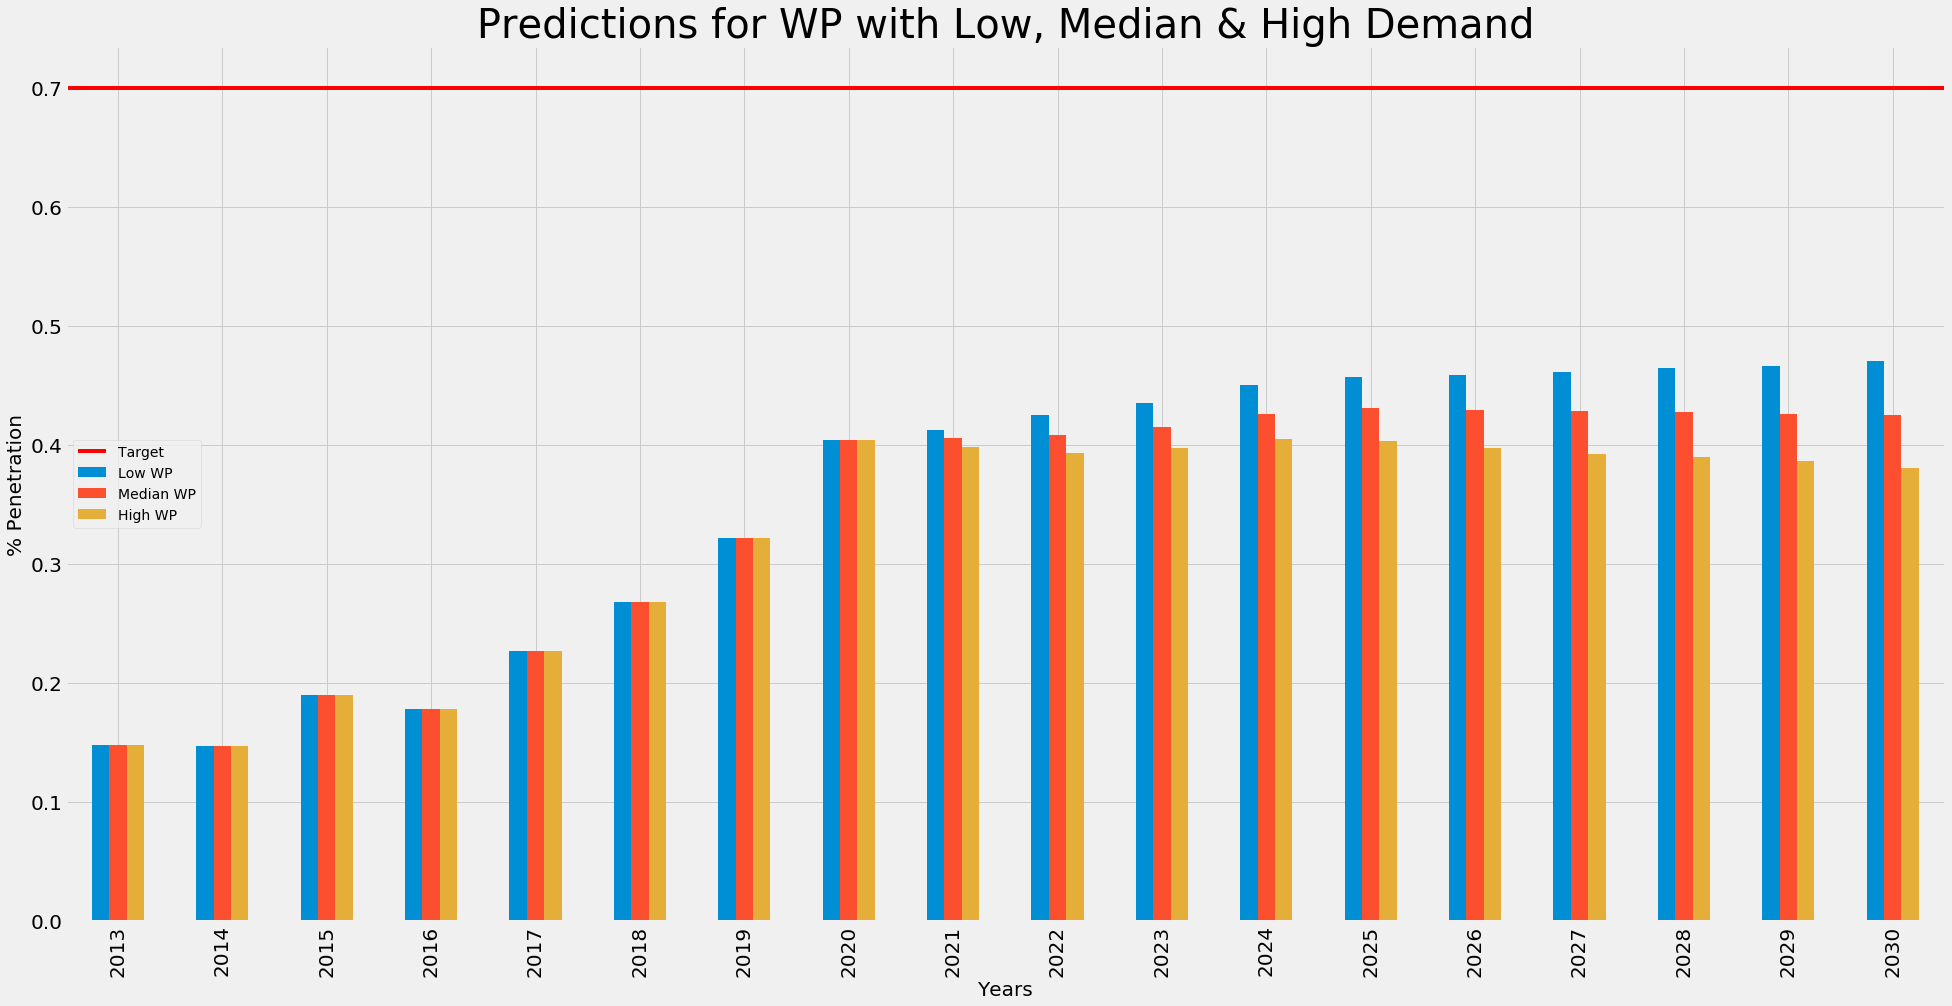

In [32]:
(df_wp.groupby(df_wp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Predictions for WP with Low, Median & High Demand', size =40)
plt.axhline(y=0.7, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('% Penetration',size=20)
plt.yticks(size=20);
plt.legend(labels=['Target','Low WP', 'Median WP','High WP'])

In [33]:
df_snsp = pd.DataFrame(df1.index)


df1['SNSP Low Forecast'] = (df1['wind' ]+df1['imports'])/(df1['low demand' ] +df1['exports'])
df1['SNSP Median Forecast'] = (df1['wind' ]+df1['imports'])/(df1['median demand' ] +df1['exports'])
df1['SNSP High Forecast'] = (df1['wind' ]+df1['imports'])/(df1['high demand' ] +df1['exports'])

df_snsp['SNSP Low Forecast'] = df1['SNSP Low Forecast'].tolist()
df_snsp['SNSP Median Forecast'] = df1['SNSP Median Forecast'].tolist()
df_snsp['SNSP High Forecast'] = df1['SNSP High Forecast'].tolist()

df_snsp = df_snsp.set_index('date')
df_snsp

SNSP Low Forecast  SNSP Median Forecast  \
date                                                           
2013-01-01 00:00:00           0.274051              0.274051   
2013-01-01 01:00:00           0.310459              0.310459   
2013-01-01 02:00:00           0.354016              0.354016   
2013-01-01 03:00:00           0.392509              0.392509   
2013-01-01 04:00:00           0.404600              0.404600   
...                                ...                   ...   
2030-12-31 19:00:00           0.321682              0.297221   
2030-12-31 20:00:00           0.328775              0.304116   
2030-12-31 21:00:00           0.331064              0.306576   
2030-12-31 22:00:00           0.336625              0.312251   
2030-12-31 23:00:00           0.417220              0.384867   

                     SNSP High Forecast  
date                                     
2013-01-01 00:00:00            0.274051  
2013-01-01 01:00:00            0.310459  
2013-01-01 02:00:00            0.354016  
2013-01-01 03:00:00            0.392509  
2013-01-01 04:00:00            0.404600  
...                                 ...  
2030-12-31 19:00:00            0.272472  
2030-12-31 20:00:00            0.279110  
2030-12-31 21:00:00            0.281689  
2030-12-31 22:00:00            0.287394  
2030-12-31 23:00:00            0.352241  

[157776 rows x 3 columns]

C:\Users\09ant\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


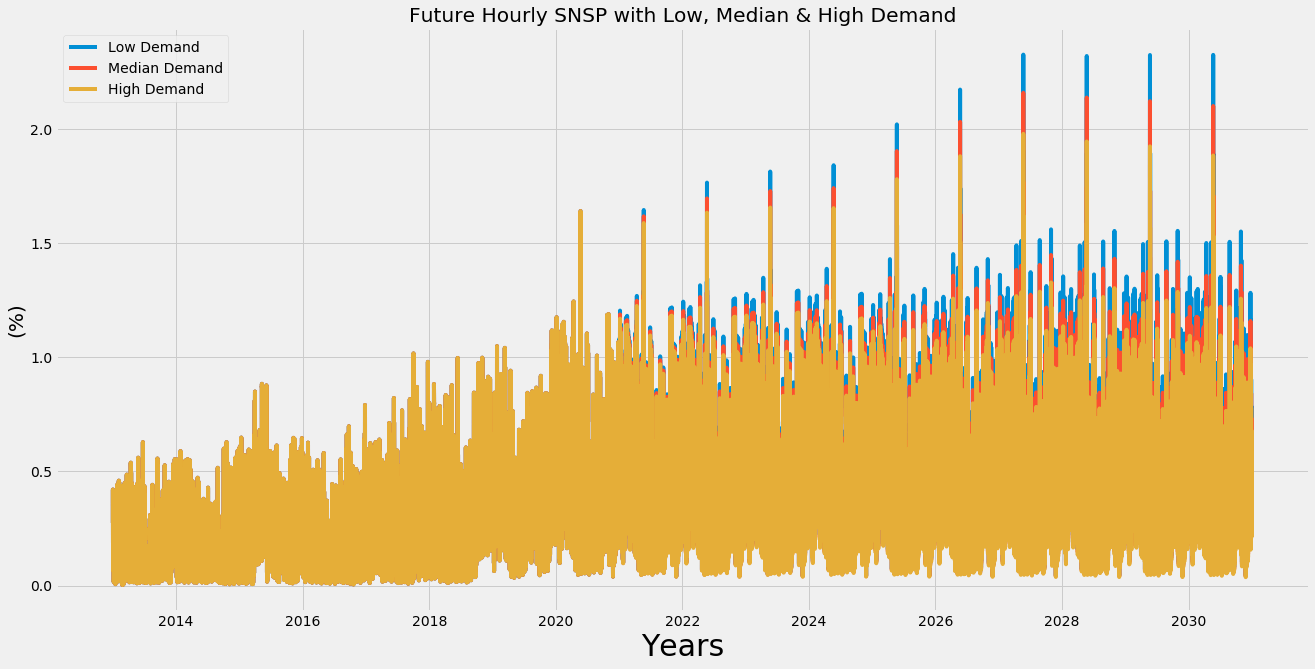

In [34]:
plt.figure(figsize=(20,10))
plt.plot(df_snsp)

plt.legend(labels=['Low Demand', 'Median Demand','High Demand'])
plt.title('Future Hourly SNSP with Low, Median & High Demand')
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()

In [35]:
df_snsp.max()

SNSP Low Forecast       2.326105
SNSP Median Forecast    2.158743
SNSP High Forecast      1.978971
dtype: float64

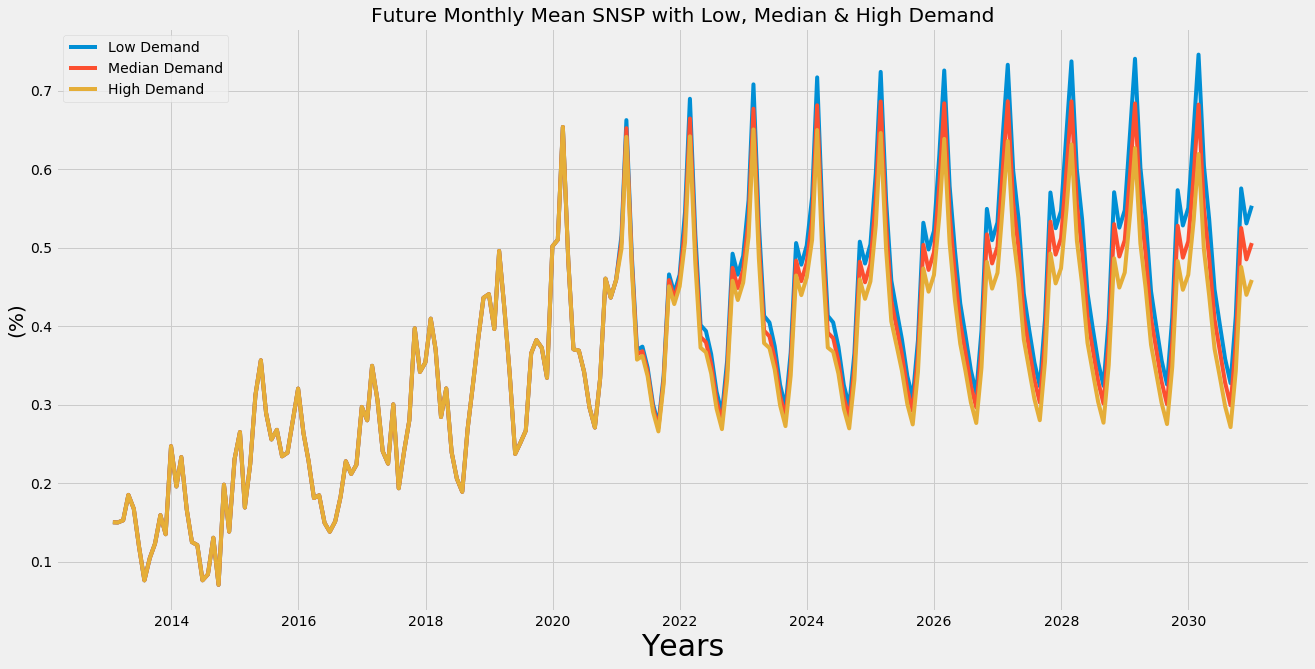

In [36]:
plt.figure(figsize=(20,10))
plt.plot(df_snsp.resample('M').mean())

plt.legend(labels=['Low Demand', 'Median Demand','High Demand'])
plt.title('Future Monthly Mean SNSP with Low, Median & High Demand')
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()

In [37]:
(df_snsp.resample('M').mean()).max()

SNSP Low Forecast       0.746151
SNSP Median Forecast    0.686797
SNSP High Forecast      0.653952
dtype: float64

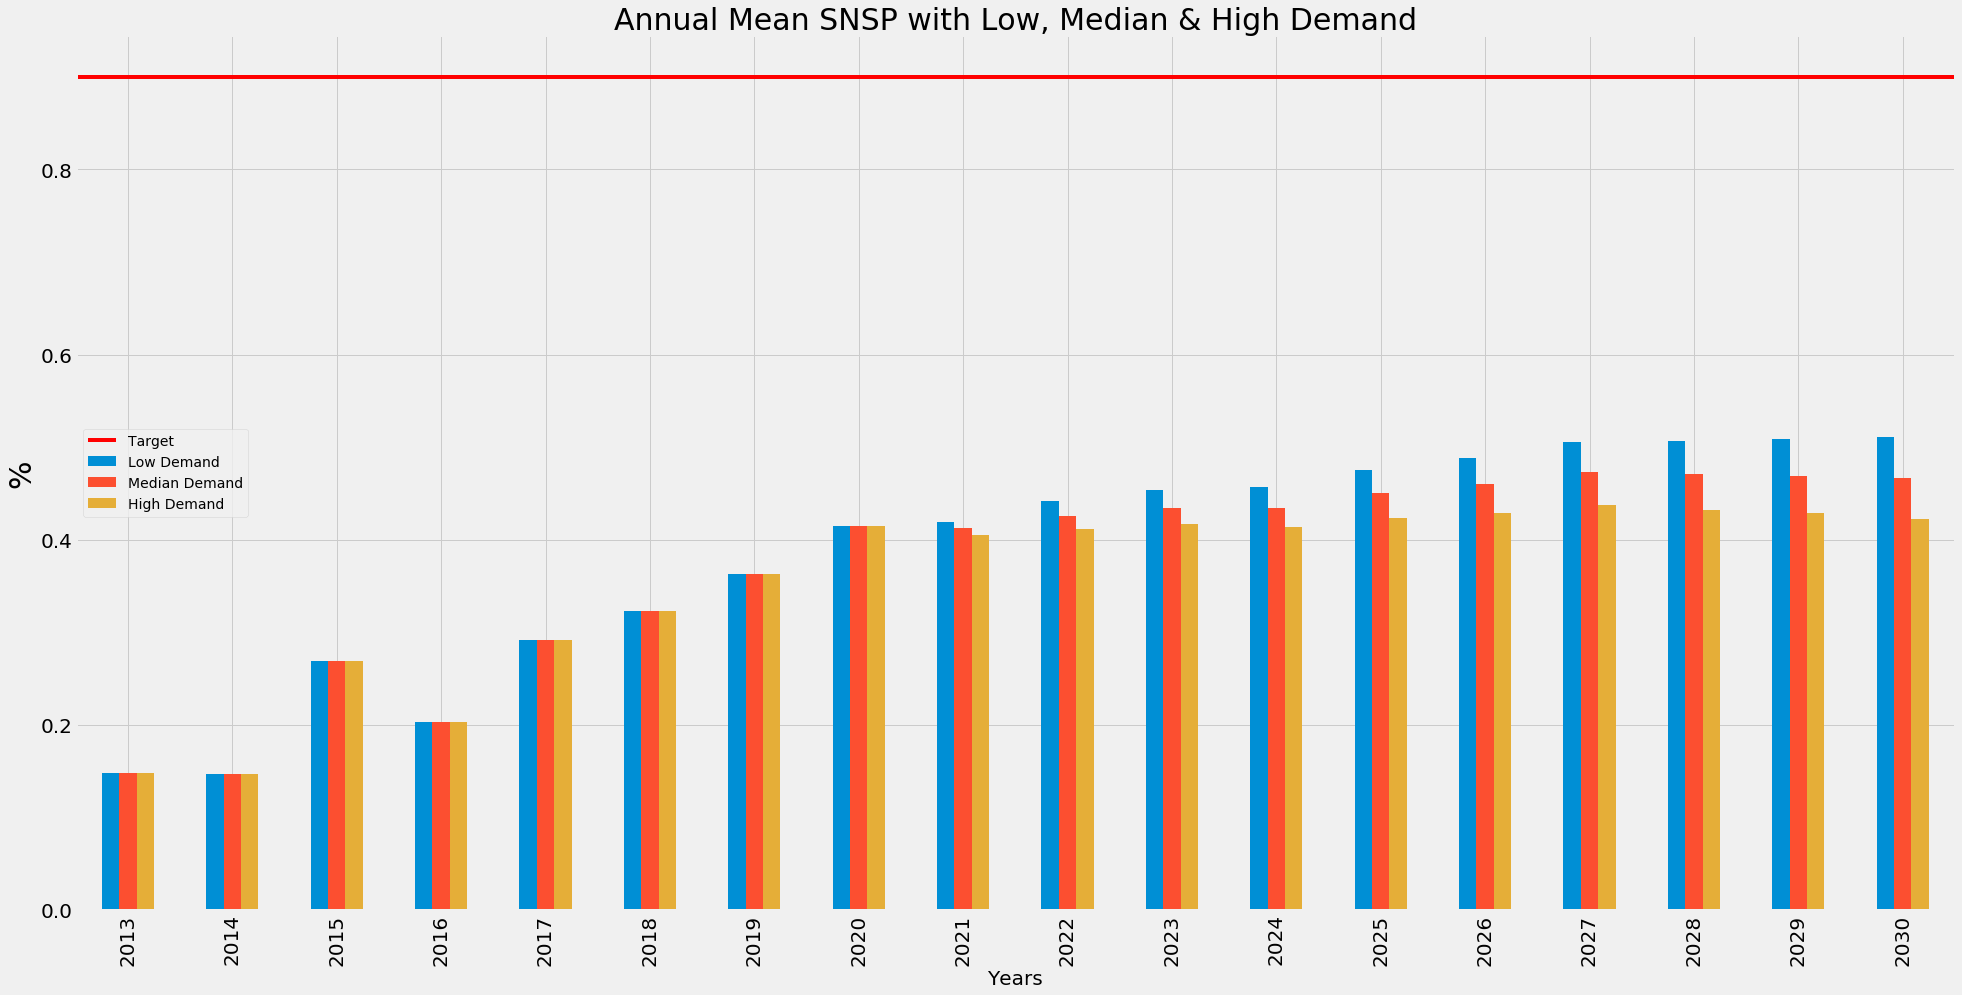

In [38]:
(df_snsp.groupby(df_snsp.index.year).mean()).plot(kind="bar", figsize=(30,15))
plt.title('Annual Mean SNSP with Low, Median & High Demand', size =30)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('%',size=30)
plt.yticks(size=20);
plt.legend(labels=['Target','Low Demand', 'Median Demand','High Demand'])

In [39]:
(df_snsp.groupby(df_snsp.index.year).mean()).max()

SNSP Low Forecast       0.510646
SNSP Median Forecast    0.472789
SNSP High Forecast      0.437176
dtype: float64

# SNSP Analysis

In [40]:
df_analysis = pd.DataFrame()
df_analysis['wind'] = df1['wind'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()
df_analysis['low demand'] = df1['low demand'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()
df_analysis['median demand'] = df1['median demand'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()
df_analysis['high demand'] = df1['high demand'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()
df_analysis['imports'] = df1['imports'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()
df_analysis['exports'] = df1['exports'].loc[df1.index >= dt.datetime(2030,1,1)].tolist()

Low Offshore       18.591632
Median Offshore    22.666619
High Offshore      27.534145
dtype: float64


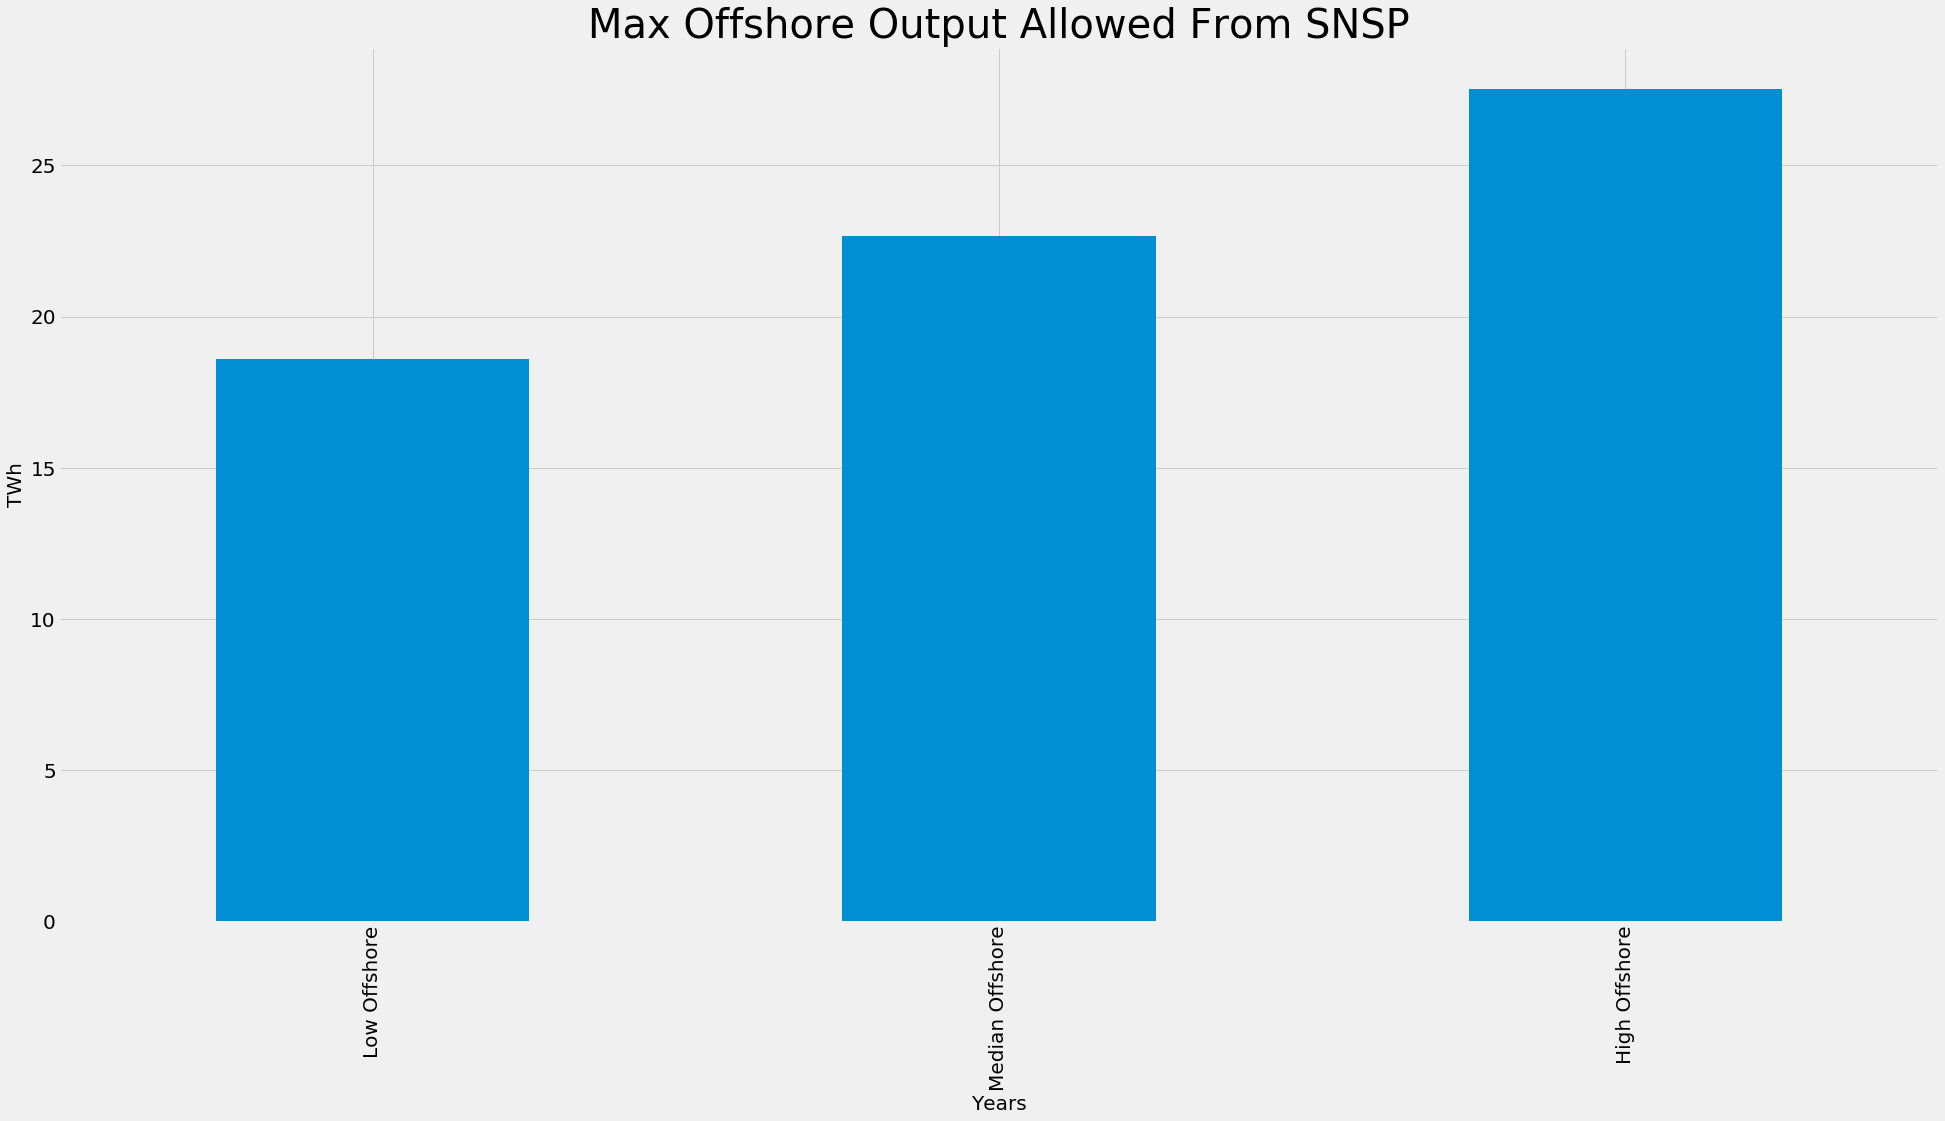

In [41]:
low_off = (0.9*(( df_analysis['low demand']+df_analysis['exports']))) - (df_analysis['wind']+df_analysis['imports'])
med_off = (0.9*(( df_analysis['median demand']+df_analysis['exports']))) - (df_analysis['wind']+df_analysis['imports'])
high_off = (0.9*(( df_analysis['high demand']+df_analysis['exports']))) - (df_analysis['wind']+df_analysis['imports'])

df_new_off = pd.DataFrame() 
df_new_off['Low Offshore'] = low_off
df_new_off['Median Offshore'] = med_off
df_new_off['High Offshore'] = high_off

print(df_new_off.sum()/(1000000))

(df_new_off.sum()/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Max Offshore Output Allowed From SNSP', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);
#plt.legend(labels=['Low SNSP', 'Median SNSP','High SNSP'])

In [42]:
# Hub Height for Avera M5000 is 90 m 
dfws1 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\dundalk_predicted_output_5000.csv', index_col=0)
dfws2 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\swords_predicted_output_5000.csv', index_col=0)
dfws3 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\wicklow_predicted_output_5000.csv', index_col=0)
dfws4 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\arklow_predicted_output_5000.csv', index_col=0)
dfws5 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\kilmuckridge_predicted_output_5000.csv', index_col=0)
dfws6 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\rosslare1_predicted_output_5000.csv', index_col=0)
dfws7 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\rosslare2_predicted_output_5000.csv', index_col=0)
dfws8 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\dunmore_predicted_output_5000.csv', index_col=0)

# #Uncomment below to access wind speeds from file
# dfws1 = pd.read_csv('dundalk_predicted_output_5000.csv', index_col=0)
# dfws2 = pd.read_csv('swords_predicted_output_5000.csv', index_col=0)
# dfws3 = pd.read_csv('wicklow_predicted_output_5000.csv', index_col=0)
# dfws4 = pd.read_csv('arklow_predicted_output_5000.csv', index_col=0)
# dfws5 = pd.read_csv('kilmuckridge_predicted_output_5000.csv', index_col=0)
# dfws6 = pd.read_csv('rosslare1_predicted_output_5000.csv', index_col=0)
# dfws7 = pd.read_csv('rosslare2_predicted_output_5000.csv', index_col=0)
# dfws8 = pd.read_csv('dunmore_predicted_output_5000.csv', index_col=0)

k=2

total_output =  dfws1[dfws1.columns[k]] + dfws2[dfws2.columns[k]]+ dfws3[dfws3.columns[k]] + dfws4[dfws4.columns[k]]+ dfws5[dfws5.columns[k]]+ dfws6[dfws6.columns[k]]+ dfws7[dfws7.columns[k]] + dfws8[dfws8.columns[k]]
total_output = total_output.reset_index()
total_output.iloc[1416:1440] = np.nan 
total_output = total_output.dropna()
total_output.columns = ['Date','Offshore Output']
total_output['Date'] = pd.to_datetime(total_output['Date'], format='%Y/%m/%d')
total_output = total_output.set_index('Date')

In [43]:
print('The mean output is %s' %total_output.mean())
print('The max output is %s' %total_output.max())
print('The total annual output is %s' %(total_output.sum()/1000000))


The mean output is Offshore Output    3033.442794
dtype: float64
The max output is Offshore Output    9207.585986
dtype: float64
The total annual output is Offshore Output    26.572959
dtype: float64


# Dispatch Down

In [44]:
dispatchlist = [9.4,13.4,11.4,11.8,13.9,17.5,9.8,11.9,9,13.6,13.3,9.7]

for i in range(0,8760):
    
    if i <744:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[0]/100))
        
    if i >=744 and i<1416:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[1]/100))
        
    if i >=1416 and i<2160:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[2]/100))
        
    if i >=2160 and i<2880:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[3]/100))
        
    if i >=2880 and i<3624:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[4]/100))
        
    if i >=3624 and i<4344:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[5]/100))
        
    if i >=4344 and i<5088:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[6]/100))
        
    if i >=5088 and i<5832:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[7]/100))
        
    if i >=5832 and i<6552:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[8]/100))
        
    if i >=6552 and i<7296:  
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[9]/100))
        
    if i >=7296 and i<8016:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[10]/100))
        
    
    if i >=8016:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[11]/100))
        
        


In [45]:
print('The updated mean output is %s' %total_output.mean())
print('The updated max output is %s' %total_output.max())
print('The updated total annual output is %s' %(total_output.sum()/1000000))


The updated mean output is Offshore Output    2677.614437
dtype: float64
The updated max output is Offshore Output    8195.999279
dtype: float64
The updated total annual output is Offshore Output    23.455902
dtype: float64


In [46]:
print('Offshore Wind Output needs to be reduced by (for Low, Median, and High Demand)')

print((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) )
print((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) )
print((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) )

print('\n')


print('Offshore Wind Turbines needed (for Low, Median, and High Demand) are:')

lowaveralist = []
medaveralist = []
highaveralist = []

if (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)
    
    lowaveralist.append(x1)
    lowaveralist.append(x2)
    lowaveralist.append(x3)
    lowaveralist.append(x4)
    lowaveralist.append(x5)
    lowaveralist.append(x6)
    lowaveralist.append(x7)
    lowaveralist.append(x8)
    
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')
    
else:
    print('Unchanged for Low Demand')
    print('\n')
    
    
if (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)

    medaveralist.append(x1)
    medaveralist.append(x2)
    medaveralist.append(x3)
    medaveralist.append(x4)
    medaveralist.append(x5)
    medaveralist.append(x6)
    medaveralist.append(x7)
    medaveralist.append(x8)
    
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')
else:
    print('Unchanged for Median Demand') 
    print('\n')
    
if (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)
    
    highaveralist.append(x1)
    highaveralist.append(x2)
    highaveralist.append(x3)
    highaveralist.append(x4)
    highaveralist.append(x5)
    highaveralist.append(x6)
    highaveralist.append(x7)
    highaveralist.append(x8)
    
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')

else:
    print('Unchanged for High Demand. 1737 Turbines needed') 
    print('\n')


Offshore Wind Output needs to be reduced by (for Low, Median, and High Demand)
0.7926206007470027
0.966350319927828
1.1738685090104812


Offshore Wind Turbines needed (for Low, Median, and High Demand) are:
171
223
173
232
266
142
90
80


209
272
211
283
324
173
110
98


Unchanged for High Demand. 1737 Turbines needed




In [47]:
df_analysis['Low Avera M5000-116'] = total_output['Offshore Output'].tolist()
df_analysis['Median Avera M5000-116'] = total_output['Offshore Output'].tolist()
df_analysis['High Avera M5000-116'] = total_output['Offshore Output'].tolist()


if (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['Low Avera M5000-116'] = df_analysis['Low Avera M5000-116'] * ( (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()))

if (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['Median Avera M5000-116'] = df_analysis['Median Avera M5000-116'] * ( (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()))

  
    
if (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['High Avera M5000-116'] = df_analysis['High Avera M5000-116'] * ( (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()))
                                                                                                     

In [48]:
# Hub Height for Vestas V164 8000
dfws1 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\dundalk_predicted_output_8000.csv', index_col=0)
dfws2 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\swords_predicted_output_8000.csv', index_col=0)
dfws3 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\wicklow_predicted_output_8000.csv', index_col=0)
dfws4 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\arklow_predicted_output_8000.csv', index_col=0)
dfws5 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\kilmuckridge_predicted_output_8000.csv', index_col=0)
dfws6 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\rosslare1_predicted_output_8000.csv', index_col=0)
dfws7 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\rosslare2_predicted_output_8000.csv', index_col=0)
dfws8 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\dunmore_predicted_output_8000.csv', index_col=0)

# #Uncomment below to access wind speeds from file
# dfws1 = pd.read_csv('dundalk_predicted_output_8000.csv', index_col=0)
# dfws2 = pd.read_csv('swords_predicted_output_8000.csv', index_col=0)
# dfws3 = pd.read_csv('wicklow_predicted_output_8000.csv', index_col=0)
# dfws4 = pd.read_csv('arklow_predicted_output_8000.csv', index_col=0)
# dfws5 = pd.read_csv('kilmuckridge_predicted_output_8000.csv', index_col=0)
# dfws6 = pd.read_csv('rosslare1_predicted_output_8000.csv', index_col=0)
# dfws7 = pd.read_csv('rosslare2_predicted_output_8000.csv', index_col=0)
# dfws8 = pd.read_csv('dunmore_predicted_output_8000.csv', index_col=0)

k=2

total_output =  dfws1[dfws1.columns[k]] + dfws2[dfws2.columns[k]]+ dfws3[dfws3.columns[k]] + dfws4[dfws4.columns[k]]+ dfws5[dfws5.columns[k]]+ dfws6[dfws6.columns[k]]+ dfws7[dfws7.columns[k]] + dfws8[dfws8.columns[k]]
total_output = total_output.reset_index()
total_output.iloc[1416:1440] = np.nan 
total_output = total_output.dropna()
total_output.columns = ['Date','Offshore Output']
total_output['Date'] = pd.to_datetime(total_output['Date'], format='%Y/%m/%d')
total_output = total_output.set_index('Date')

In [49]:
print('The mean output is %s' %total_output.mean())
print('The max output is %s' %total_output.max())
print('The total annual output is %s' %(total_output.sum()/1000000))


The mean output is Offshore Output    5540.948945
dtype: float64
The max output is Offshore Output    13889.99952
dtype: float64
The total annual output is Offshore Output    48.538713
dtype: float64


# Dispatch Down

In [50]:
dispatchlist = [9.4,13.4,11.4,11.8,13.9,17.5,9.8,11.9,9,13.6,13.3,9.7]

for i in range(0,8760):
    
    if i <744:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[0]/100))
        
    if i >=744 and i<1416:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[1]/100))
        
    if i >=1416 and i<2160:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[2]/100))
        
    if i >=2160 and i<2880:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[3]/100))
        
    if i >=2880 and i<3624:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[4]/100))
        
    if i >=3624 and i<4344:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[5]/100))
        
    if i >=4344 and i<5088:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[6]/100))
        
    if i >=5088 and i<5832:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[7]/100))
        
    if i >=5832 and i<6552:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[8]/100))
        
    if i >=6552 and i<7296:  
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[9]/100))
        
    if i >=7296 and i<8016:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[10]/100))
        
    
    if i >=8016:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[11]/100))
        
        


In [51]:
print('The updated mean output is %s' %total_output.mean())
print('The updated max output is %s' %total_output.max())
print('The updated total annual output is %s' %(total_output.sum()/1000000))


The updated mean output is Offshore Output    4890.797488
dtype: float64
The updated max output is Offshore Output    12548.836859
dtype: float64
The updated total annual output is Offshore Output    42.843386
dtype: float64


In [52]:
print('Offshore Wind Output needs to be reduced by (for Low, Median, and High Demand)')

print((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) )
print((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) )
print((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) )

print('\n')


print('Offshore Wind Turbines needed (for Low, Median, and High Demand) are:')

low8000list = []
med8000list = []
high8000list = []

if (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)
    
    low8000list.append(x1)
    low8000list.append(x2)
    low8000list.append(x3)
    low8000list.append(x4)
    low8000list.append(x5)
    low8000list.append(x6)
    low8000list.append(x7)
    low8000list.append(x8)
    
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')
    
else:
    print('Unchanged for Low Demand')
    print('\n')
    
    
if (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)

    med8000list.append(x1)
    med8000list.append(x2)
    med8000list.append(x3)
    med8000list.append(x4)
    med8000list.append(x5)
    med8000list.append(x6)
    med8000list.append(x7)
    med8000list.append(x8)
    
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')
else:
    print('Unchanged for Median Demand') 
    print('\n')
    
if (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)
    
    high8000list.append(x1)
    high8000list.append(x2)
    high8000list.append(x3)
    high8000list.append(x4)
    high8000list.append(x5)
    high8000list.append(x6)
    high8000list.append(x7)
    high8000list.append(x8)
    
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')

else:
    print('Unchanged for High Demand. 1737 Turbines needed') 
    print('\n')


Offshore Wind Output needs to be reduced by (for Low, Median, and High Demand)
0.4339440282289537
0.5290575971840908
0.6426696819777937


Offshore Wind Turbines needed (for Low, Median, and High Demand) are:
94
122
95
127
145
78
49
44


114
149
115
155
177
95
60
53


139
181
140
188
215
115
73
65




In [53]:
df_analysis['Low MHI Vestas V164 8000'] = total_output['Offshore Output'].tolist()
df_analysis['Median MHI Vestas V164 8000'] = total_output['Offshore Output'].tolist()
df_analysis['High MHI Vestas V164 8000'] = total_output['Offshore Output'].tolist()


if (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['Low MHI Vestas V164 8000'] = df_analysis['Low MHI Vestas V164 8000'] * ( (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()))
                                                                   
if (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['Median MHI Vestas V164 8000'] = df_analysis['Median MHI Vestas V164 8000'] * ( (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()))
                                                                   
if (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['High MHI Vestas V164 8000'] = df_analysis['High MHI Vestas V164 8000'] * ( (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()))
                                                                   


In [54]:
# Hub Height for Vestas V164 9500
dfws1 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\dundalk_predicted_output_9500.csv', index_col=0)
dfws2 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\swords_predicted_output_9500.csv', index_col=0)
dfws3 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\wicklow_predicted_output_9500.csv', index_col=0)
dfws4 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\arklow_predicted_output_9500.csv', index_col=0)
dfws5 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\kilmuckridge_predicted_output_9500.csv', index_col=0)
dfws6 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\rosslare1_predicted_output_9500.csv', index_col=0)
dfws7 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\rosslare2_predicted_output_9500.csv', index_col=0)
dfws8 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\dunmore_predicted_output_9500.csv', index_col=0)

# #Uncomment below to access wind speeds from file
# dfws1 = pd.read_csv('dundalk_predicted_output_9500.csv', index_col=0)
# dfws2 = pd.read_csv('swords_predicted_output_9500.csv', index_col=0)
# dfws3 = pd.read_csv('wicklow_predicted_output_9500.csv', index_col=0)
# dfws4 = pd.read_csv('arklow_predicted_output_9500.csv', index_col=0)
# dfws5 = pd.read_csv('kilmuckridge_predicted_output_9500.csv', index_col=0)
# dfws6 = pd.read_csv('rosslare1_predicted_output_9500.csv', index_col=0)
# dfws7 = pd.read_csv('rosslare2_predicted_output_9500.csv', index_col=0)
# dfws8 = pd.read_csv('dunmore_predicted_output_9500.csv', index_col=0)

k=2

total_output =  dfws1[dfws1.columns[k]] + dfws2[dfws2.columns[k]]+ dfws3[dfws3.columns[k]] + dfws4[dfws4.columns[k]]+ dfws5[dfws5.columns[k]]+ dfws6[dfws6.columns[k]]+ dfws7[dfws7.columns[k]] + dfws8[dfws8.columns[k]]
total_output = total_output.reset_index()
total_output.iloc[1416:1440] = np.nan 
total_output = total_output.dropna()
total_output.columns = ['Date','Offshore Output']
total_output['Date'] = pd.to_datetime(total_output['Date'], format='%Y/%m/%d')
total_output = total_output.set_index('Date')

In [55]:
print('The mean output is %s' %total_output.mean())
print('The max output is %s' %total_output.max())
print('The total annual output is %s' %(total_output.sum()/1000000))


The mean output is Offshore Output    6499.550784
dtype: float64
The max output is Offshore Output    16364.157426
dtype: float64
The total annual output is Offshore Output    56.936065
dtype: float64


# Dispatch Down

In [56]:
dispatchlist = [9.4,13.4,11.4,11.8,13.9,17.5,9.8,11.9,9,13.6,13.3,9.7]

for i in range(0,8760):
    
    if i <744:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[0]/100))
        
    if i >=744 and i<1416:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[1]/100))
        
    if i >=1416 and i<2160:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[2]/100))
        
    if i >=2160 and i<2880:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[3]/100))
        
    if i >=2880 and i<3624:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[4]/100))
        
    if i >=3624 and i<4344:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[5]/100))
        
    if i >=4344 and i<5088:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[6]/100))
        
    if i >=5088 and i<5832:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[7]/100))
        
    if i >=5832 and i<6552:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[8]/100))
        
    if i >=6552 and i<7296:  
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[9]/100))
        
    if i >=7296 and i<8016:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[10]/100))
        
    
    if i >=8016:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[11]/100))
        
        


In [57]:
print('The updated mean output is %s' %total_output.mean())
print('The updated max output is %s' %total_output.max())
print('The updated total annual output is %s' %(total_output.sum()/1000000))


The updated mean output is Offshore Output    5734.495951
dtype: float64
The updated max output is Offshore Output    14621.271111
dtype: float64
The updated total annual output is Offshore Output    50.234185
dtype: float64


In [58]:
print('Offshore Wind Output needs to be reduced by (for Low, Median, and High Demand)')

print((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) )
print((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) )
print((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) )

print('\n')


print('Offshore Wind Turbines needed (for Low, Median, and High Demand) are:')

low9500list = []
med9500list = []
high9500list = []

if (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)
    
    low9500list.append(x1)
    low9500list.append(x2)
    low9500list.append(x3)
    low9500list.append(x4)
    low9500list.append(x5)
    low9500list.append(x6)
    low9500list.append(x7)
    low9500list.append(x8)
    
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')
    
else:
    print('Unchanged for Low Demand')
    print('\n')
    
    
if (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)

    med9500list.append(x1)
    med9500list.append(x2)
    med9500list.append(x3)
    med9500list.append(x4)
    med9500list.append(x5)
    med9500list.append(x6)
    med9500list.append(x7)
    med9500list.append(x8)
    
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')
else:
    print('Unchanged for Median Demand') 
    print('\n')
    
if (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)
    
    high9500list.append(x1)
    high9500list.append(x2)
    high9500list.append(x3)
    high9500list.append(x4)
    high9500list.append(x5)
    high9500list.append(x6)
    high9500list.append(x7)
    high9500list.append(x8)
    
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')

else:
    print('Unchanged for High Demand. 1737 Turbines needed') 
    print('\n')


Offshore Wind Output needs to be reduced by (for Low, Median, and High Demand)
0.3700991999014627
0.4512190067893137
0.5481157007083316


Offshore Wind Turbines needed (for Low, Median, and High Demand) are:
80
104
81
108
124
66
42
37


97
127
98
132
151
81
51
46


118
154
119
161
184
98
62
55




In [59]:
df_analysis['Low MHI Vestas V164 9500'] = total_output['Offshore Output'].tolist()
df_analysis['Median MHI Vestas V164 9500'] = total_output['Offshore Output'].tolist()
df_analysis['High MHI Vestas V164 9500'] = total_output['Offshore Output'].tolist()


if (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['Low MHI Vestas V164 9500'] = df_analysis['Low MHI Vestas V164 9500'] * ( (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()))
                                                                   
if (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['Median MHI Vestas V164 9500'] = df_analysis['Median MHI Vestas V164 9500'] * ( (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()))
                                                                   
if (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['High MHI Vestas V164 9500'] = df_analysis['High MHI Vestas V164 9500'] * ( (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()))
                                                                   


In [60]:
# Hub Height for Enercon E126 7580
dfws1 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\dundalk_predicted_output_7580.csv', index_col=0)
dfws2 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\swords_predicted_output_7580.csv', index_col=0)
dfws3 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\wicklow_predicted_output_7580.csv', index_col=0)
dfws4 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\arklow_predicted_output_7580.csv', index_col=0)
dfws5 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\kilmuckridge_predicted_output_7580.csv', index_col=0)
dfws6 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\rosslare1_predicted_output_7580.csv', index_col=0)
dfws7 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\rosslare2_predicted_output_7580.csv', index_col=0)
dfws8 = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_output\dunmore_predicted_output_7580.csv', index_col=0)

# #Uncomment below to access wind speeds from file
# dfws1 = pd.read_csv('dundalk_predicted_output_7580.csv', index_col=0)
# dfws2 = pd.read_csv('swords_predicted_output_7580.csv', index_col=0)
# dfws3 = pd.read_csv('wicklow_predicted_output_7580.csv', index_col=0)
# dfws4 = pd.read_csv('arklow_predicted_output_7580.csv', index_col=0)
# dfws5 = pd.read_csv('kilmuckridge_predicted_output_7580.csv', index_col=0)
# dfws6 = pd.read_csv('rosslare1_predicted_output_7580.csv', index_col=0)
# dfws7 = pd.read_csv('rosslare2_predicted_output_7580.csv', index_col=0)
# dfws8 = pd.read_csv('dunmore_predicted_output_7580.csv', index_col=0)

k=2

total_output =  dfws1[dfws1.columns[k]] + dfws2[dfws2.columns[k]]+ dfws3[dfws3.columns[k]] + dfws4[dfws4.columns[k]]+ dfws5[dfws5.columns[k]]+ dfws6[dfws6.columns[k]]+ dfws7[dfws7.columns[k]] + dfws8[dfws8.columns[k]]
total_output = total_output.reset_index()
total_output.iloc[1416:1440] = np.nan 
total_output = total_output.dropna()
total_output.columns = ['Date','Offshore Output']
total_output['Date'] = pd.to_datetime(total_output['Date'], format='%Y/%m/%d')
total_output = total_output.set_index('Date')


In [61]:
print('The mean output is %s' %total_output.mean())
print('The max output is %s' %total_output.max())
print('The total annual output is %s' %(total_output.sum()/1000000))


The mean output is Offshore Output    4352.184487
dtype: float64
The max output is Offshore Output    12172.75803
dtype: float64
The total annual output is Offshore Output    38.125136
dtype: float64


# Dispatch Down

In [62]:
dispatchlist = [9.4,13.4,11.4,11.8,13.9,17.5,9.8,11.9,9,13.6,13.3,9.7]

for i in range(0,8760):
    
    if i <744:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[0]/100))
        
    if i >=744 and i<1416:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[1]/100))
        
    if i >=1416 and i<2160:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[2]/100))
        
    if i >=2160 and i<2880:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[3]/100))
        
    if i >=2880 and i<3624:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[4]/100))
        
    if i >=3624 and i<4344:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[5]/100))
        
    if i >=4344 and i<5088:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[6]/100))
        
    if i >=5088 and i<5832:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[7]/100))
        
    if i >=5832 and i<6552:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[8]/100))
        
    if i >=6552 and i<7296:  
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[9]/100))
        
    if i >=7296 and i<8016:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[10]/100))
        
    
    if i >=8016:
        
        total_output['Offshore Output'].iloc[i] = total_output['Offshore Output'].iloc[i] * (1-(dispatchlist[11]/100))
        
        


In [63]:
print('The updated mean output is %s' %total_output.mean())
print('The updated max output is %s' %total_output.max())
print('The updated total annual output is %s' %(total_output.sum()/1000000))


The updated mean output is Offshore Output    3840.370009
dtype: float64
The updated max output is Offshore Output    10654.959396
dtype: float64
The updated total annual output is Offshore Output    33.641641
dtype: float64


In [64]:
print('Offshore Wind Output needs to be reduced by (for Low, Median, and High Demand)')

print((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) )
print((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) )
print((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) )

print('\n')


print('Offshore Wind Turbines needed (for Low, Median, and High Demand) are:')

lowenerconlist = []
medenerconlist = []
highenerconlist = []

if (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)
    
    lowenerconlist.append(x1)
    lowenerconlist.append(x2)
    lowenerconlist.append(x3)
    lowenerconlist.append(x4)
    lowenerconlist.append(x5)
    lowenerconlist.append(x6)
    lowenerconlist.append(x7)
    lowenerconlist.append(x8)

    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')
    
else:
    print('Unchanged for Low Demand')
    print('\n')
    
    
if (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)

    medenerconlist.append(x1)
    medenerconlist.append(x2)
    medenerconlist.append(x3)
    medenerconlist.append(x4)
    medenerconlist.append(x5)
    medenerconlist.append(x6)
    medenerconlist.append(x7)
    medenerconlist.append(x8)
    
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')
else:
    print('Unchanged for Median Demand') 
    print('\n')
    
if (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    x1 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *216)
    x2 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *281)
    x3 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *218)
    x4 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *293)
    x5 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *335)
    x6 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *179)
    x7 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *114)
    x8 = round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *101)
    
    highenerconlist.append(x1)
    highenerconlist.append(x2)
    highenerconlist.append(x3)
    highenerconlist.append(x4)
    highenerconlist.append(x5)
    highenerconlist.append(x6)
    highenerconlist.append(x7)
    highenerconlist.append(x8)
    
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *216))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *281))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *218))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *293))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *335))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *179))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *114))
    print( round((df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) *101))
    print('\n')

else:
    print('Unchanged for High Demand. 1737 Turbines needed') 
    print('\n')


Offshore Wind Output needs to be reduced by (for Low, Median, and High Demand)
0.5526374694044861
0.6737667363929538
0.8184542789094581


Offshore Wind Turbines needed (for Low, Median, and High Demand) are:
119
155
120
162
185
99
63
56


146
189
147
197
226
121
77
68


177
230
178
240
274
147
93
83




In [65]:
df_analysis['Low Enercon E126 7580'] = total_output['Offshore Output'].tolist()
df_analysis['Median Enercon E126 7580'] = total_output['Offshore Output'].tolist()
df_analysis['High Enercon E126 7580'] = total_output['Offshore Output'].tolist()


if (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['Low Enercon E126 7580'] = df_analysis['Low Enercon E126 7580'] * ( (df_new_off['Low Offshore'].sum())/(total_output['Offshore Output'].sum()))


if (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['Median Enercon E126 7580'] = df_analysis['Median Enercon E126 7580'] * ( (df_new_off['Median Offshore'].sum())/(total_output['Offshore Output'].sum()))
                                                                   
if (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()) < 1:
    
    df_analysis['High Enercon E126 7580'] = df_analysis['High Enercon E126 7580'] * ( (df_new_off['High Offshore'].sum())/(total_output['Offshore Output'].sum()))
                                                                

In [66]:
df_analysis['Low Enercon E126 7580'] = df_analysis['Low Enercon E126 7580'] * 0.99
df_analysis['Median Enercon E126 7580'] = df_analysis['Median Enercon E126 7580'] * 0.99
df_analysis['High Enercon E126 7580'] = df_analysis['High Enercon E126 7580'] * 0.99

df_analysis['Low Avera M5000-116'] = df_analysis['Low Avera M5000-116'] * 0.99
df_analysis['Median Avera M5000-116'] = df_analysis['Median Avera M5000-116'] * 0.99
df_analysis['High Avera M5000-116'] = df_analysis['High Avera M5000-116'] * 0.99

df_analysis['Low MHI Vestas V164 8000'] = df_analysis['Low MHI Vestas V164 8000'] * 0.99
df_analysis['Median MHI Vestas V164 8000'] = df_analysis['Median MHI Vestas V164 8000'] * 0.99
df_analysis['High MHI Vestas V164 8000'] = df_analysis['High MHI Vestas V164 8000'] * 0.99

df_analysis['Low MHI Vestas V164 9500'] = df_analysis['Low MHI Vestas V164 9500'] * 0.99
df_analysis['Median MHI Vestas V164 9500'] = df_analysis['Median MHI Vestas V164 9500'] * 0.99
df_analysis['High MHI Vestas V164 9500'] = df_analysis['High MHI Vestas V164 9500'] * 0.99

In [67]:
print(df_analysis.mean())
print(df_analysis.sum()/1000000)
print(df_analysis.max())

wind                           2239.311927
low demand                     4846.042744
median demand                  5362.910748
high demand                    5980.303747
imports                         554.729172
exports                         616.594437
Low Avera M5000-116            2101.109040
Median Avera M5000-116         2561.638432
High Avera M5000-116           2650.838292
Low MHI Vestas V164 8000       2101.109040
Median MHI Vestas V164 8000    2561.638432
High MHI Vestas V164 8000      3111.735594
Low MHI Vestas V164 9500       2101.109040
Median MHI Vestas V164 9500    2561.638432
High MHI Vestas V164 9500      3111.735594
Low Enercon E126 7580          2101.109040
Median Enercon E126 7580       2561.638432
High Enercon E126 7580         3111.735594
dtype: float64
wind                           19.616372
low demand                     42.451334
median demand                  46.979098
high demand                    52.387461
imports                         4.859428
export

# Analysis on New Wind Turbine Models

In [68]:
df_analysis['MHI Vestas V164 9500 Total Wind'] = df_analysis['wind'] + df_analysis['Median MHI Vestas V164 9500']
df_analysis['MHI Vestas V164 8000 Total Wind'] = df_analysis['wind'] + df_analysis['Median MHI Vestas V164 8000']
df_analysis['Enercon E126 7580 Total Wind'] = df_analysis['wind'] + df_analysis['Median Enercon E126 7580']
df_analysis['Avera M5000-116 Total Wind'] = df_analysis['wind'] + df_analysis['Median Avera M5000-116']

df_analysis['SNSP Median Avera M5000-116 Forecast'] = (df_analysis['Avera M5000-116 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])
df_analysis['SNSP High Avera M5000-116 Forecast'] = (df_analysis['Avera M5000-116 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

df_analysis['SNSP Median MHI Vestas V164 8000 Forecast'] = (df_analysis['MHI Vestas V164 8000 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])
df_analysis['SNSP High MHI Vestas V164 8000 Forecast'] = (df_analysis['MHI Vestas V164 8000 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

df_analysis['SNSP Median MHI Vestas V164 9500 Forecast'] = (df_analysis['MHI Vestas V164 9500 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])
df_analysis['SNSP High MHI Vestas V164 9500 Forecast'] = (df_analysis['MHI Vestas V164 9500 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])

df_analysis['SNSP Median Enercon E126 7580 Forecast'] = (df_analysis['Enercon E126 7580 Total Wind' ]+df_analysis['imports'])/(df_analysis['median demand' ] +df_analysis['exports'])
df_analysis['SNSP High Enercon E126 7580 Forecast'] = (df_analysis['Enercon E126 7580 Total Wind' ]+df_analysis['imports'])/(df_analysis['high demand' ] +df_analysis['exports'])





# Avera M5000-116

In [69]:
df_overall = pd.DataFrame()
data = pd.date_range('1/1/2030', periods = 8760, freq ='H')
data_list = data.tolist()
df_overall['Date'] = data_list
df_overall = df_overall.set_index('Date')

df_analysis['Avera M5000-116 Total Wind'] = df_analysis['Avera M5000-116 Total Wind']
df_overall['high demand'] = (df_analysis['high demand']).tolist()
df_overall['median demand'] = (df_analysis['median demand']).tolist()
df_overall['Total Wind'] = (df_analysis['Avera M5000-116 Total Wind']).tolist()


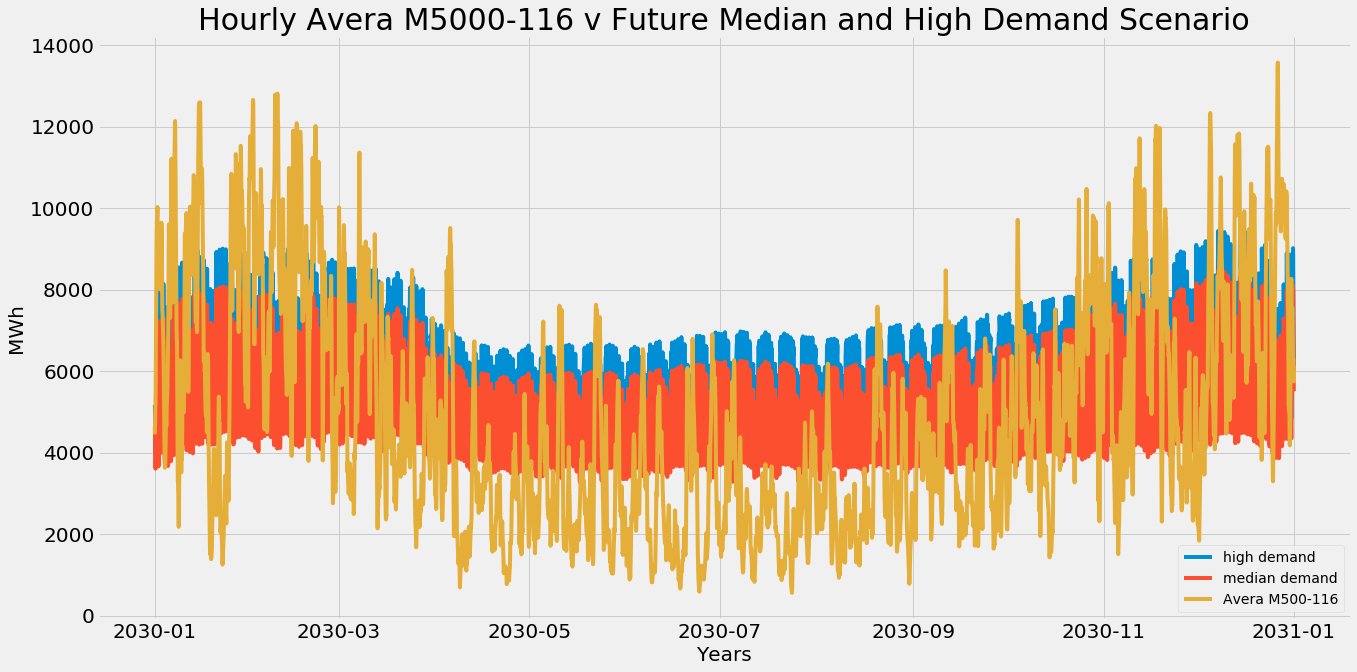

In [70]:
plt.figure(figsize=(20,10))
plt.plot(df_overall)
plt.title('Hourly Avera M5000-116 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','Avera M500-116'])
plt.yticks(size=20);

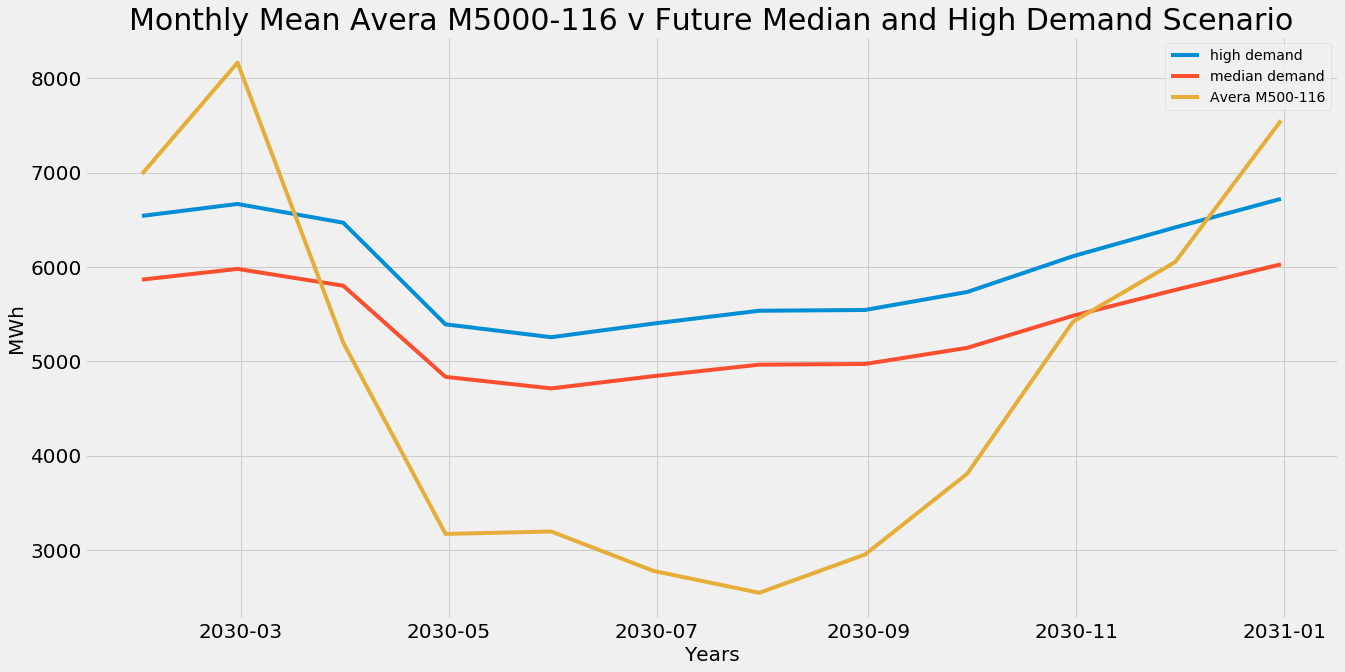

In [71]:
plt.figure(figsize=(20,10))
plt.plot(df_overall.resample('M').mean())
plt.title('Monthly Mean Avera M5000-116 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','Avera M500-116'])
plt.yticks(size=20);

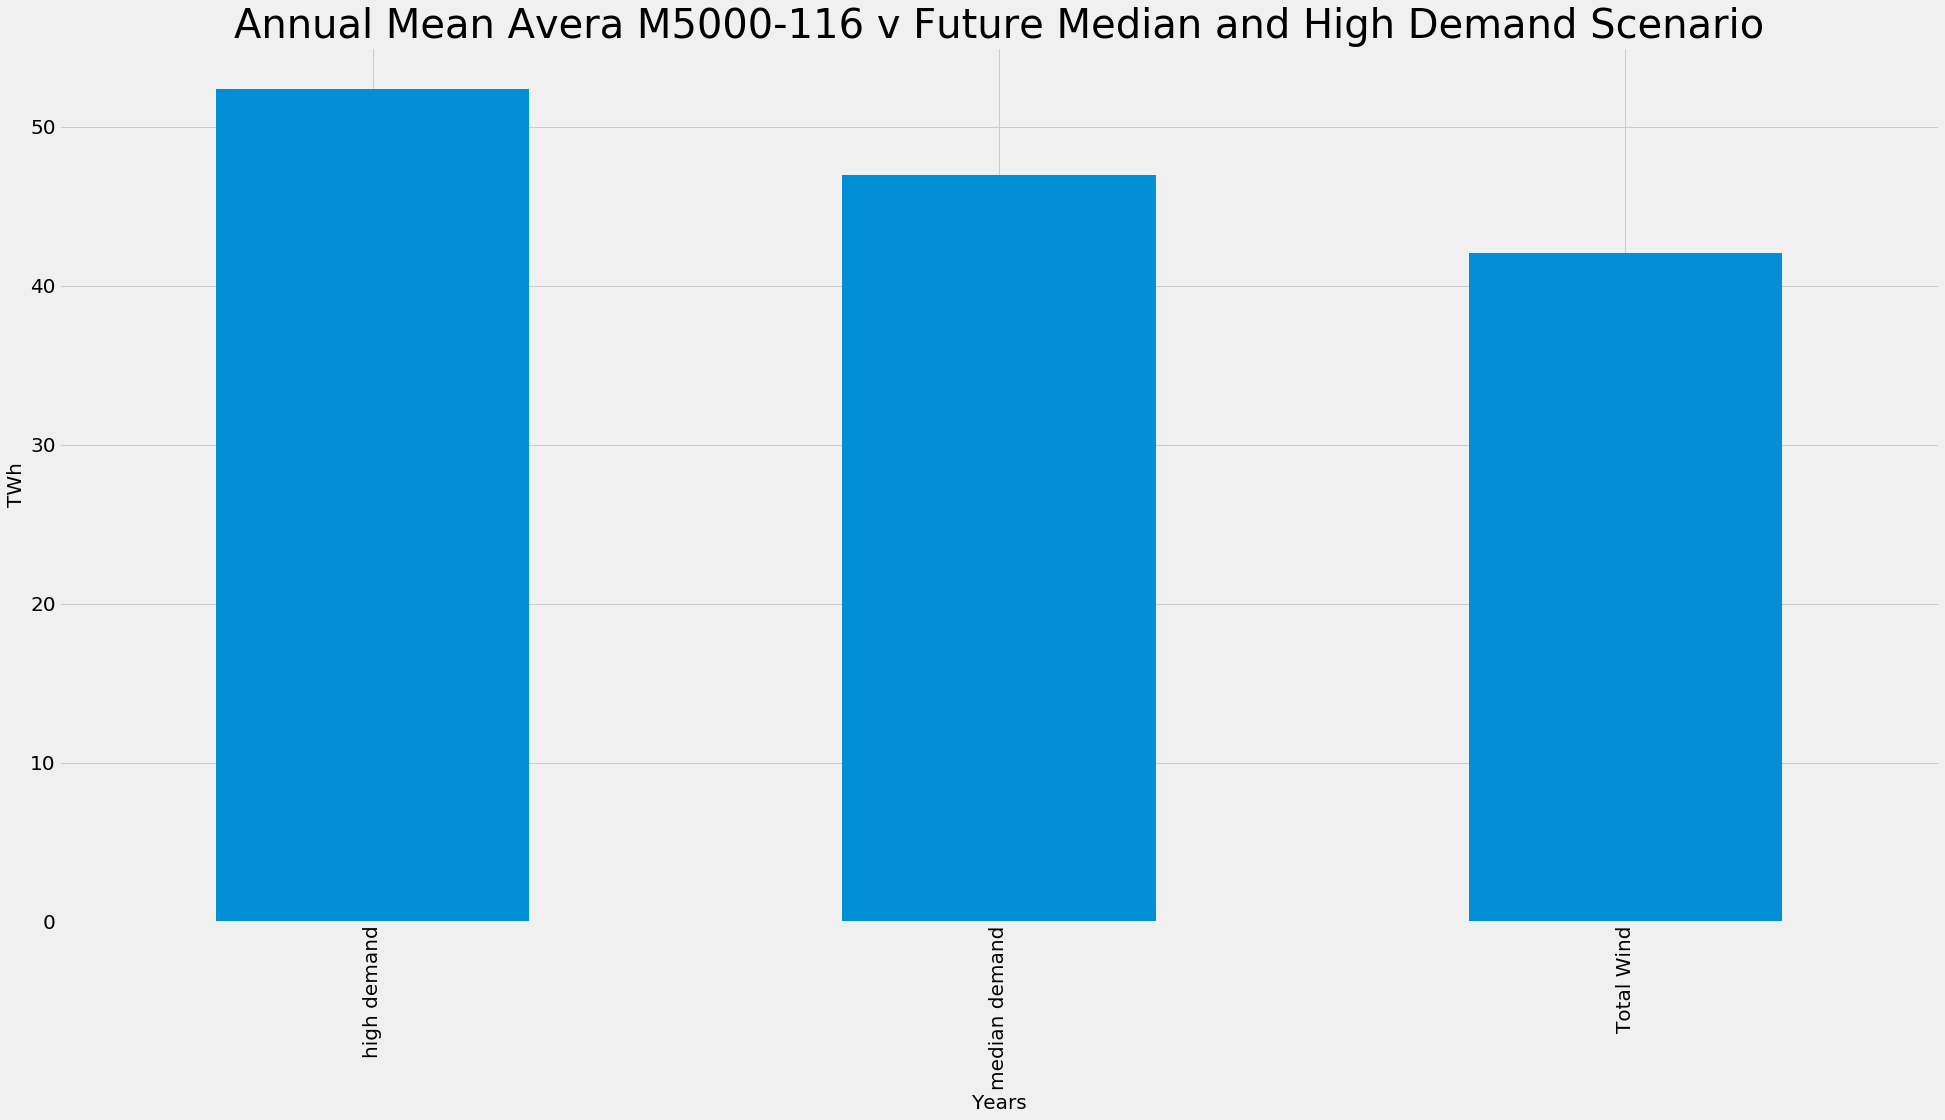

In [72]:
(df_overall.sum()/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean Avera M5000-116 v Future Median and High Demand Scenario', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);

In [73]:
(df_overall.sum()/(1000000))

high demand      52.387461
median demand    46.979098
Total Wind       42.056325
dtype: float64

In [74]:
df_wp = pd.DataFrame(df_overall.index)

df_overall['WP Median Forecast'] = df_overall['Total Wind' ]/df_overall['median demand' ]
df_overall['WP High Forecast'] = df_overall['Total Wind' ]/df_overall['high demand' ]

df_wp['WP Median Forecast'] = df_overall['WP Median Forecast'].tolist()
df_wp['WP High Forecast'] = df_overall['WP High Forecast'].tolist()

df_wp = df_wp.set_index('Date')
df_wp

WP Median Forecast  WP High Forecast
Date                                                     
2030-01-01 00:00:00            0.959418          0.860370
2030-01-01 01:00:00            1.074550          0.963616
2030-01-01 02:00:00            1.241153          1.113020
2030-01-01 03:00:00            1.343924          1.205181
2030-01-01 04:00:00            1.406803          1.261568
...                                 ...               ...
2030-12-31 19:00:00            0.841963          0.755040
2030-12-31 20:00:00            0.857550          0.769019
2030-12-31 21:00:00            0.890724          0.798768
2030-12-31 22:00:00            0.951488          0.853259
2030-12-31 23:00:00            1.095531          0.982431

[8760 rows x 2 columns]

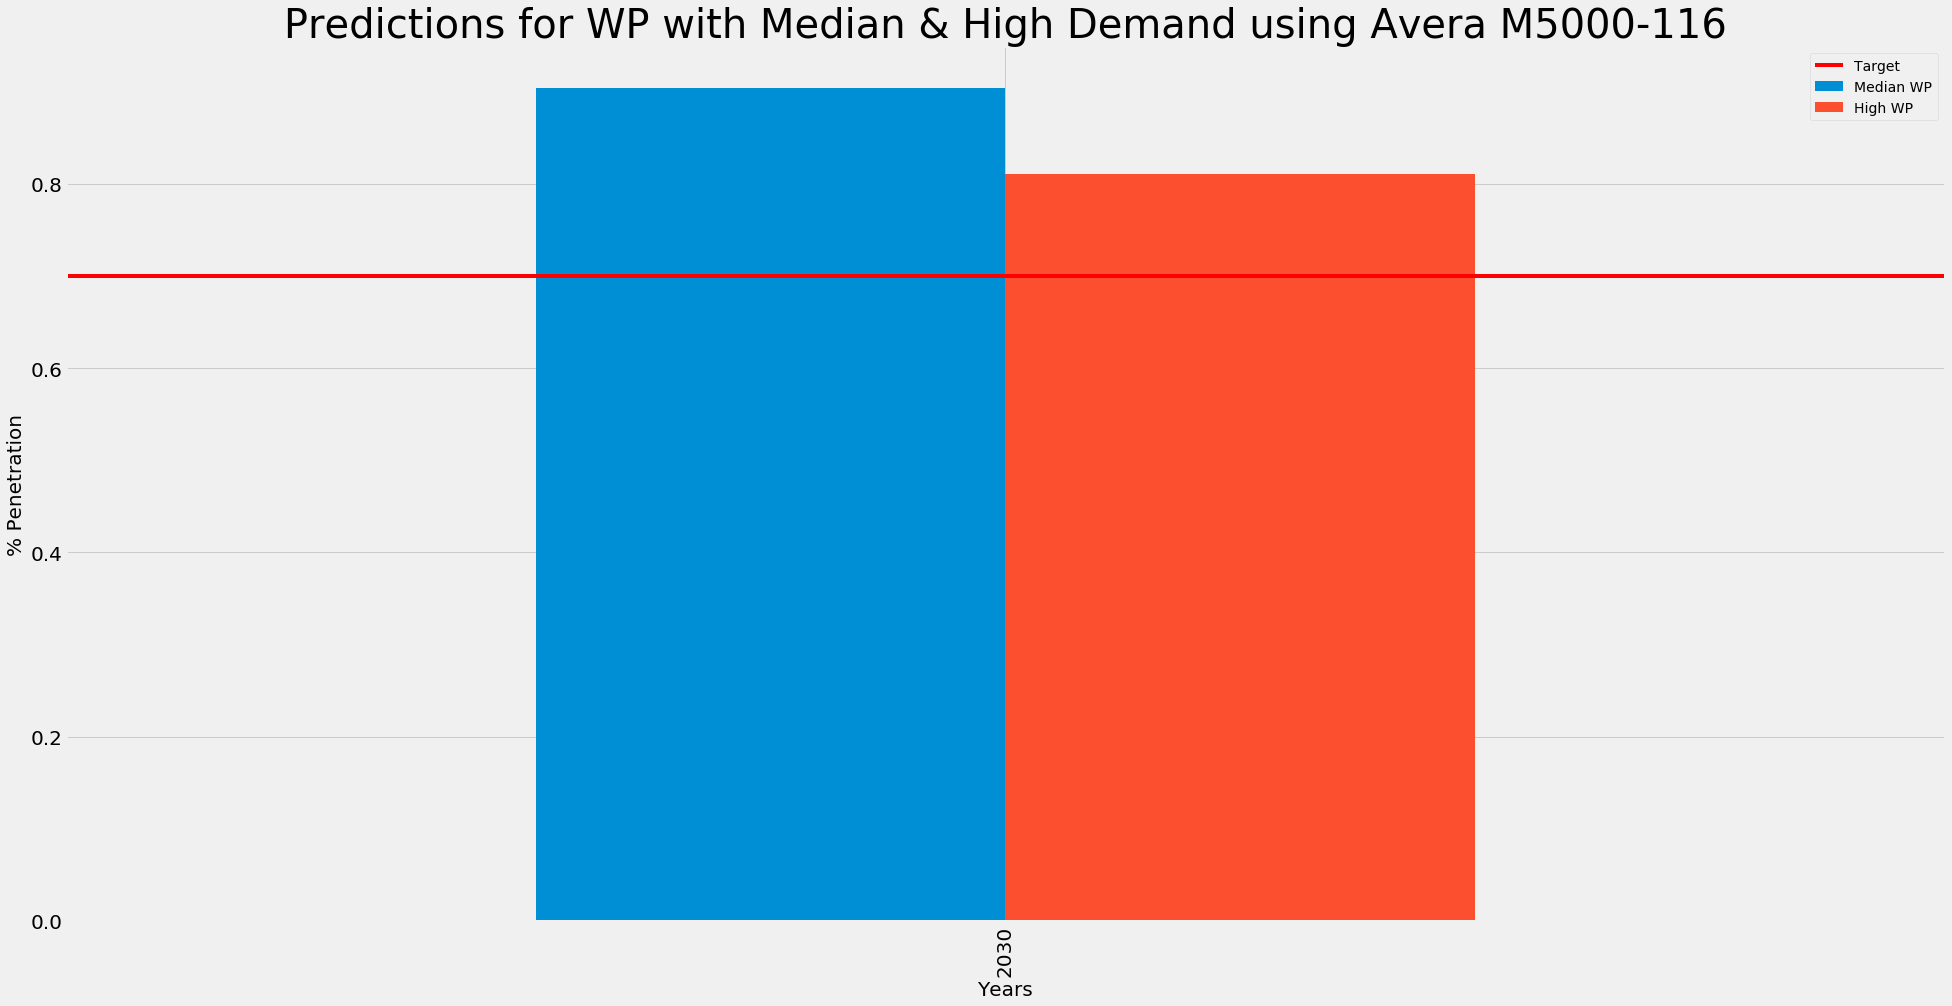

In [75]:
(df_wp.groupby(df_wp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Predictions for WP with Median & High Demand using Avera M5000-116', size =40)
plt.axhline(y=0.7, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('% Penetration',size=20)
plt.yticks(size=20);
plt.legend(labels=['Target','Median WP','High WP'])

In [76]:
df_wp.groupby(df_wp.index.year).mean()

WP Median Forecast  WP High Forecast
Date                                      
2030            0.904147          0.810805

In [77]:
df_snsp = pd.DataFrame(df_overall.index)

df_snsp['SNSP Median Forecast'] = df_analysis['SNSP Median Avera M5000-116 Forecast'].tolist()
df_snsp['SNSP High Forecast'] = df_analysis['SNSP High Avera M5000-116 Forecast'].tolist()

df_snsp = df_snsp.set_index('Date')

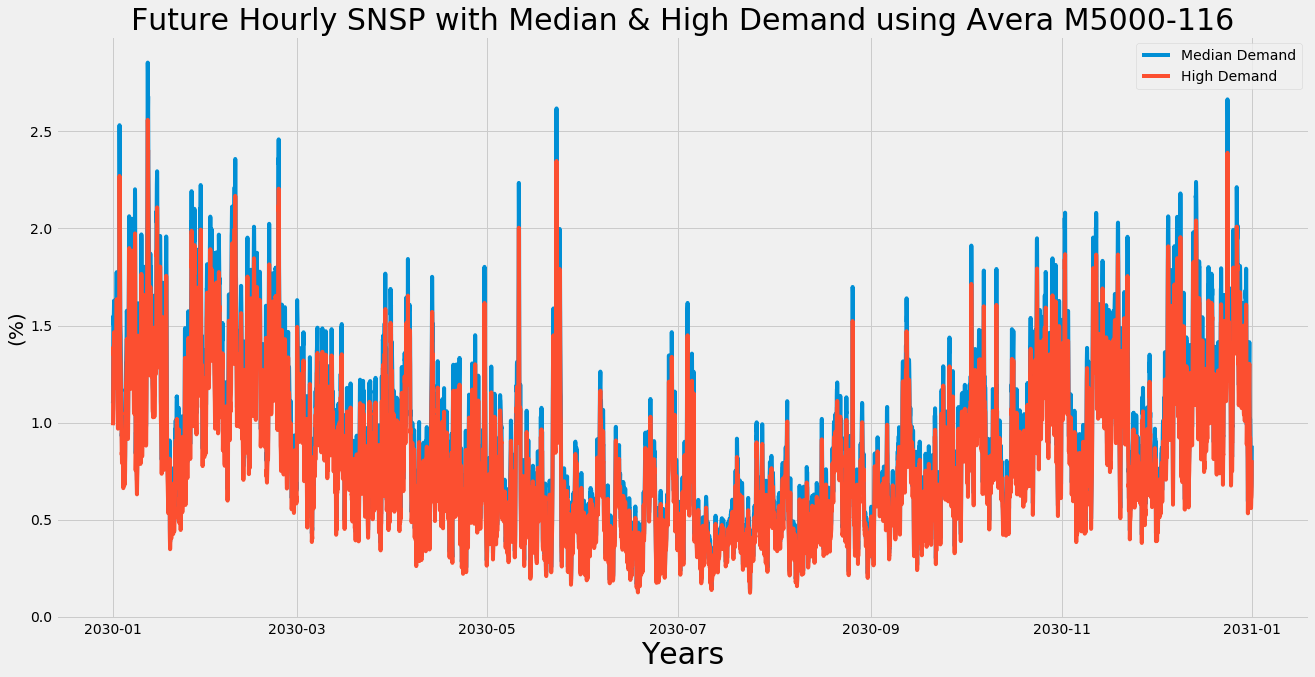

In [78]:
plt.figure(figsize=(20,10))
plt.plot(df_snsp)

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Hourly SNSP with Median & High Demand using Avera M5000-116', size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()

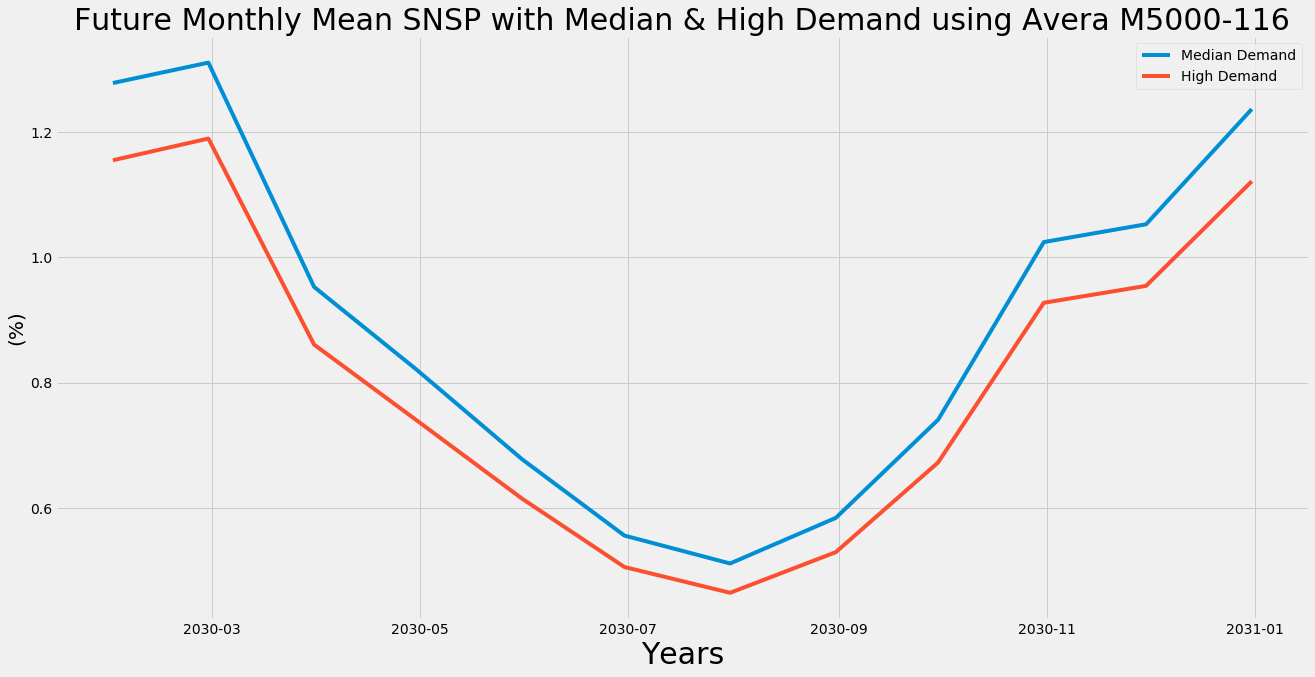

In [79]:
plt.figure(figsize=(20,10))
plt.plot(df_snsp.resample('M').mean())

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Monthly Mean SNSP with Median & High Demand using Avera M5000-116',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()

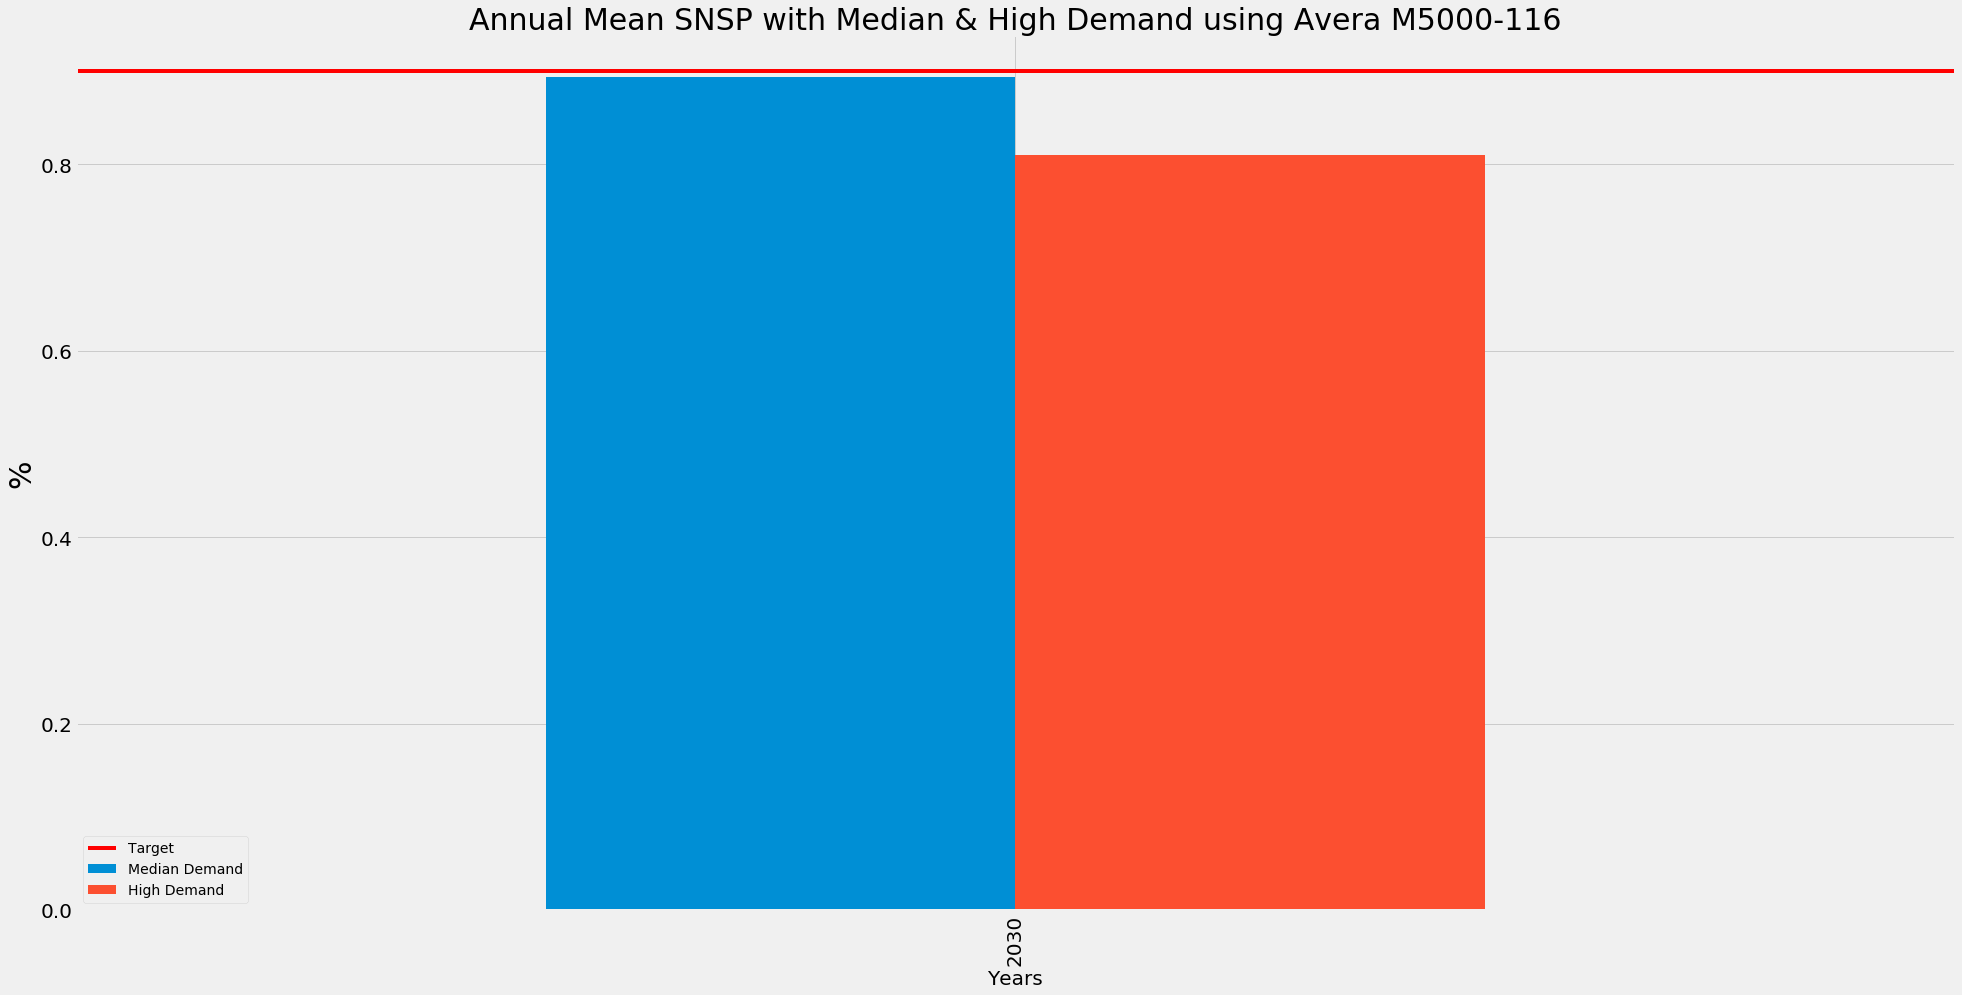

In [80]:
(df_snsp.groupby(df_snsp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean SNSP with Median & High Demand using Avera M5000-116', size =30)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('%',size=30)
plt.yticks(size=20);
plt.legend(labels=['Target', 'Median Demand','High Demand'])

In [81]:
(df_snsp.groupby(df_snsp.index.year).mean())

SNSP Median Forecast  SNSP High Forecast
Date                                          
2030              0.893581             0.80961

# MHI Vestas V164/8000

In [82]:
df_overall = pd.DataFrame()
data = pd.date_range('1/1/2030', periods = 8760, freq ='H')
data_list = data.tolist()
df_overall['Date'] = data_list
df_overall = df_overall.set_index('Date')

df_overall['high demand'] = (df_analysis['high demand']).tolist()
df_overall['median demand'] = (df_analysis['median demand']).tolist()
df_overall['Total Wind'] = (df_analysis['MHI Vestas V164 8000 Total Wind']).tolist()

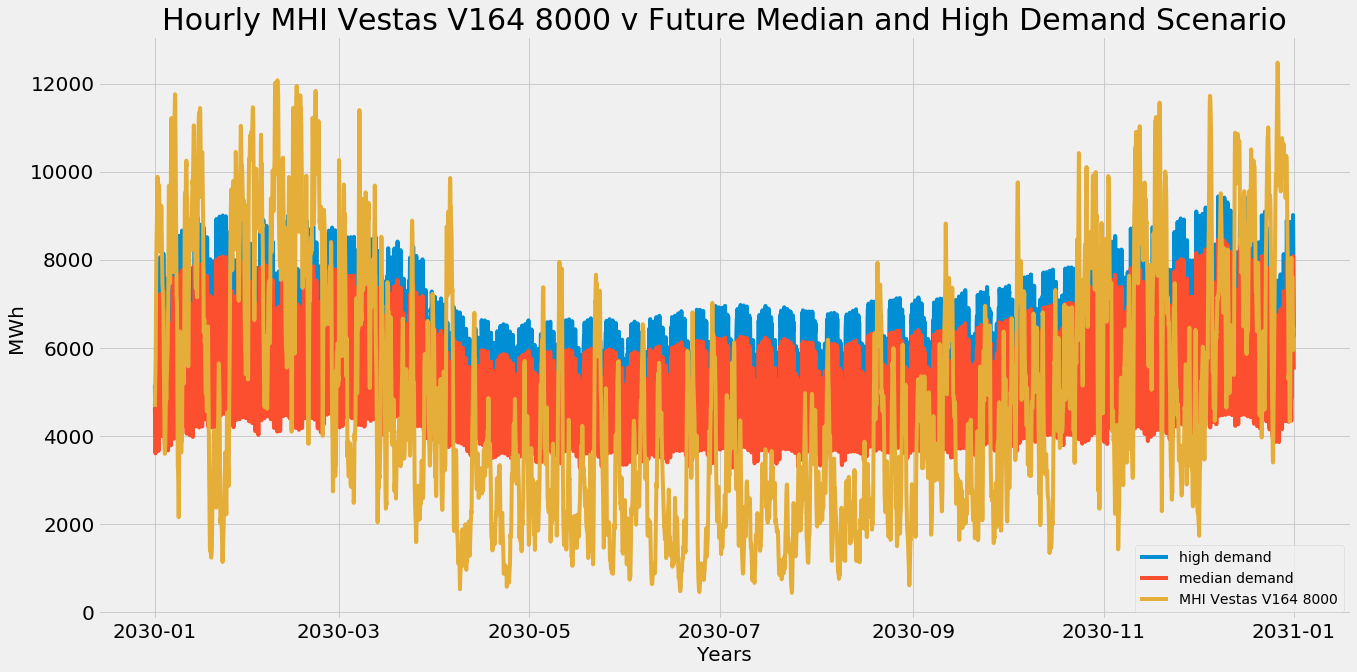

In [83]:
plt.figure(figsize=(20,10))
plt.plot(df_overall)
plt.title('Hourly MHI Vestas V164 8000 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','MHI Vestas V164 8000'])
plt.yticks(size=20);

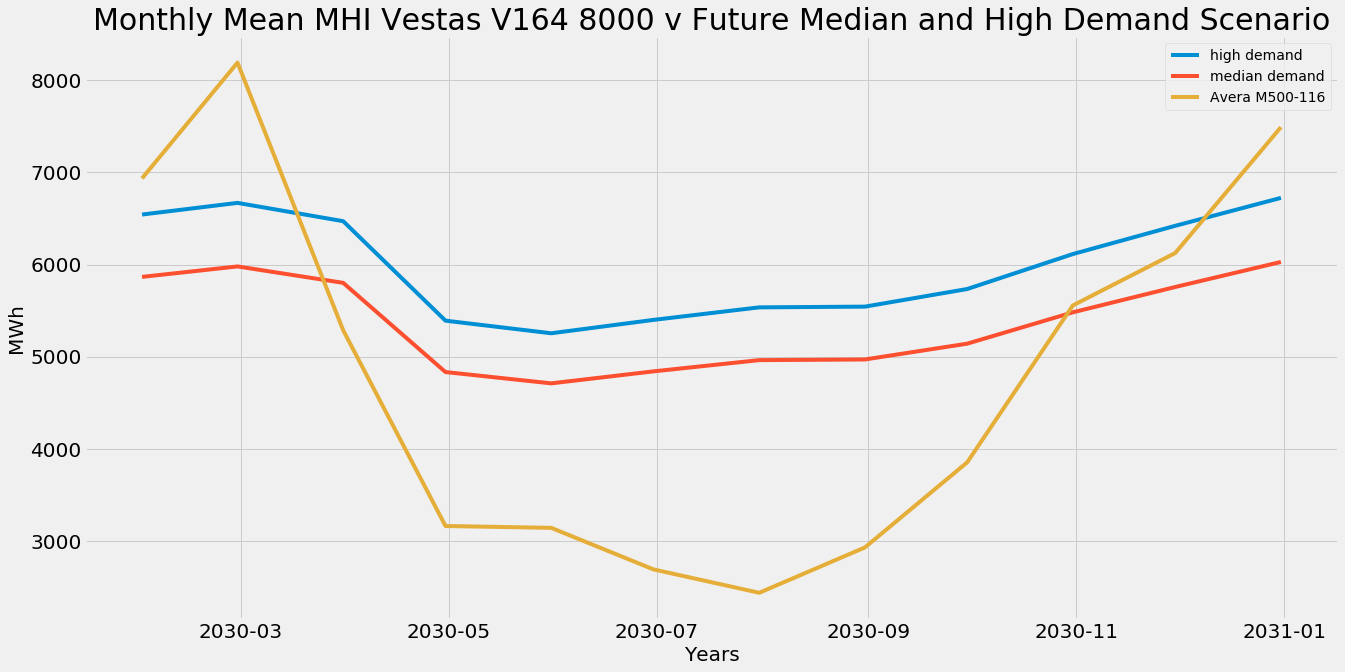

In [84]:
plt.figure(figsize=(20,10))
plt.plot(df_overall.resample('M').mean())
plt.title('Monthly Mean MHI Vestas V164 8000 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','Avera M500-116'])
plt.yticks(size=20);

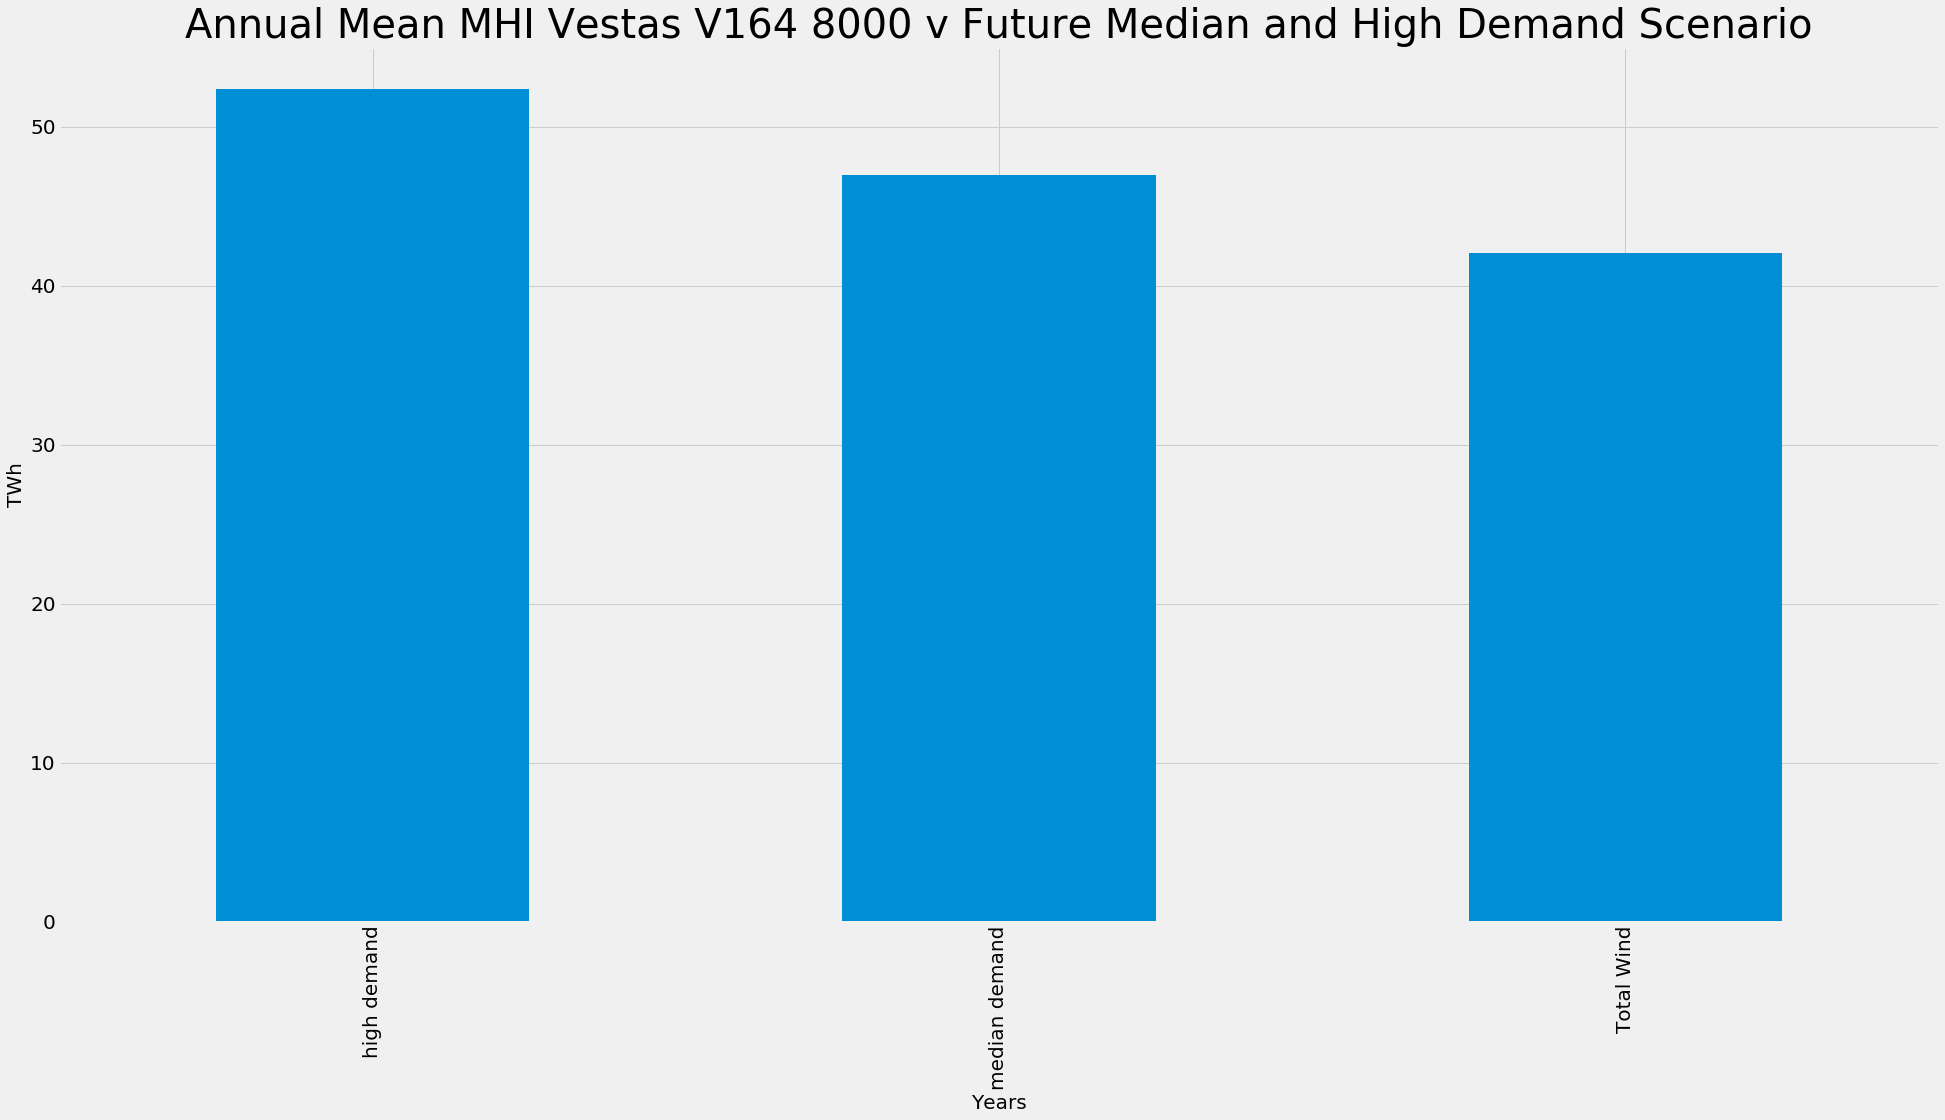

In [85]:
(df_overall.sum()/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean MHI Vestas V164 8000 v Future Median and High Demand Scenario', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);


In [86]:
(df_overall.sum()/(1000000))

high demand      52.387461
median demand    46.979098
Total Wind       42.056325
dtype: float64

In [87]:

df_wp = pd.DataFrame(df_overall.index)

df_overall['WP Median Forecast'] = df_overall['Total Wind' ]/df_overall['median demand' ]
df_overall['WP High Forecast'] = df_overall['Total Wind' ]/df_overall['high demand' ]

df_wp['WP Median Forecast'] = df_overall['WP Median Forecast'].tolist()
df_wp['WP High Forecast'] = df_overall['WP High Forecast'].tolist()

df_wp = df_wp.set_index('Date')
df_wp


WP Median Forecast  WP High Forecast
Date                                                     
2030-01-01 00:00:00            1.006159          0.902285
2030-01-01 01:00:00            1.131405          1.014602
2030-01-01 02:00:00            1.303001          1.168482
2030-01-01 03:00:00            1.406680          1.261458
2030-01-01 04:00:00            1.471468          1.319557
...                                 ...               ...
2030-12-31 19:00:00            0.865655          0.776287
2030-12-31 20:00:00            0.884824          0.793476
2030-12-31 21:00:00            0.921394          0.826271
2030-12-31 22:00:00            0.985451          0.883716
2030-12-31 23:00:00            1.135492          1.018266

[8760 rows x 2 columns]

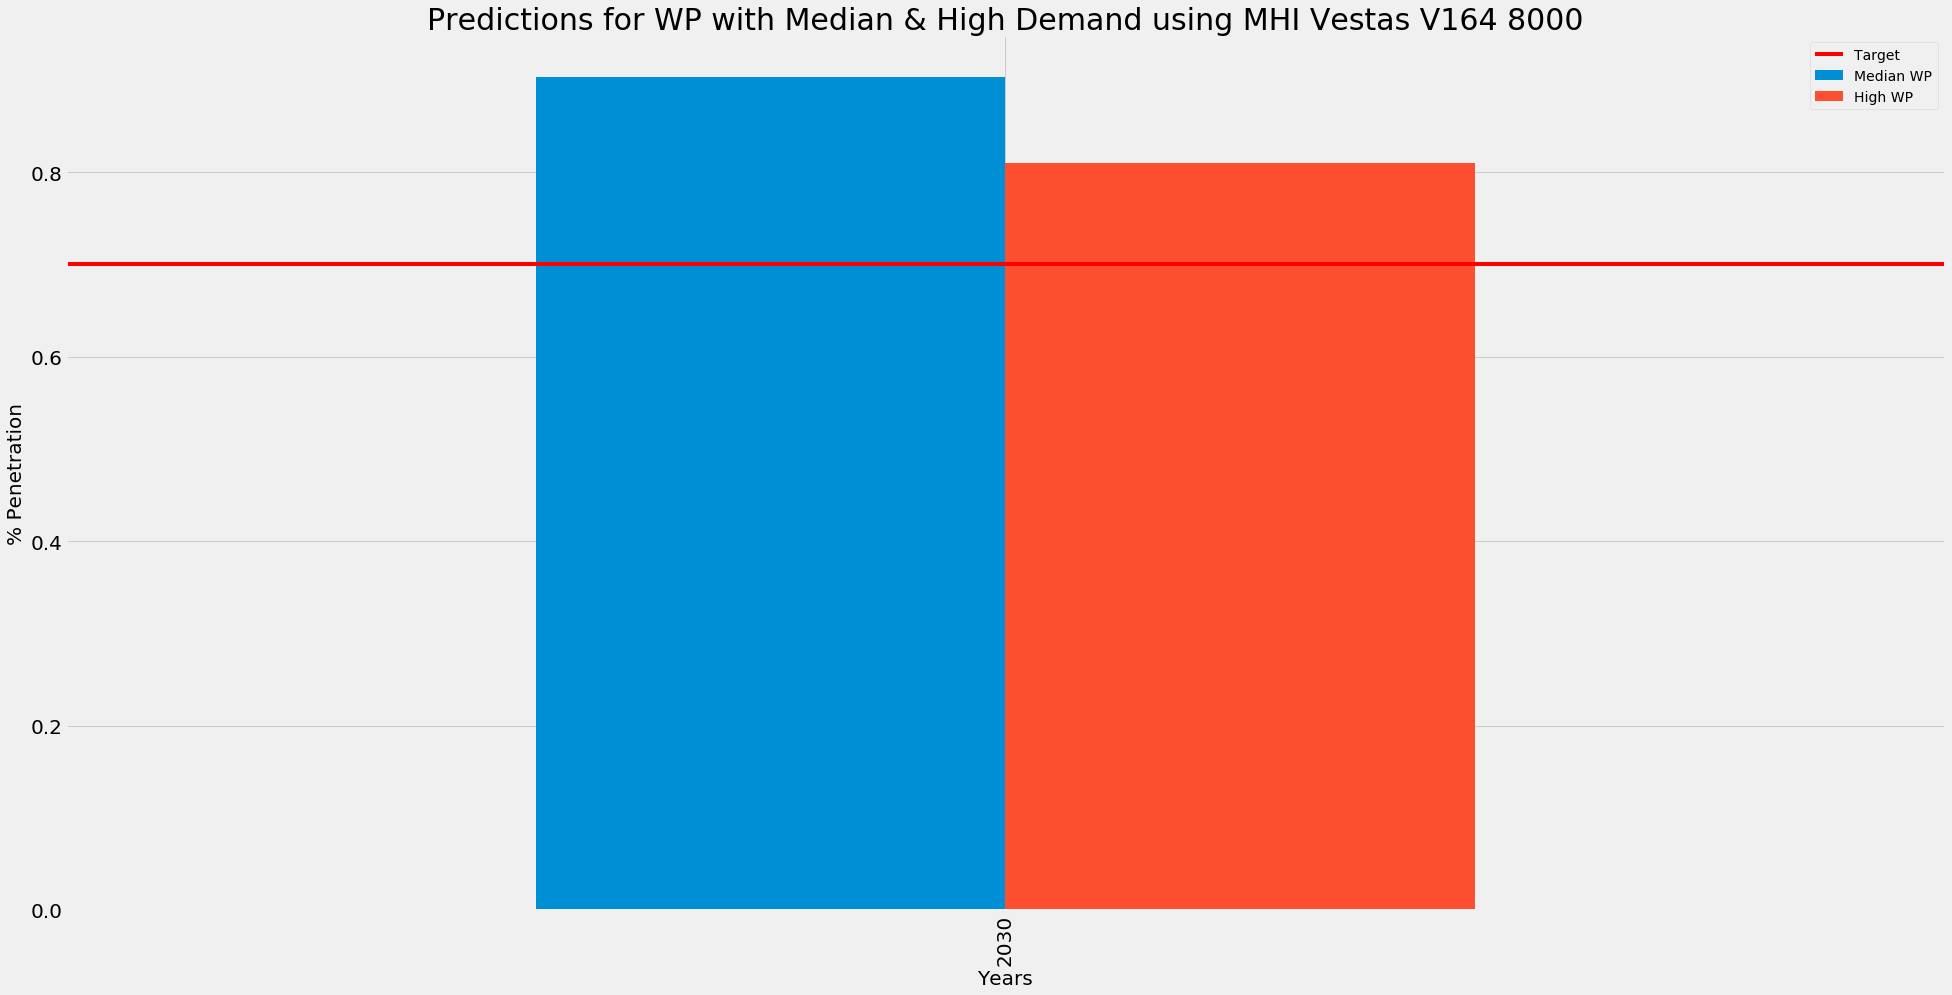

In [88]:

(df_wp.groupby(df_wp.index.year).mean()).plot(kind="bar", figsize=(30,15))
plt.title('Predictions for WP with Median & High Demand using MHI Vestas V164 8000', size =30)
plt.axhline(y=0.7, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('% Penetration',size=20)
plt.yticks(size=20);
plt.legend(labels=['Target','Median WP','High WP'])



In [89]:
df_wp.groupby(df_wp.index.year).mean()

WP Median Forecast  WP High Forecast
Date                                      
2030            0.903361            0.8101

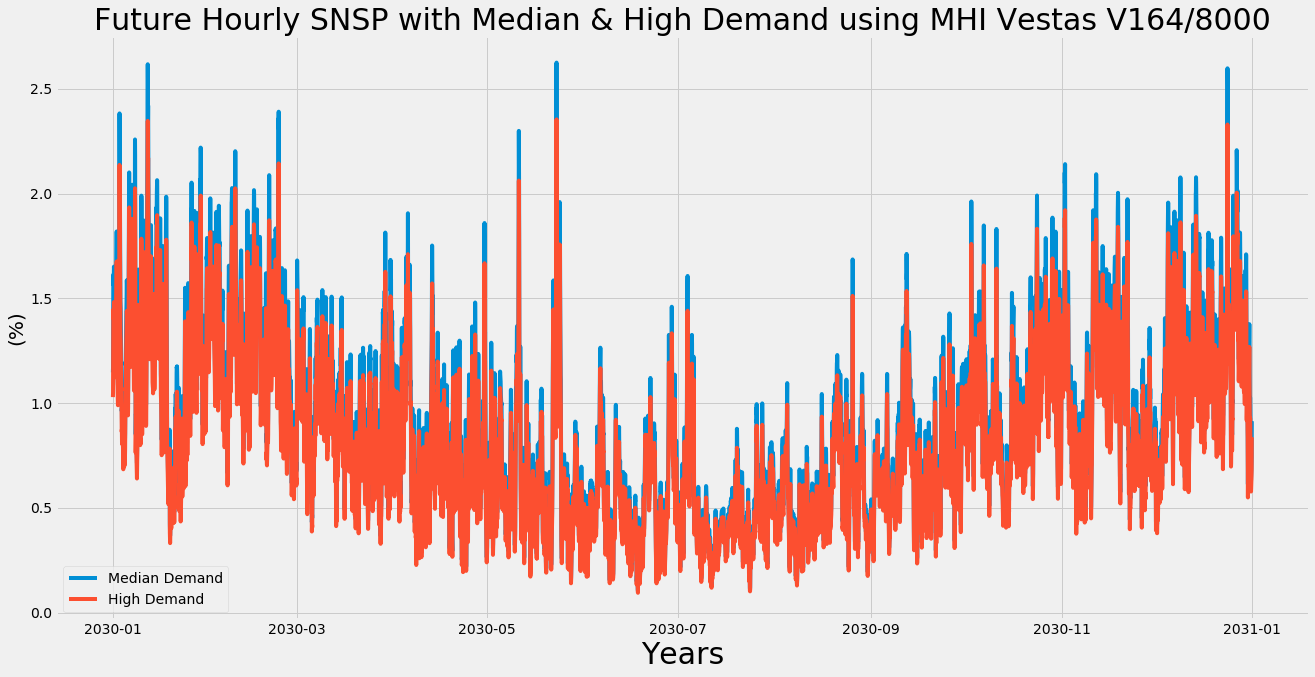

In [90]:
df_snsp = pd.DataFrame(df_overall.index)

df_snsp['SNSP Median Forecast'] = df_analysis['SNSP Median MHI Vestas V164 8000 Forecast'].tolist()
df_snsp['SNSP High Forecast'] = df_analysis['SNSP High MHI Vestas V164 8000 Forecast'].tolist()

df_snsp = df_snsp.set_index('Date')



plt.figure(figsize=(20,10))
plt.plot(df_snsp)

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Hourly SNSP with Median & High Demand using MHI Vestas V164/8000',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()



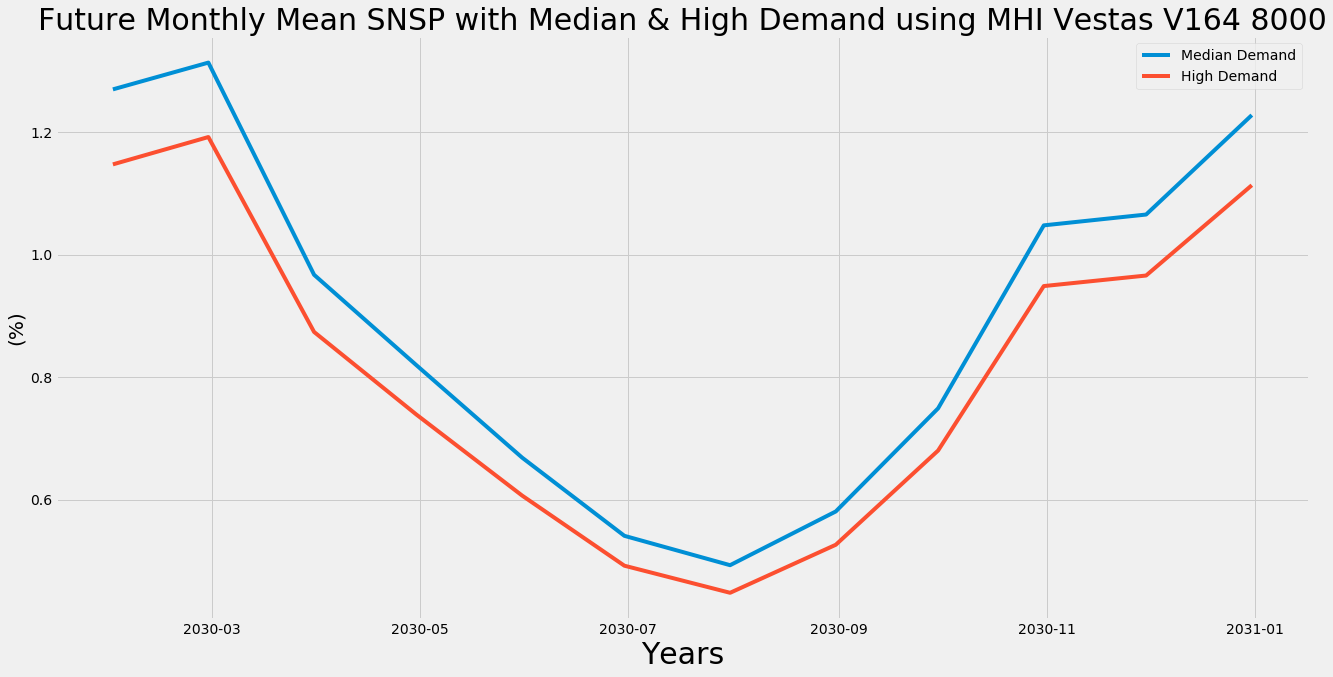

In [91]:
plt.figure(figsize=(20,10))
plt.plot(df_snsp.resample('M').mean())

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Monthly Mean SNSP with Median & High Demand using MHI Vestas V164 8000',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()


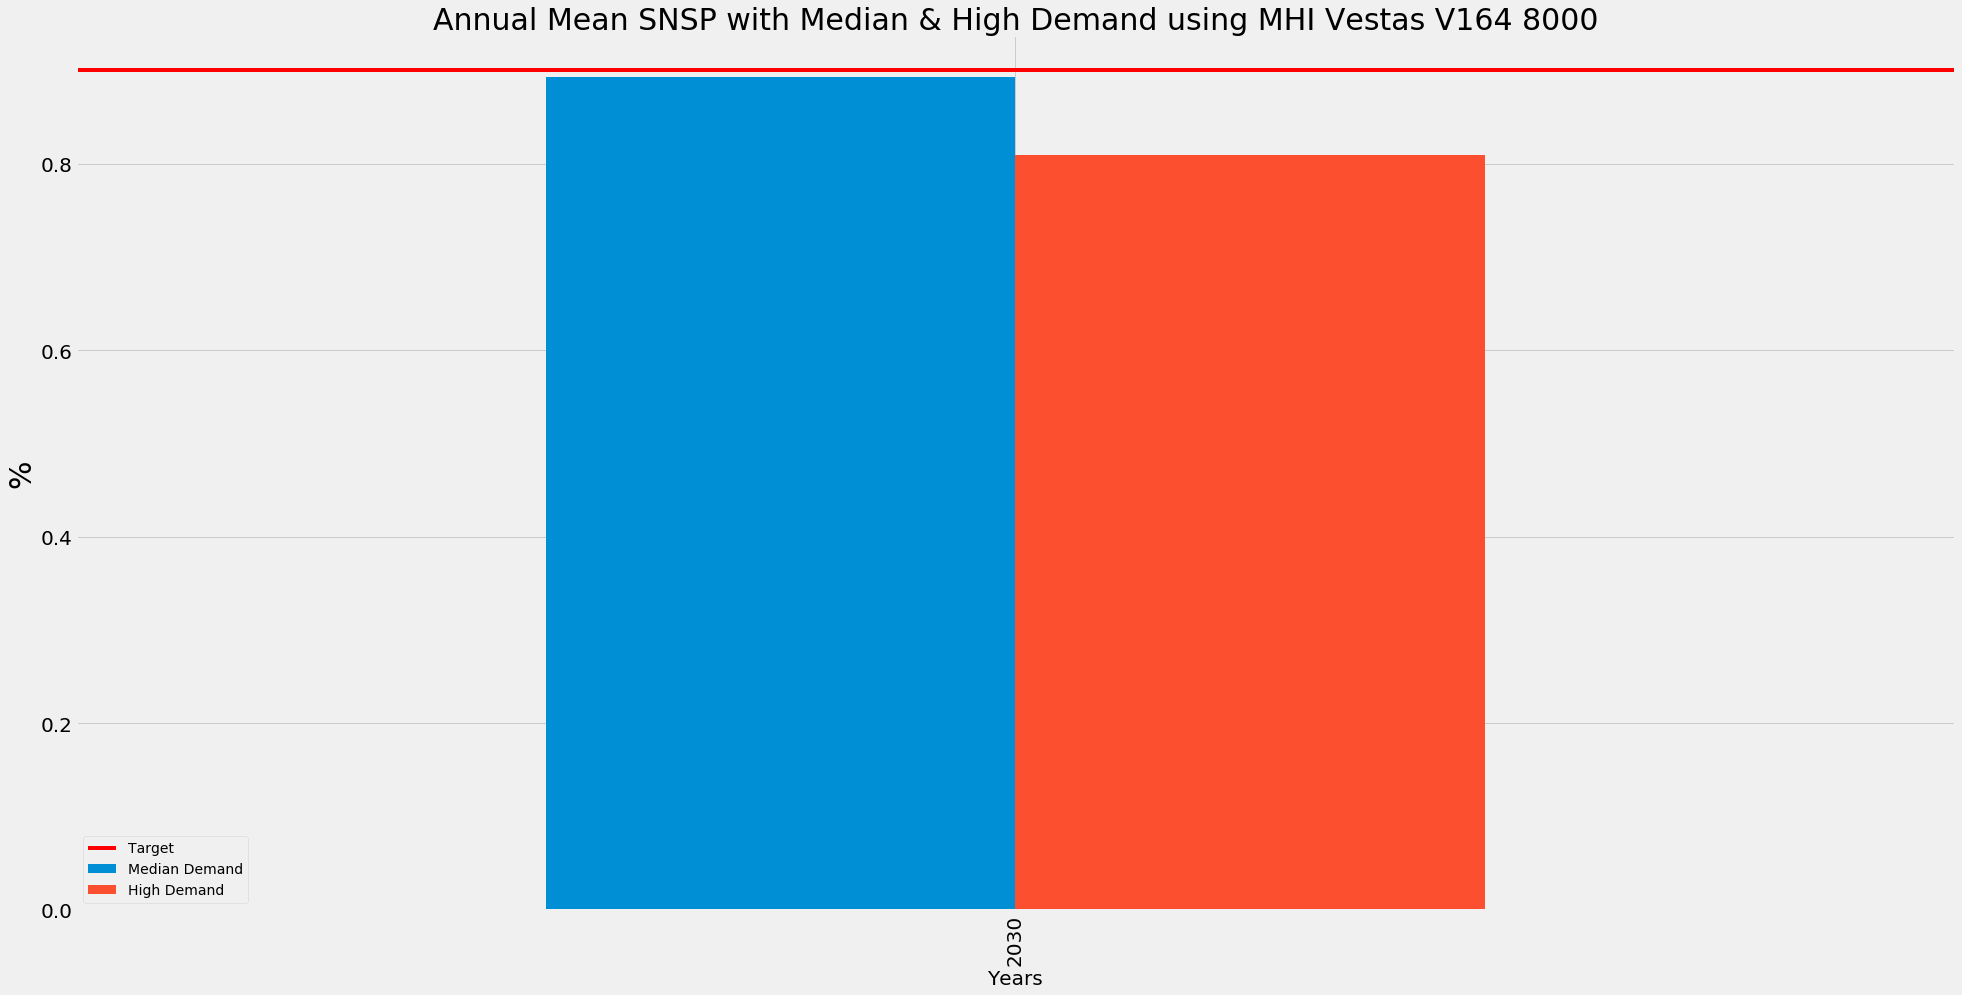

In [92]:
(df_snsp.groupby(df_snsp.index.year).mean()).plot(kind="bar", figsize=(30,15))
plt.title('Annual Mean SNSP with Median & High Demand using MHI Vestas V164 8000', size =30)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('%',size=30)
plt.yticks(size=20);
plt.legend(labels=['Target', 'Median Demand','High Demand'])

In [93]:
(df_snsp.groupby(df_snsp.index.year).mean())

SNSP Median Forecast  SNSP High Forecast
Date                                          
2030              0.893083            0.809143

# MHI Vestas V164/9500

In [94]:
df_overall = pd.DataFrame()
data = pd.date_range('1/1/2030', periods = 8760, freq ='H')
data_list = data.tolist()
df_overall['Date'] = data_list
df_overall = df_overall.set_index('Date')

df_overall['high demand'] = (df_analysis['high demand']).tolist()
df_overall['median demand'] = (df_analysis['median demand']).tolist()
df_overall['Total Wind'] = (df_analysis['MHI Vestas V164 9500 Total Wind']).tolist()

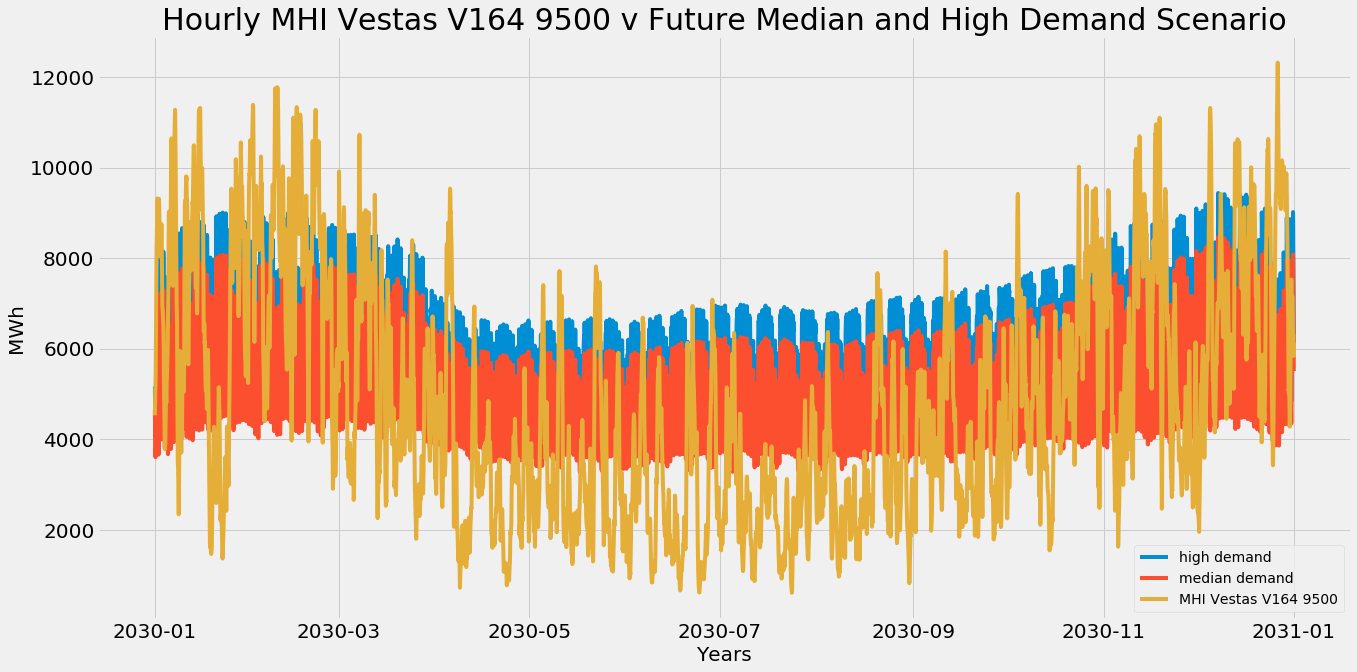

In [95]:
plt.figure(figsize=(20,10))
plt.plot(df_overall)
plt.title('Hourly MHI Vestas V164 9500 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','MHI Vestas V164 9500'])
plt.yticks(size=20);

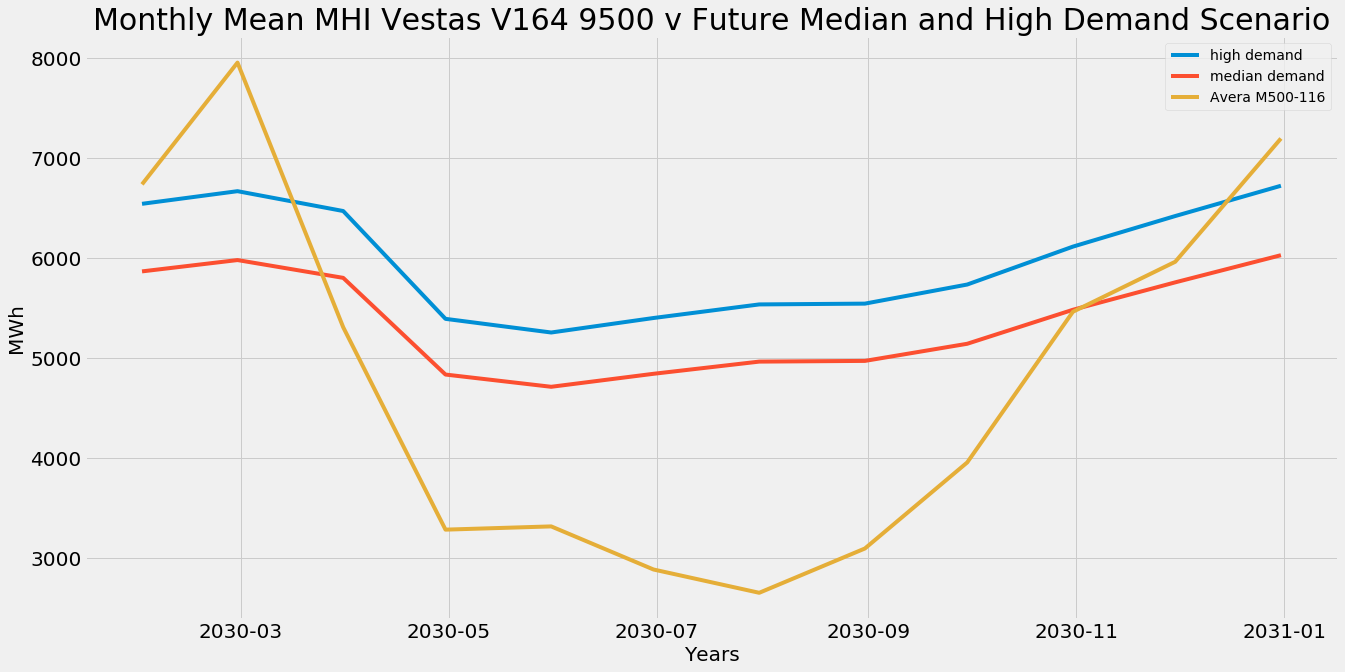

In [96]:
plt.figure(figsize=(20,10))
plt.plot(df_overall.resample('M').mean())
plt.title('Monthly Mean MHI Vestas V164 9500 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','Avera M500-116'])
plt.yticks(size=20);

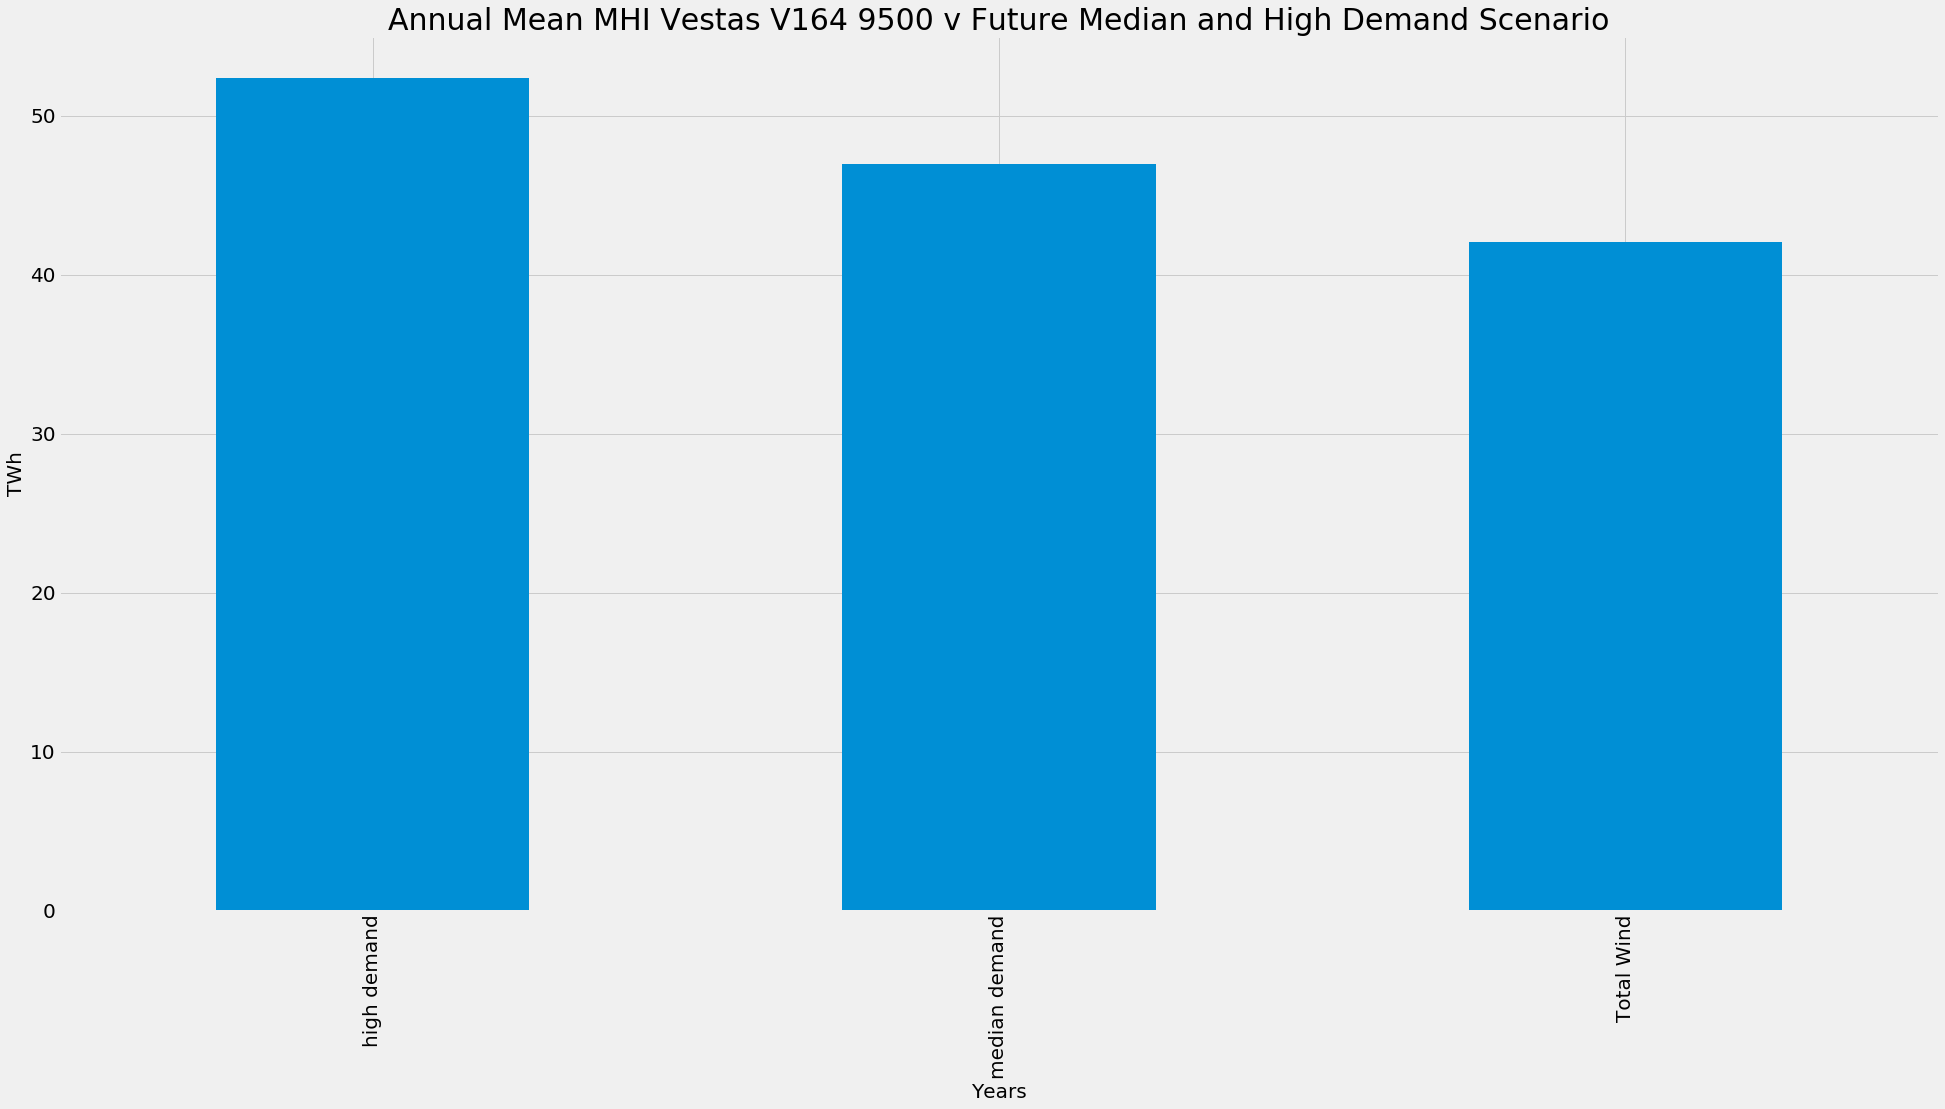

In [97]:
(df_overall.sum()/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean MHI Vestas V164 9500 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);


In [98]:
(df_overall.sum()/(1000000))

high demand      52.387461
median demand    46.979098
Total Wind       42.056325
dtype: float64

In [99]:
df_wp = pd.DataFrame(df_overall.index)

df_overall['WP Median Forecast'] = df_overall['Total Wind' ]/df_overall['median demand' ]
df_overall['WP High Forecast'] = df_overall['Total Wind' ]/df_overall['high demand' ]

df_wp['WP Median Forecast'] = df_overall['WP Median Forecast'].tolist()
df_wp['WP High Forecast'] = df_overall['WP High Forecast'].tolist()

df_wp = df_wp.set_index('Date')
df_wp




WP Median Forecast  WP High Forecast
Date                                                     
2030-01-01 00:00:00            0.977832          0.876882
2030-01-01 01:00:00            1.091036          0.978400
2030-01-01 02:00:00            1.248920          1.119984
2030-01-01 03:00:00            1.347755          1.208616
2030-01-01 04:00:00            1.406893          1.261649
...                                 ...               ...
2030-12-31 19:00:00            0.846428          0.759045
2030-12-31 20:00:00            0.868380          0.778730
2030-12-31 21:00:00            0.905521          0.812037
2030-12-31 22:00:00            0.966949          0.867123
2030-12-31 23:00:00            1.106721          0.992466

[8760 rows x 2 columns]

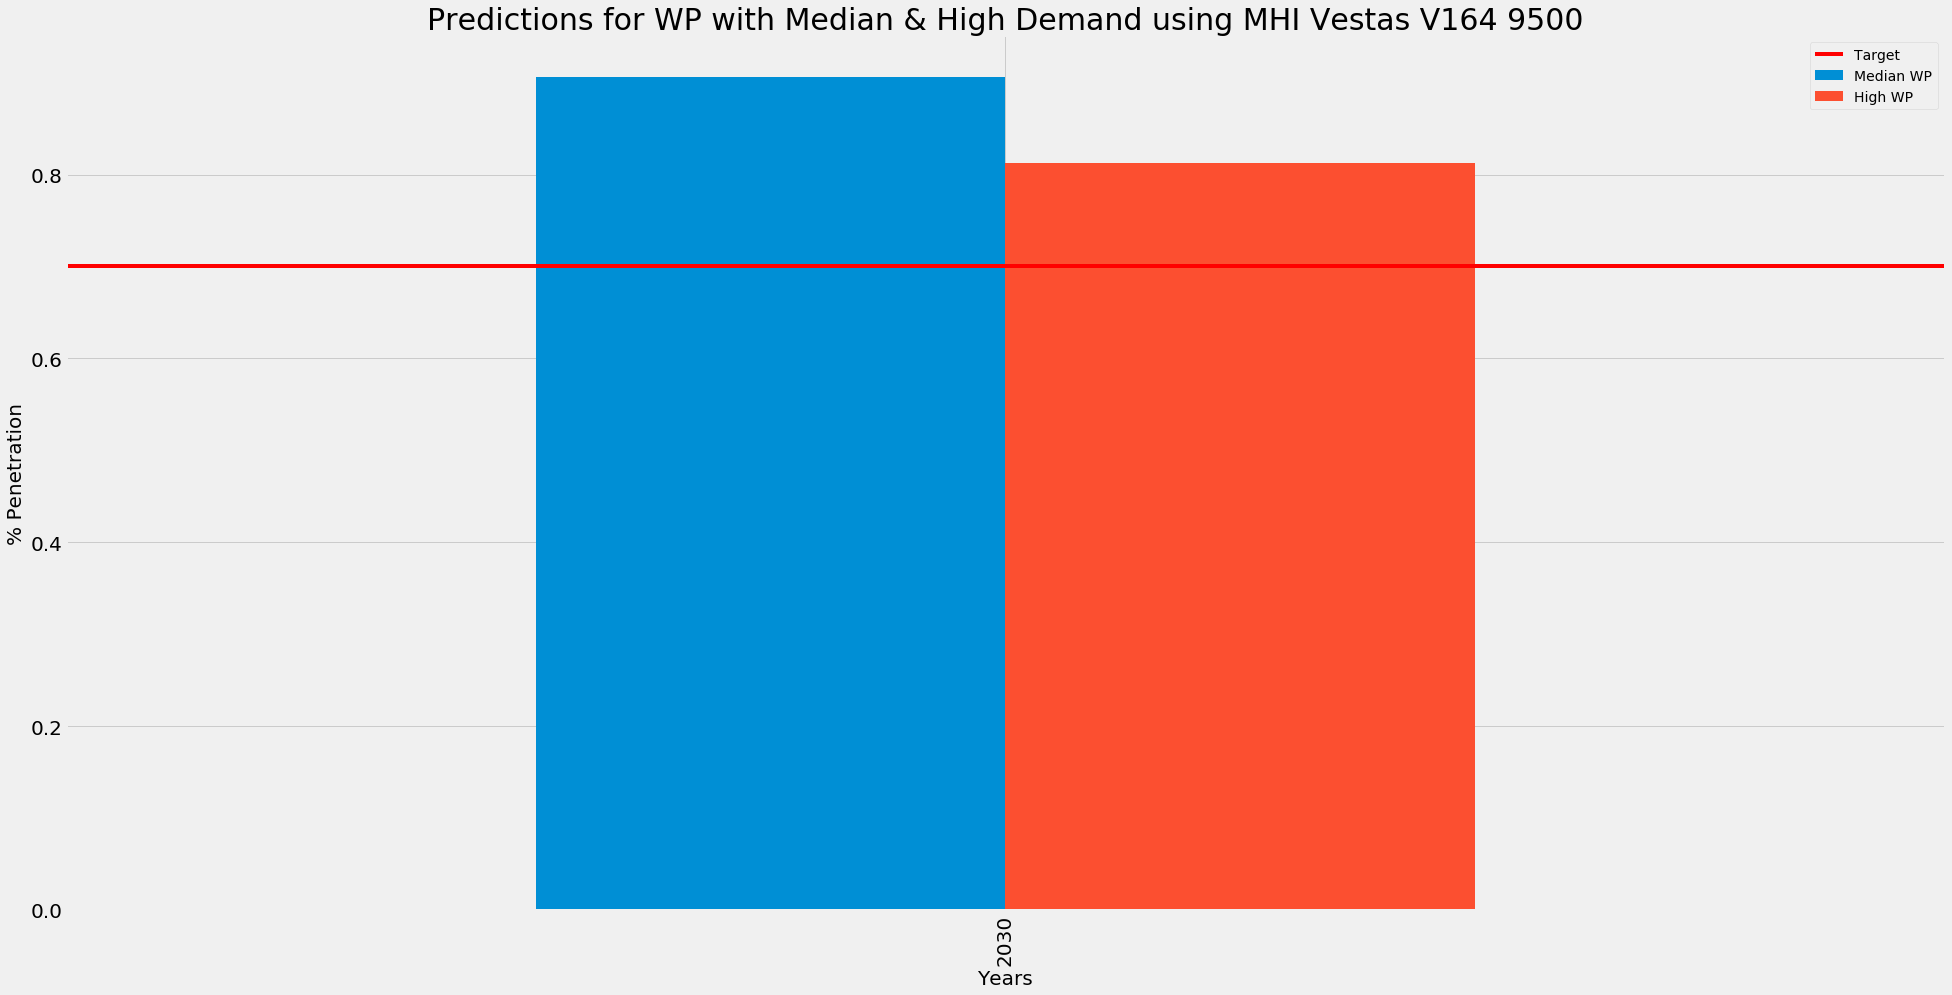

In [100]:
(df_wp.groupby(df_wp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Predictions for WP with Median & High Demand using MHI Vestas V164 9500', size =30)
plt.axhline(y=0.7, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('% Penetration',size=20)
plt.yticks(size=20);
plt.legend(labels=['Target','Median WP','High WP'])



In [101]:
df_wp.groupby(df_wp.index.year).mean()

WP Median Forecast  WP High Forecast
Date                                      
2030            0.906181          0.812629

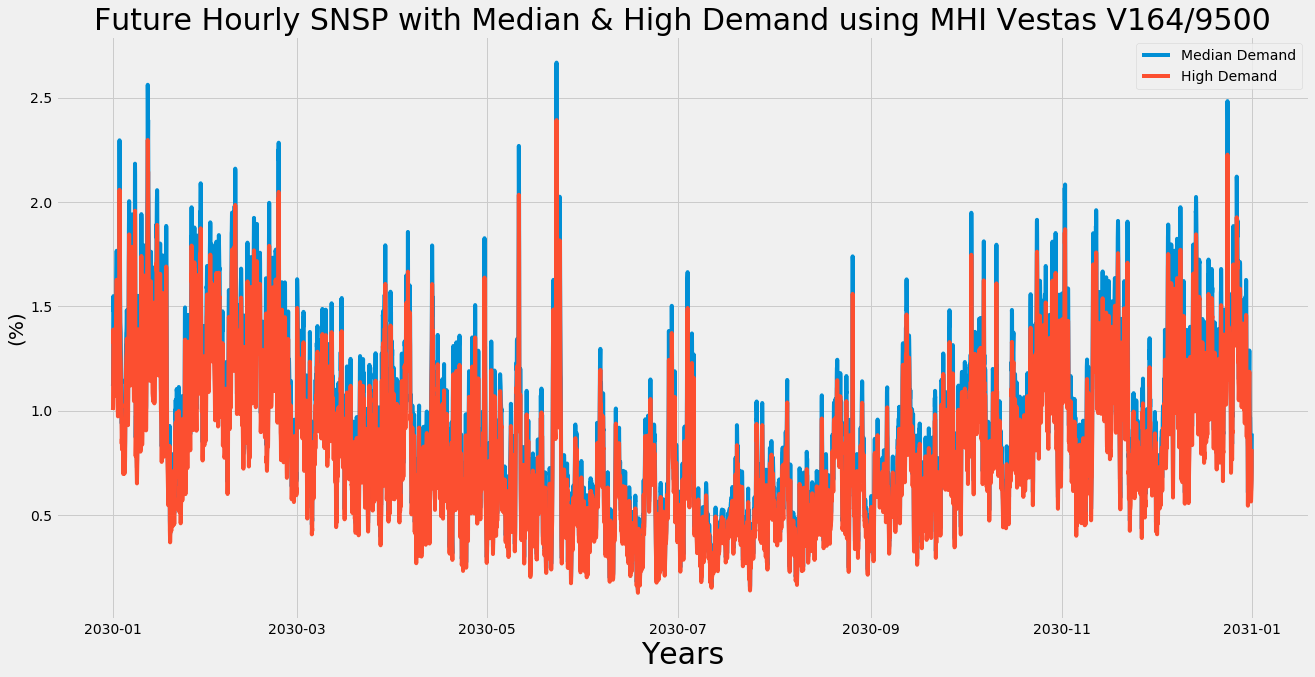

In [102]:
df_snsp = pd.DataFrame(df_overall.index)

df_snsp['SNSP Median Forecast'] = df_analysis['SNSP Median MHI Vestas V164 9500 Forecast'].tolist()
df_snsp['SNSP High Forecast'] = df_analysis['SNSP High MHI Vestas V164 9500 Forecast'].tolist()

df_snsp = df_snsp.set_index('Date')



plt.figure(figsize=(20,10))
plt.plot(df_snsp)

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Hourly SNSP with Median & High Demand using MHI Vestas V164/9500',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()


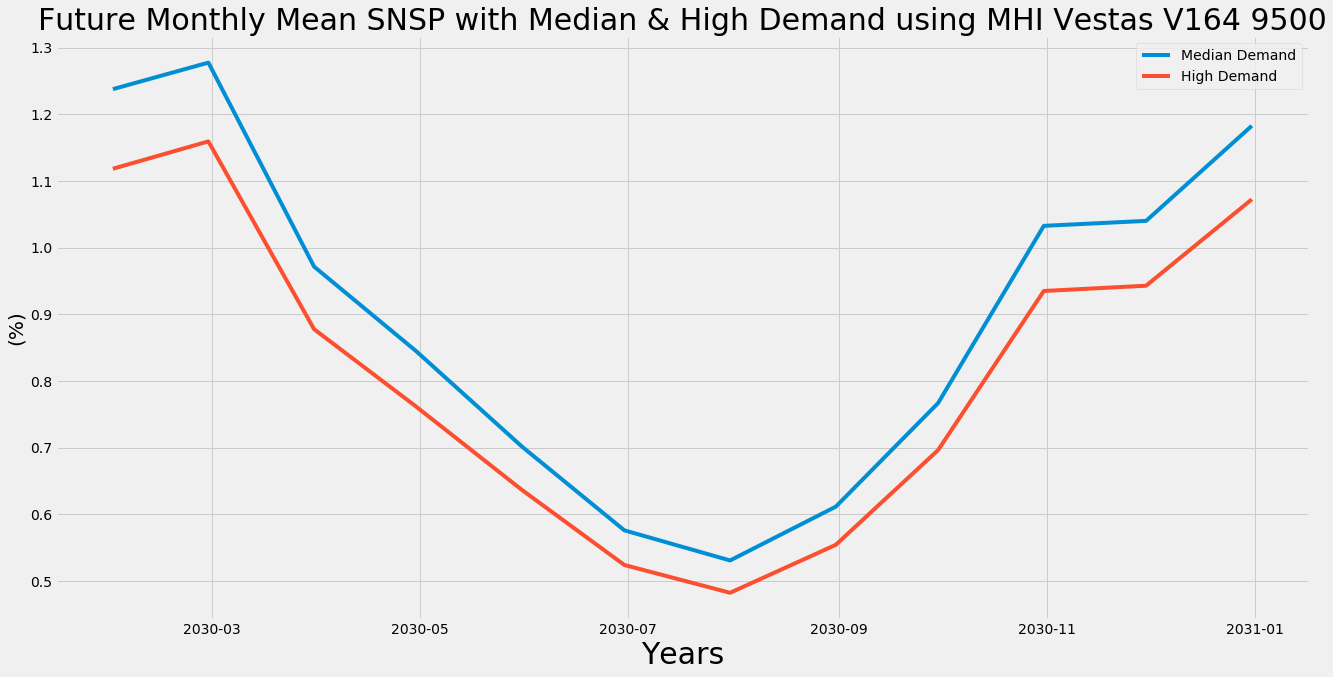

In [103]:
plt.figure(figsize=(20,10))
plt.plot(df_snsp.resample('M').mean())

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Monthly Mean SNSP with Median & High Demand using MHI Vestas V164 9500',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()


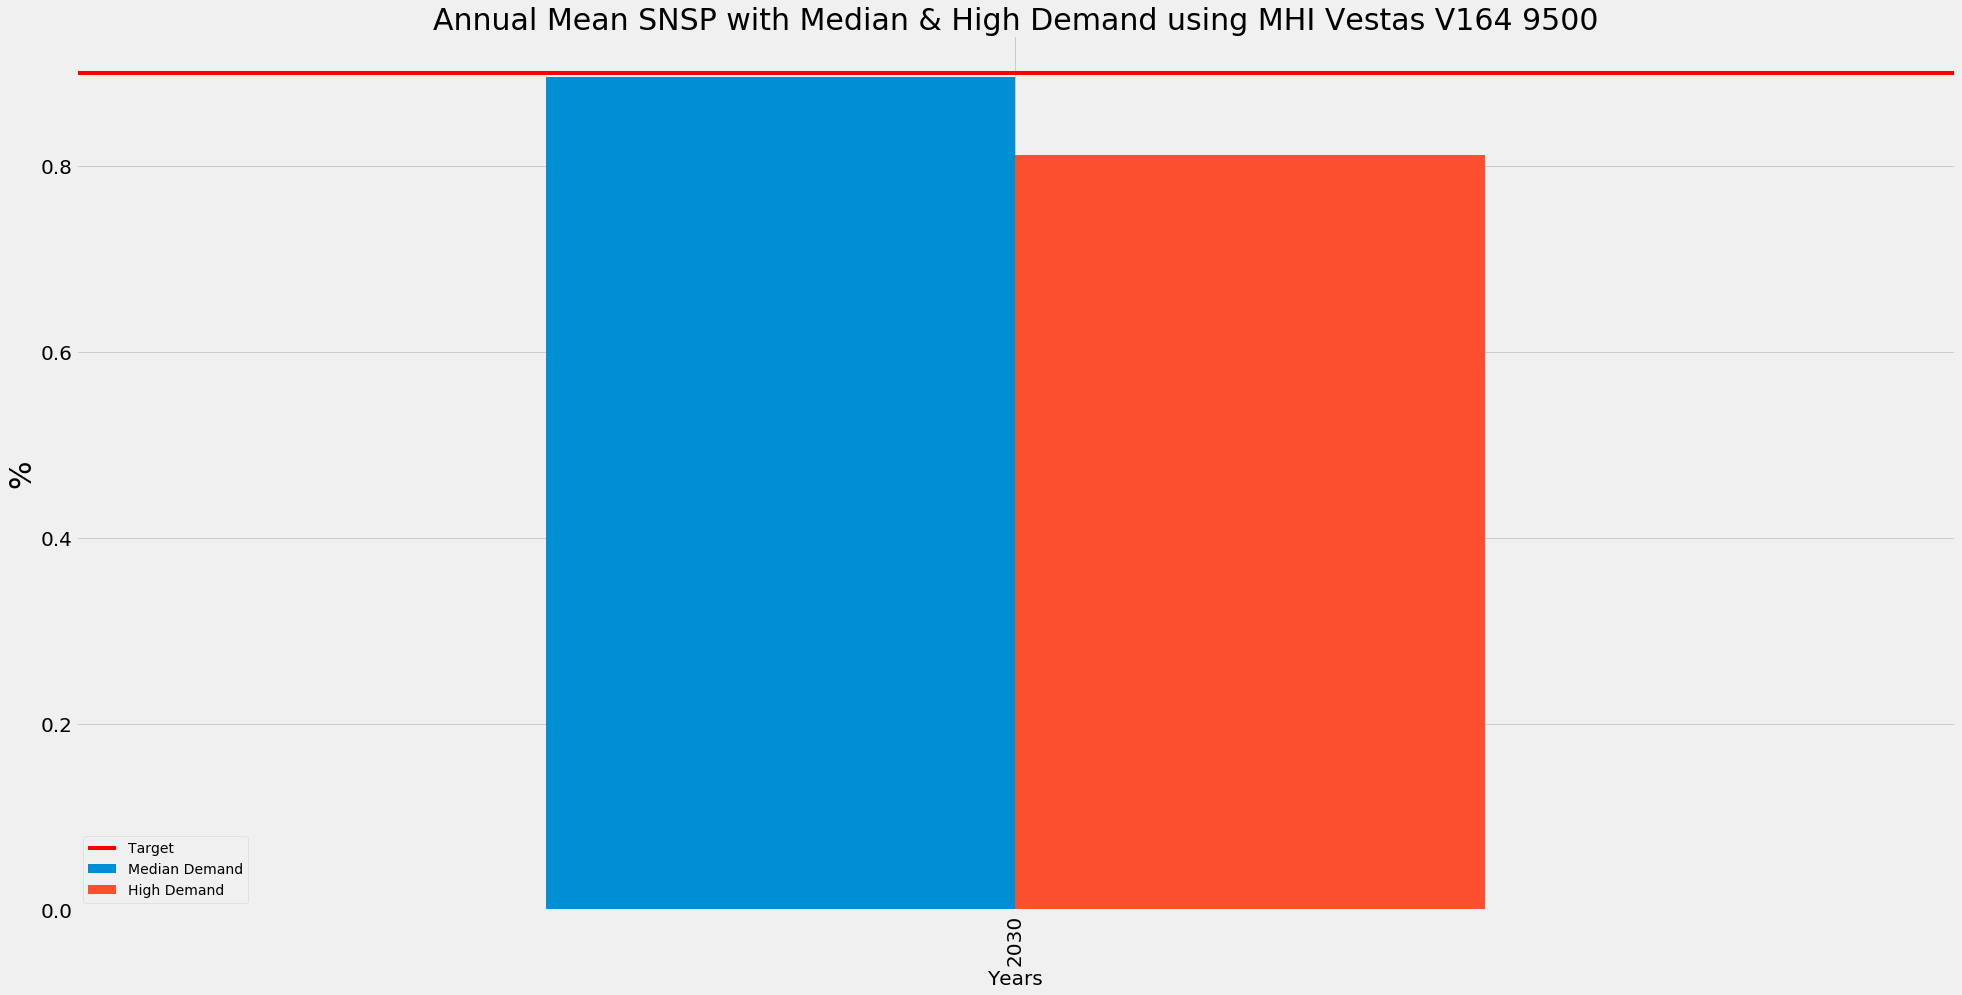

In [104]:
(df_snsp.groupby(df_snsp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean SNSP with Median & High Demand using MHI Vestas V164 9500', size =30)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('%',size=30)
plt.yticks(size=20);
plt.legend(labels=['Target', 'Median Demand','High Demand'])

In [105]:
(df_snsp.groupby(df_snsp.index.year).mean())

SNSP Median Forecast  SNSP High Forecast
Date                                          
2030              0.895848            0.811623

# Enercon E126/7580

In [106]:
df_overall = pd.DataFrame()
data = pd.date_range('1/1/2030', periods = 8760, freq ='H')
data_list = data.tolist()
df_overall['Date'] = data_list
df_overall = df_overall.set_index('Date')

df_overall['high demand'] = (df_analysis['high demand']).tolist()
df_overall['median demand'] = (df_analysis['median demand']).tolist()
df_overall['Total Wind'] = (df_analysis['Enercon E126 7580 Total Wind']).tolist()

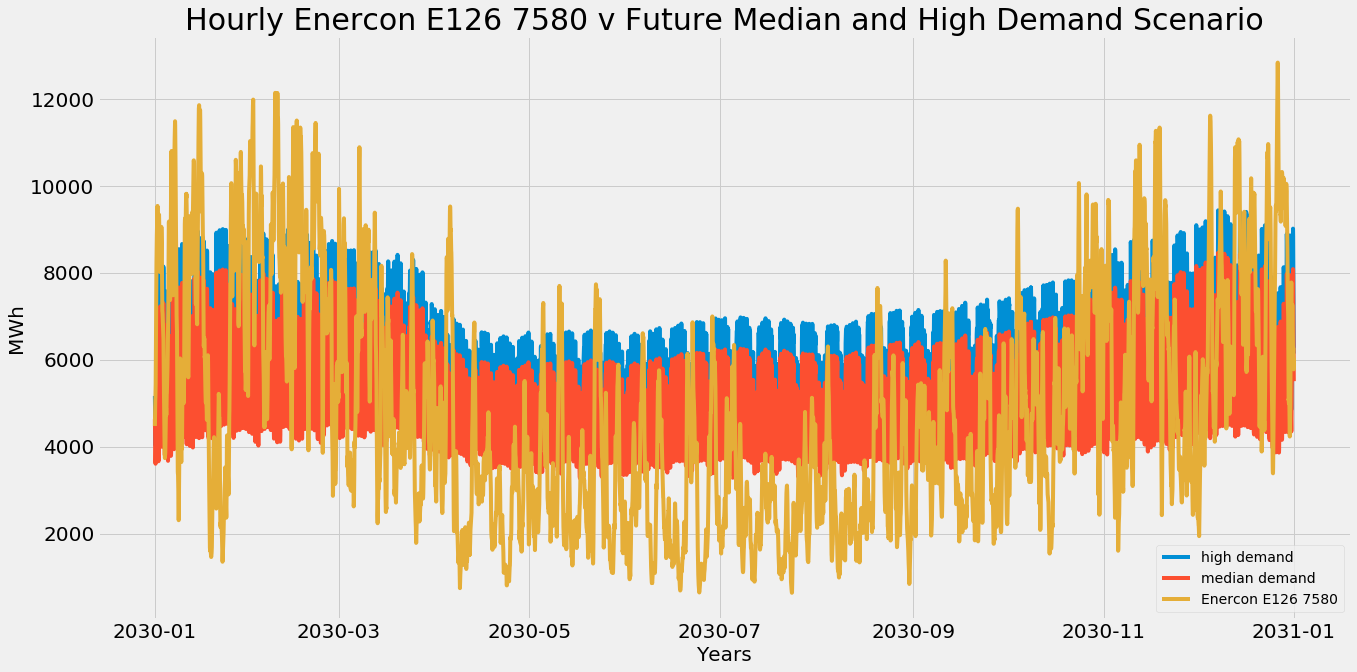

In [107]:
plt.figure(figsize=(20,10))
plt.plot(df_overall)
plt.title('Hourly Enercon E126 7580 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','Enercon E126 7580'])
plt.yticks(size=20);

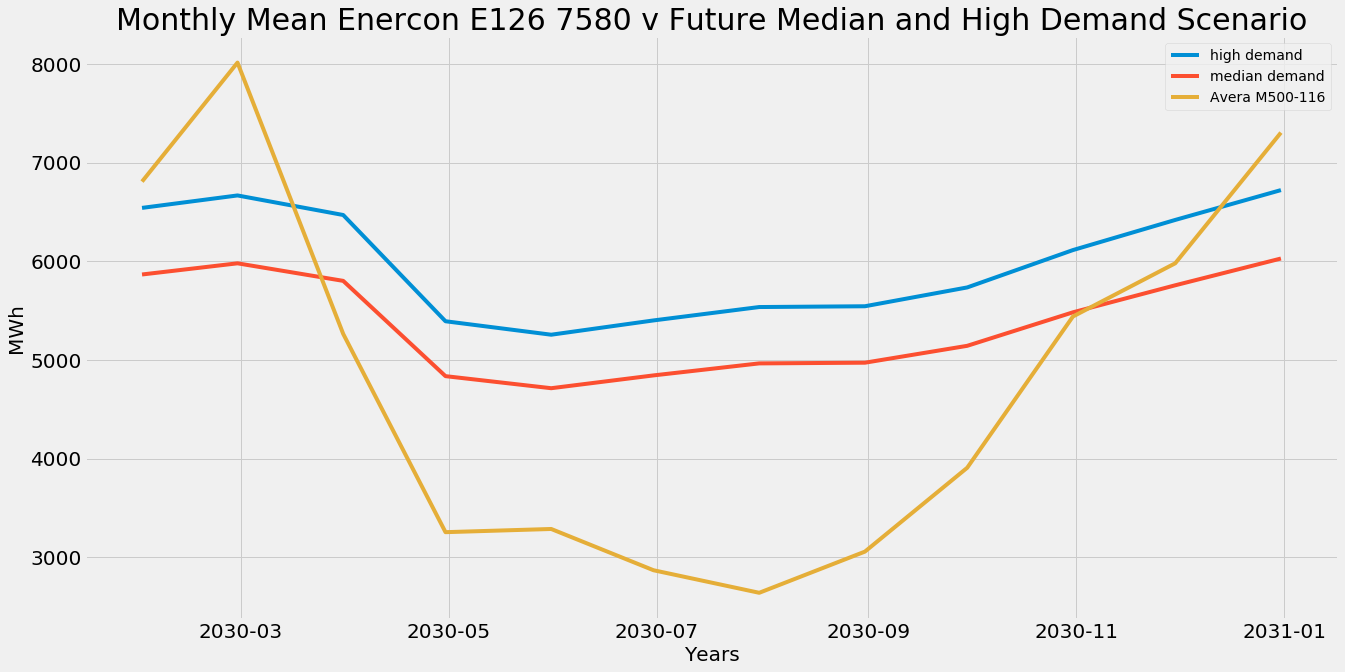

In [108]:
plt.figure(figsize=(20,10))
plt.plot(df_overall.resample('M').mean())
plt.title('Monthly Mean Enercon E126 7580 v Future Median and High Demand Scenario', size =30)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('MWh',size=20)
plt.legend(labels=['high demand','median demand','Avera M500-116'])
plt.yticks(size=20);

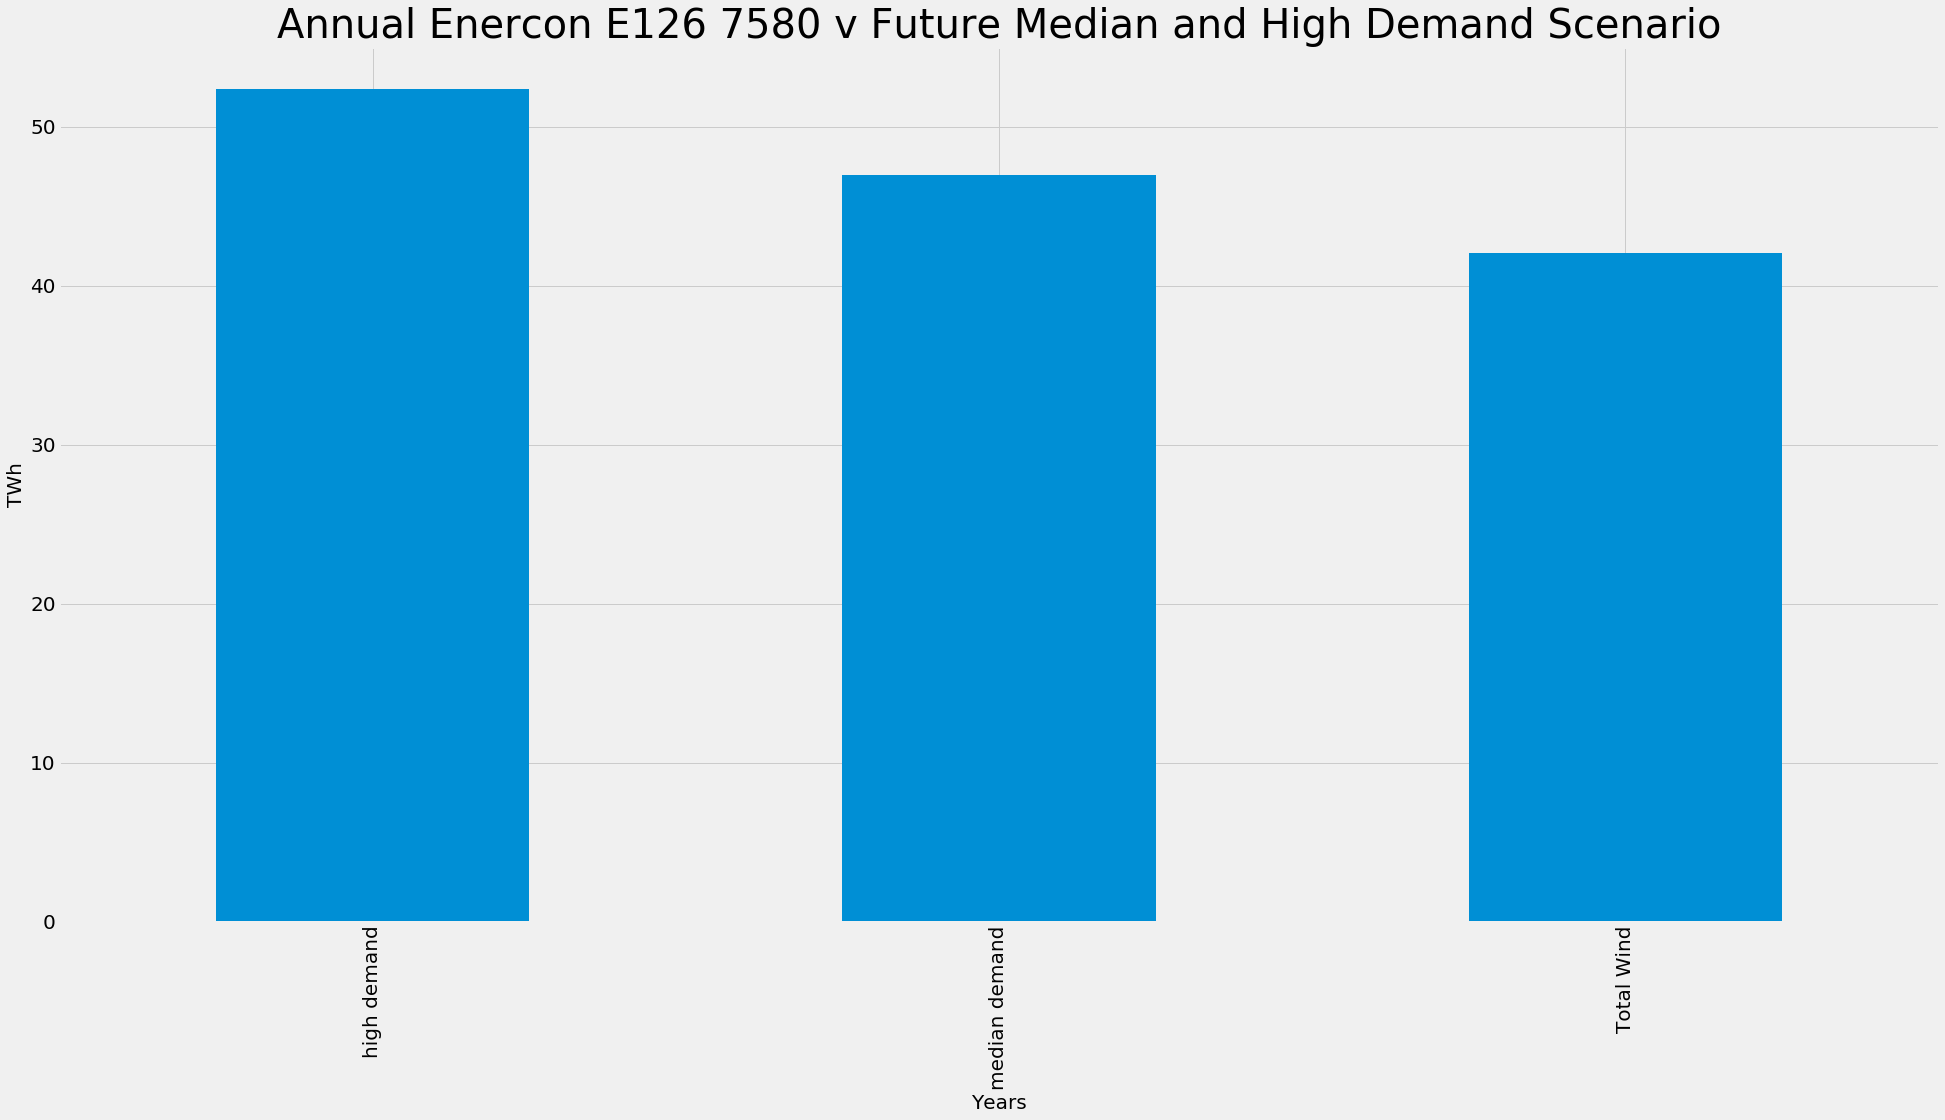

In [109]:
(df_overall.sum()/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Enercon E126 7580 v Future Median and High Demand Scenario', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);



In [110]:
(df_overall.sum()/(1000000))

high demand      52.387461
median demand    46.979098
Total Wind       42.056325
dtype: float64

In [111]:
df_wp = pd.DataFrame(df_overall.index)

df_overall['WP Median Forecast'] = df_overall['Total Wind' ]/df_overall['median demand' ]
df_overall['WP High Forecast'] = df_overall['Total Wind' ]/df_overall['high demand' ]

df_wp['WP Median Forecast'] = df_overall['WP Median Forecast'].tolist()
df_wp['WP High Forecast'] = df_overall['WP High Forecast'].tolist()

df_wp = df_wp.set_index('Date')
df_wp




WP Median Forecast  WP High Forecast
Date                                                     
2030-01-01 00:00:00            0.966108          0.866370
2030-01-01 01:00:00            1.082203          0.970479
2030-01-01 02:00:00            1.241434          1.113271
2030-01-01 03:00:00            1.340638          1.202234
2030-01-01 04:00:00            1.400135          1.255588
...                                 ...               ...
2030-12-31 19:00:00            0.840519          0.753746
2030-12-31 20:00:00            0.860130          0.771332
2030-12-31 21:00:00            0.896334          0.803799
2030-12-31 22:00:00            0.956496          0.857750
2030-12-31 23:00:00            1.096476          0.983278

[8760 rows x 2 columns]

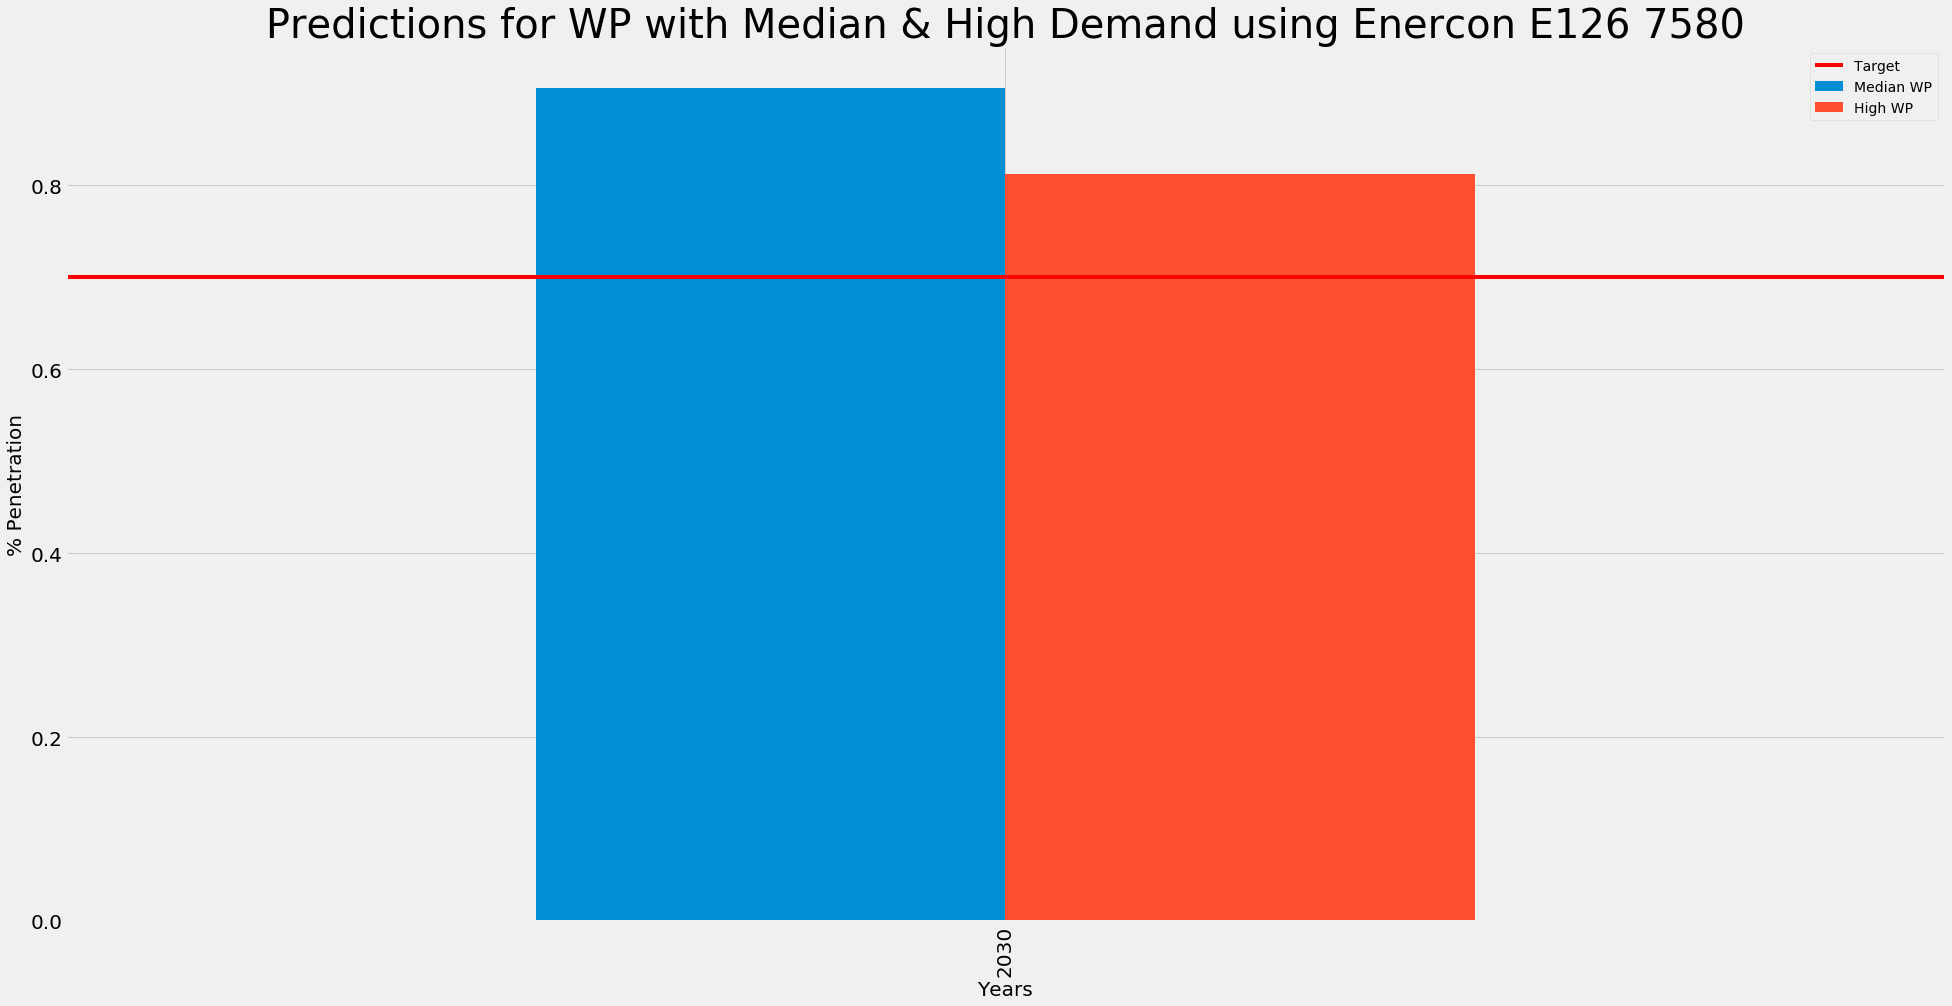

In [112]:
(df_wp.groupby(df_wp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Predictions for WP with Median & High Demand using Enercon E126 7580', size =40)
plt.axhline(y=0.7, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('% Penetration',size=20)
plt.yticks(size=20);
plt.legend(labels=['Target','Median WP','High WP'])



In [113]:
df_wp.groupby(df_wp.index.year).mean()

WP Median Forecast  WP High Forecast
Date                                      
2030            0.905724          0.812219

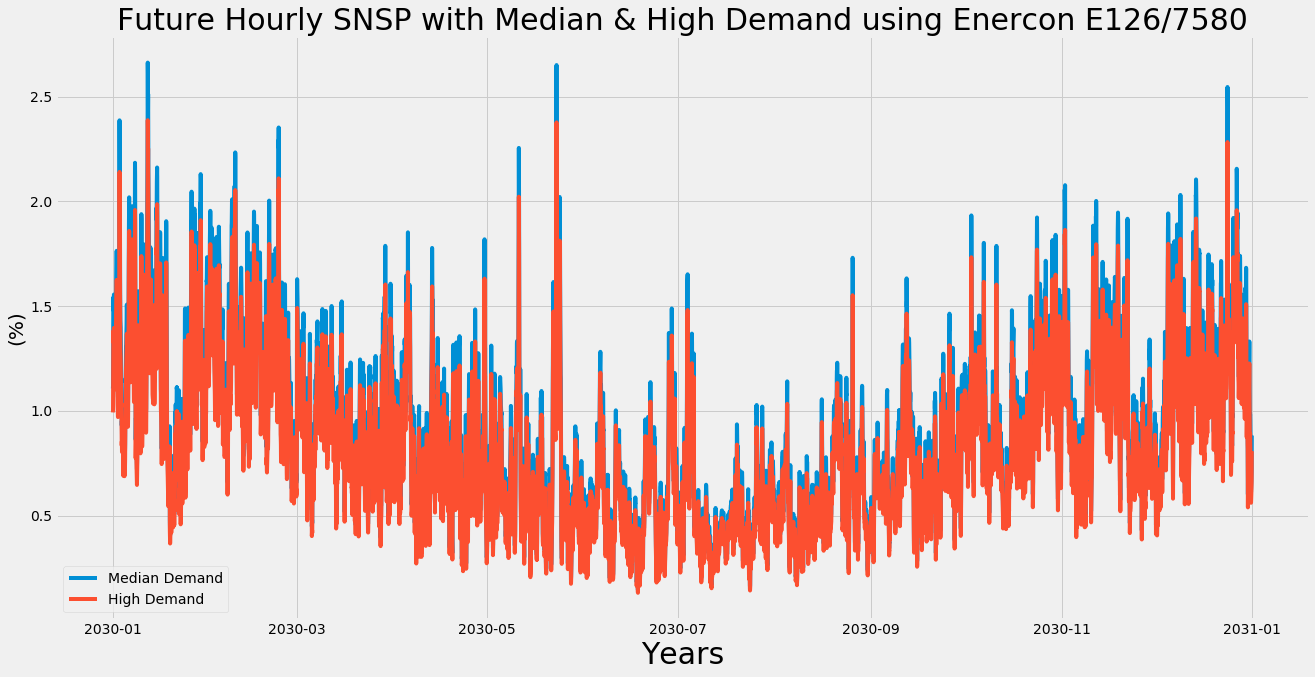

In [114]:
df_snsp = pd.DataFrame(df_overall.index)

df_snsp['SNSP Median Forecast'] = df_analysis['SNSP Median Enercon E126 7580 Forecast'].tolist()
df_snsp['SNSP High Forecast'] = df_analysis['SNSP High Enercon E126 7580 Forecast'].tolist()

df_snsp = df_snsp.set_index('Date')



plt.figure(figsize=(20,10))
plt.plot(df_snsp)

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Hourly SNSP with Median & High Demand using Enercon E126/7580',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()



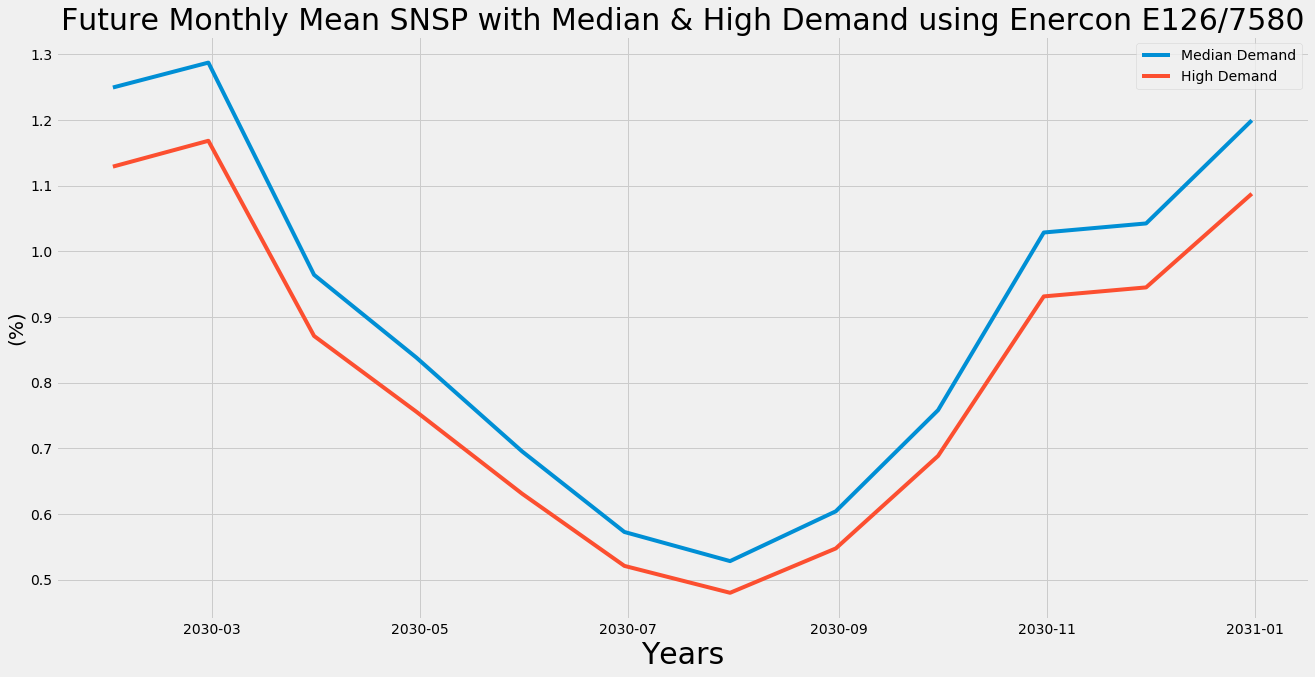

In [115]:
plt.figure(figsize=(20,10))
plt.plot(  df_snsp.resample('M').mean()  )

plt.legend(labels=['Median Demand','High Demand'])
plt.title('Future Monthly Mean SNSP with Median & High Demand using Enercon E126/7580',size=30)
plt.xlabel('Years', size =30)
plt.ylabel('(%)',size=20)

plt.show()



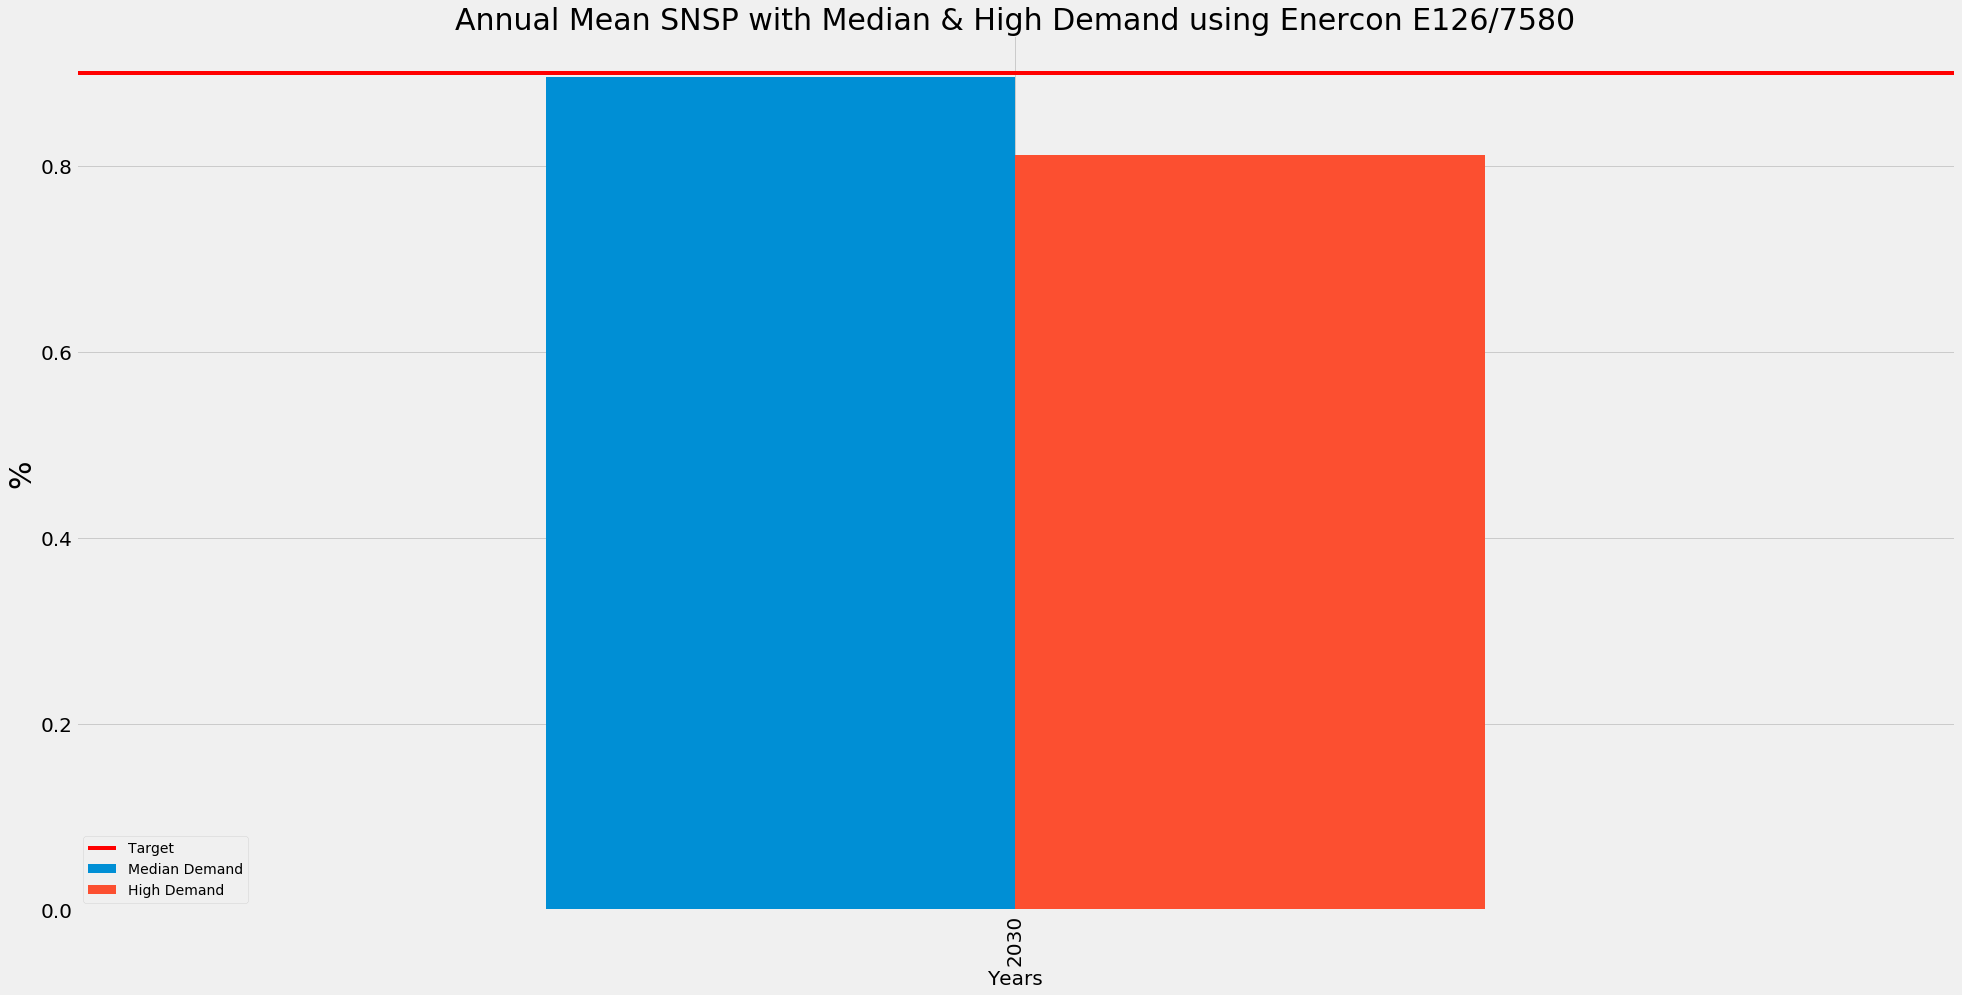

In [116]:
(df_snsp.groupby(df_snsp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Annual Mean SNSP with Median & High Demand using Enercon E126/7580', size =30)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('%',size=30)
plt.yticks(size=20);
plt.legend(labels=['Target', 'Median Demand','High Demand'])

In [117]:
(df_snsp.groupby(df_snsp.index.year).mean())

SNSP Median Forecast  SNSP High Forecast
Date                                          
2030               0.89527            0.811114

In [118]:
medaveralist

[209, 272, 211, 283, 324, 173, 110, 98]

In [119]:
med8000list

[114, 149, 115, 155, 177, 95, 60, 53]

In [120]:
med9500list

[97, 127, 98, 132, 151, 81, 51, 46]

In [121]:
medenerconlist

[146, 189, 147, 197, 226, 121, 77, 68]

# Further reductions

In [122]:
for i in range(0, len(lowenerconlist)):
 
    medaveralist[i] = round(medaveralist[i]*(1-0.5833333))
    
    med8000list[i] = round(med8000list[i]*(1-0.52397))
    
    med9500list[i] = round(med9500list[i]*(1-0.53001))
    
    medenerconlist[i] = round(medenerconlist[i]*(1-0.60547))
    

In [123]:
medaveralist

[87, 113, 88, 118, 135, 72, 46, 41]

In [124]:
med8000list

[54, 71, 55, 74, 84, 45, 29, 25]

In [125]:
med9500list

[46, 60, 46, 62, 71, 38, 24, 22]

In [126]:
medenerconlist

[58, 75, 58, 78, 89, 48, 30, 27]

In [127]:
print(2279/116)
print(1705/116)
print(2020/116)
print(1876/116)
print(1617/116)
print(1636/116)
print(1797/116)
print(2927/116)
print('\n')
x=((2279/116)+(1705/116)+(2020/116)+(1876/116)+(1617/116)+(1636/116)+(1797/116)+(2927/116))/8
print(x)
print('\n')

print(2300/116)
print(1907/116)
print(2105/116)
print(1913/116)
print(1585/116)
print(1658/116)
print(1641/116)
print(2994/116)
print('\n')
x=((2300/116)+(1907/116)+(2105/116)+(1913/116)+(1585/116)+(1658/116)+(1641/116)+(2994/116))/8
print(x)
print('\n')

print(1845/116)
print(2111/116)
print(1813/116)
print(1764/116)
print(1597/116)
print(1989/116)
print(1979/116)
print(3455/116)
print('\n')
x=((1845/116)+(2111/116)+(1813/116)+(1764/116)+(1597/116)+(1989/116)+(1979/116)+(3455/116))/8
print(x)
print('\n')


print(2037/116)
print(1980/116)
print(2252/116)
print(1704/116)
print(1591/116)
print(1804/116)
print(2047/116)
print(2625/116)
print('\n')
x=((2037/116)+(1980/116)+(2252/116)+(1704/116)+(1591/116)+(1804/116)+(2047/116)+(2625/116))/8
print(x)
print('\n')

19.646551724137932
14.698275862068966
17.413793103448278
16.17241379310345
13.939655172413794
14.10344827586207
15.491379310344827
25.232758620689655


17.08728448275862


19.82758620689655
16.439655172413794
18.146551724137932
16.49137931034483
13.663793103448276
14.293103448275861
14.14655172413793
25.810344827586206


17.352370689655174


15.905172413793103
18.198275862068964
15.629310344827585
15.206896551724139
13.767241379310345
17.146551724137932
17.060344827586206
29.78448275862069


17.837284482758623


17.560344827586206
17.06896551724138
19.413793103448278
14.689655172413794
13.71551724137931
15.551724137931034
17.646551724137932
22.629310344827587


17.28448275862069




In [128]:
print(2279/164)
print(1705/164)
print(2020/164)
print(1876/164)
print(1617/164)
print(1636/164)
print(1797/164)
print(2927/164)
print('\n')
x=((2279/164)+(1705/164)+(2020/164)+(1876/164)+(1617/164)+(1636/164)+(1797/164)+(2927/164))/8
print(x)
print('\n')


print(2300/164)
print(1907/164)
print(2105/164)
print(1913/164)
print(1585/164)
print(1658/164)
print(1641/164)
print(2994/164)
print('\n')
x=((2300/164)+(1907/164)+(2105/164)+(1913/164)+(1585/164)+(1658/164)+(1641/164)+(2994/164))/8
print(x)
print('\n')

print(1845/164)
print(2111/164)
print(1813/164)
print(1764/164)
print(1597/164)
print(1989/164)
print(1979/164)
print(3455/164)
print('\n')
x=((1845/164)+(2111/164)+(1813/164)+(1764/164)+(1597/164)+(1989/164)+(1979/164)+(3455/164))/8
print(x)
print('\n')


print(2037/164)
print(1980/164)
print(2252/164)
print(1704/164)
print(1591/164)
print(1804/164)
print(2047/164)
print(2625/164)
print('\n')
x=((2037/164)+(1980/164)+(2252/164)+(1704/164)+(1591/164)+(1804/164)+(2047/164)+(2625/164))/8
print(x)
print('\n')





13.896341463414634
10.396341463414634
12.317073170731707
11.439024390243903
9.859756097560975
9.975609756097562
10.957317073170731
17.847560975609756


12.086128048780486


14.024390243902438
11.628048780487806
12.835365853658537
11.664634146341463
9.664634146341463
10.109756097560975
10.00609756097561
18.25609756097561


12.273628048780488


11.25
12.871951219512194
11.054878048780488
10.75609756097561
9.737804878048781
12.128048780487806
12.067073170731707
21.067073170731707


12.616615853658535


12.420731707317072
12.073170731707316
13.731707317073171
10.390243902439025
9.701219512195122
11.0
12.481707317073171
16.00609756097561


12.225609756097562




In [129]:
print(2279/127)
print(1705/127)
print(2020/127)
print(1876/127)
print(1617/127)
print(1636/127)
print(1797/127)
print(2927/127)
print('\n')
x=((2279/127)+(1705/127)+(2020/127)+(1876/127)+(1617/127)+(1636/127)+(1797/127)+(2927/127))/8
print(x)
print('\n')

print(2300/127)
print(1907/127)
print(2105/127)
print(1913/127)
print(1585/127)
print(1658/127)
print(1641/127)
print(2994/127)
print('\n')
x=((2300/127)+(1907/127)+(2105/127)+(1913/127)+(1585/127)+(1658/127)+(1641/127)+(2994/127))/8
print(x)
print('\n')

print(1845/127)
print(2111/127)
print(1813/127)
print(1764/127)
print(1597/127)
print(1989/127)
print(1979/127)
print(3455/127)
print('\n')
x=((1845/127)+(2111/127)+(1813/127)+(1764/127)+(1597/127)+(1989/127)+(1979/127)+(3455/127))/8
print(x)
print('\n')

print(2037/127)
print(1980/127)
print(2252/127)
print(1704/127)
print(1591/127)
print(1804/127)
print(2047/127)
print(2625/127)
print('\n')
x=((2037/127)+(1980/127)+(2252/127)+(1704/127)+(1591/127)+(1804/127)+(2047/127)+(2625/127))/8
print(x)
print('\n')


17.944881889763778
13.4251968503937
15.905511811023622
14.771653543307087
12.73228346456693
12.881889763779528
14.149606299212598
23.04724409448819


15.607283464566928


18.11023622047244
15.015748031496063
16.5748031496063
15.062992125984252
12.48031496062992
13.05511811023622
12.921259842519685
23.5748031496063


15.849409448818898


14.527559055118111
16.62204724409449
14.275590551181102
13.88976377952756
12.5748031496063
15.661417322834646
15.582677165354331
27.20472440944882


16.29232283464567


16.03937007874016
15.590551181102363
17.73228346456693
13.417322834645669
12.527559055118111
14.204724409448819
16.118110236220474
20.669291338582678


15.78740157480315


